# Problem Statement

Build a model to predict stock market movement using daily news headlines

### 1. Import libraries

In [1]:
import numpy as np
import pandas as pd
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

In [2]:
import Text_Data_Preprocessing
import Stock_Utils

import joblib,pickle

In [58]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from xgboost import XGBRFClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression

### 2. Data set Loading

##### Dataset path:
<a href =https://www.kaggle.com/aaron7sun/stocknews>Stock News Dataset</a>

In [4]:
import chardet

In [5]:
with open('Data/Combined_News_DJIA.csv','rb') as rawdata:
    result=chardet.detect(rawdata.read(100000))
print(result)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [6]:
data = pd.read_csv('Data/Combined_News_DJIA.csv')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    1989 non-null   object
 1   Label   1989 non-null   int64 
 2   Top1    1989 non-null   object
 3   Top2    1989 non-null   object
 4   Top3    1989 non-null   object
 5   Top4    1989 non-null   object
 6   Top5    1989 non-null   object
 7   Top6    1989 non-null   object
 8   Top7    1989 non-null   object
 9   Top8    1989 non-null   object
 10  Top9    1989 non-null   object
 11  Top10   1989 non-null   object
 12  Top11   1989 non-null   object
 13  Top12   1989 non-null   object
 14  Top13   1989 non-null   object
 15  Top14   1989 non-null   object
 16  Top15   1989 non-null   object
 17  Top16   1989 non-null   object
 18  Top17   1989 non-null   object
 19  Top18   1989 non-null   object
 20  Top19   1989 non-null   object
 21  Top20   1989 non-null   object
 22  Top21   1989 non-null   

##### Target Information:

**Label : 1** - when DJIA Adj Close value rose or stayed as the same;

**Label : 0** - when DJIA Adj Close value decreased.

In [8]:
data.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

In [9]:
data.tail()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
1984,2016-06-27,0,Barclays and RBS shares suspended from trading...,Pope says Church should ask forgiveness from g...,Poland 'shocked' by xenophobic abuse of Poles ...,"There will be no second referendum, cabinet ag...","Scotland welcome to join EU, Merkel ally says",Sterling dips below Friday's 31-year low amid ...,No negative news about South African President...,Surge in Hate Crimes in the U.K. Following U.K...,...,German lawyers to probe Erdogan over alleged w...,"Boris Johnson says the UK will continue to ""in...",Richard Branson is calling on the UK governmen...,Turkey 'sorry for downing Russian jet',Edward Snowden lawyer vows new push for pardon...,Brexit opinion poll reveals majority don't wan...,"Conservative MP Leave Campaigner: ""The leave c...","Economists predict UK recession, further weake...","New EU 'superstate plan by France, Germany: Cr...",Pakistani clerics declare transgender marriage...
1985,2016-06-28,1,"2,500 Scientists To Australia: If You Want To ...","The personal details of 112,000 French police ...",S&amp;P cuts United Kingdom sovereign credit r...,Huge helium deposit found in Africa,CEO of the South African state broadcaster qui...,"Brexit cost investors $2 trillion, the worst o...",Hong Kong democracy activists call for return ...,Brexit: Iceland president says UK can join 'tr...,...,"US, Canada and Mexico pledge 50% of power from...",There is increasing evidence that Australia is...,"Richard Branson, the founder of Virgin Group, ...","37,000-yr-old skull from Borneo reveals surpri...",Palestinians stone Western Wall worshipers; po...,Jean-Claude Juncker asks Farage: Why are you h...,"""Romanians for Remainians"" offering a new home...",Brexit: Gibraltar in talks with Scotland to st...,8 Suicide Bombers Strike Lebanon,Mexico's security forces routinely use 'sexual...
1986,2016-06-29,1,Explosion At Airport In Istanbul,Yemeni former president: Terrorism is the offs...,UK must accept freedom of movement to access E...,Devastated: scientists too late to captive bre...,British Labor Party leader Jeremy Corbyn loses...,A Muslim Shop in the UK Was Just Firebombed Wh...,Mexican Authorities Sexually Torture Women in ...,UK shares and pound continue to recover,...,"Escape Tunnel, Dug by Hand, Is Found at Holoca...",The land under Beijing is sinking by as much a...,Car bomb and Anti-Islamic attack on Mosque in ...,Emaciated lions in Taiz Zoo are trapped in blo...,Rupert Murdoch describes Brexit as 'wonderful'...,More than 40 killed in Yemen suicide attacks,Google Found Disastrous Symantec and Norton Vu...,Extremist violence on the rise in Germany: Dom...,BBC News: Labour MPs pass Corbyn no-confidence...,Tiny New Zealand town with 'too many jobs' lau...
1987,2016-06-30,1,Jamaica proposes marijuana dispensers for tour...,Stephen Hawking says pollution and 'stupidity'...,Boris Johnson says he will not run for Tory pa...,Six gay men in Ivory Coast were abused and for...,Switzerland denies citizenship to Muslim immig...,Palestinian terrorist stabs israeli teen girl ...,Puerto Rico will default on $1 billion of debt...,Republic of Ireland fans to be awarded medal f...,...,Googles free wifi at Indian railway stations i...,Mounting evidence suggests 'hobbits' were wipe...,The men who carried out Tuesday's terror attac...,Calls to suspend Saudi Arabia from UN Human Ri...,More Than 100 Nobel Laureates Call Out Greenpe...,British pedophile sentenced to 85 years in US ...,"US permitted 1,200 offshore fracks in Gulf of ...",We will be swimming in ridicule - French beach...,UEFA says no minutes of silence for Istanbul v...,Law Enforcement Sources: Gun Used in Paris Ter...
1988,2016-07-01,1,A 117-year-old woman in Mexico City finally re...,IMF chief backs Athens as permanent Olympic host,"The president of France says if Brexit won, so...",British Man Who Must Give Police 24 Hours' Not...,100+ Nobel laureates 

Here we can see that data is available from 2008-08-08 to 2016-07-01 and top 25 news headlines are present for a single date.

So we will consider data from **2008-08-08 to 2014-12-31** as **Training Set**, and the following two years data **(from 2015-01-02 to 2016-07-01)**  as **Test Set**. This is roughly a 80%/20% split.

### 3. EDA

##### Target Class Distribution

In [10]:
data['Label'].value_counts()

1    1065
0     924
Name: Label, dtype: int64

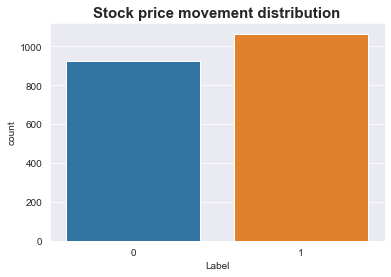

In [11]:
plt.figure(figsize=(6,4))
#plt.bar(x=data['Label'].value_counts().index, height=data['Label'].value_counts().values,)
plt.title('Stock price movement distribution',fontsize=15,fontweight='bold')
sns.countplot(x=data['Label'],);

##### Missing Values Treatment

In [12]:
data[data.isna().any(axis=1)==True]


,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
277,2009-09-15,1,b'The Church of Scientology won\'t be dissolve...,b'New virus from rats can kill 80 per cent of ...,b'The gruesome spectacle of dolphins being sla...,b'The End of Innocence in Afghanistan: \'The G...,b'France approves Internet piracy bill',b'The Rural Doctors Association says right now...,b'Al Jazeera English - Africa - Shabab to aven...,"b""How Sri Lanka governs through detentions - S...",...,b'In an equine echo of the controversy surroun...,b'UPDATE: 5-New York homes raided in terrorism...,b'Population Growth Impeding Progress on the M...,b'Global Population to Reach 7 Billion by 2011',b'Government Funded Feminist Porn ',b'Can someone enlighten me re:Holy Land disput...,b'Human Rights Watch official suspended for co...,NaN,NaN,NaN
348,2009-12-24,1,b'Woman knocks down Pope Benedict at Christmas...,b'Ugandan President Museveni says he will bloc...,"b""Venezuela's Chavez threatens to kick out car...",b'Woman who knocked down pope had pasta in her...,"b'450 people from 21 countries, including 30 f...",b'Chvez declares Angel Falls is no more: World...,b'Drug tests catch out 10 police (UK)',"b'Once the worlds fourth-largest lake, the Ara...",...,b'Pig farts spark Australia gas scare - I shit...,b'Bin Laden daughter flees to Saudi embassy in...,b'Traumatic Brain Injuries: Growing evidence ...,b'The Pakistan Supreme Court has ordered the P...,"b""Here's a video the Taliban released this mor...",b'Fireworks set off aboard airliner',"b'Five VA men may face terrorism charges, Paki...","b""Ayatollah Montazeri's Legacy: In death he m...",NaN,NaN
681,2011-04-21,1,"Director of ""Restrepo"" and Photographer Chris ...",Everyone within 20km of Fukushima will be forc...,Bahrain: Activist Zaynab Al-Khawaja's letter t...,"More than 80,000 people are claiming incapacit...",Libya: 'mission creep' claims as UK sends in m...,Japan considers banning access to evacuation zone,Chinese oil giant Sinopec has stopped exportin...,6.0-magnitude earthquake strikes off east coas...,...,Russian migration official fired in racism row...,Small amounts of radioactive iodine found in b...,"War photographer, Oscar-nominated film directo...",Effeminate boys are being sent to a special ca...,Japan Government Declares 12-Mile Area Around ...,TEPCO admitted Wednesday that nuclear fuel in ...,Fukushima evacuees face arrest if they return ...,Prince Charles wins some kind of a record,NaN,NaN


In [13]:
data.fillna(' ',inplace=True)

We have replaced **NaN** with blank space so it won't create any problem during tokenization process

In [14]:
data.iloc[[277,348,681],:]

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
277,2009-09-15,1,b'The Church of Scientology won\'t be dissolve...,b'New virus from rats can kill 80 per cent of ...,b'The gruesome spectacle of dolphins being sla...,b'The End of Innocence in Afghanistan: \'The G...,b'France approves Internet piracy bill',b'The Rural Doctors Association says right now...,b'Al Jazeera English - Africa - Shabab to aven...,"b""How Sri Lanka governs through detentions - S...",...,b'In an equine echo of the controversy surroun...,b'UPDATE: 5-New York homes raided in terrorism...,b'Population Growth Impeding Progress on the M...,b'Global Population to Reach 7 Billion by 2011',b'Government Funded Feminist Porn ',b'Can someone enlighten me re:Holy Land disput...,b'Human Rights Watch official suspended for co...,,,
348,2009-12-24,1,b'Woman knocks down Pope Benedict at Christmas...,b'Ugandan President Museveni says he will bloc...,"b""Venezuela's Chavez threatens to kick out car...",b'Woman who knocked down pope had pasta in her...,"b'450 people from 21 countries, including 30 f...",b'Chvez declares Angel Falls is no more: World...,b'Drug tests catch out 10 police (UK)',"b'Once the worlds fourth-largest lake, the Ara...",...,b'Pig farts spark Australia gas scare - I shit...,b'Bin Laden daughter flees to Saudi embassy in...,b'Traumatic Brain Injuries: Growing evidence ...,b'The Pakistan Supreme Court has ordered the P...,"b""Here's a video the Taliban released this mor...",b'Fireworks set off aboard airliner',"b'Five VA men may face terrorism charges, Paki...","b""Ayatollah Montazeri's Legacy: In death he m...",,
681,2011-04-21,1,"Director of ""Restrepo"" and Photographer Chris ...",Everyone within 20km of Fukushima will be forc...,Bahrain: Activist Zaynab Al-Khawaja's letter t...,"More than 80,000 people are claiming incapacit...",Libya: 'mission creep' claims as UK sends in m...,Japan considers banning access to evacuation zone,Chinese oil giant Sinopec has stopped exportin...,6.0-magnitude earthquake strikes off east coas...,...,Russian migration official fired in racism row...,Small amounts of radioactive iodine found in b...,"War photographer, Oscar-nominated film directo...",Effeminate boys are being sent to a special ca...,Japan Government Declares 12-Mile Area Around ...,TEPCO admitted Wednesday that nuclear fuel in ...,Fukushima evacuees face arrest if they return ...,Prince Charles wins some kind of a record,,


### 4. Data Preprocessing

For further preprocessing, Now we can combine all headlines to form a single paragraph 

In [15]:
headlines = data.iloc[:,2:27]   ### getting top 25 headlines columns

headlines_cols = headlines.columns

print(headlines_cols)

headlines['Headline'] = headlines.apply(lambda x: ''.join(str(x.values)),axis=1)  #### combining all headlines

headlines.drop(columns=headlines_cols,axis=1,inplace=True)  ### dropping individual headlines from dataframe

Index(['Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7', 'Top8', 'Top9',
       'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15', 'Top16', 'Top17',
       'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23', 'Top24', 'Top25'],
      dtype='object')


In [16]:
headlines.head(3)

,Headline
0,"['b""Georgia \'downs two Russian warplanes\' as..."
1,"[""b'Why wont America and Nato help us? If they..."
2,"[""b'Remember that adorable 9-year-old who sang..."


In [17]:
print(type(headlines['Headline'].iloc[0]))

print(headlines.shape)

<class 'str'>
(1989, 1)


In [18]:
data['Headline'] = headlines['Headline']

In [19]:
%%time
### processing train dataset for cleaning and tokenization 

x = Text_Data_Preprocessing.data_preprocessing(data,'Headline')

print("length of preprocessed headlines data: ",len(x))

length of preprocessed headlines data:  1989
Wall time: 8min 20s


In [20]:
data['preprocessed_headline'] = x

In [21]:
data[['Headline','preprocessed_headline','Label']].head()

,Headline,preprocessed_headline,Label
0,"['b""Georgia \'downs two Russian warplanes\' as...",b georgia down two russian warplane country mo...,0
1,"[""b'Why wont America and Nato help us? If they...",b wont america nato help u wont help u help ir...,1
2,"[""b'Remember that adorable 9-year-old who sang...",b remember adorable year old sang opening cere...,0
3,"[""b' U.S. refuses Israel weapons to attack Ira...",b u refuse israel weapon attack iran report b ...,0
4,"[""b'All the experts admit that we should legal...",b expert admit legalise drug b war south oseti...,1


### 5. Train - Test Data Split

In [22]:
train = data[data['Date']<'2015-01-01'][['Label','preprocessed_headline']]

test = data[data['Date'] > '2014-12-31'][['Label','preprocessed_headline']]

print("shape of train dataset",train.shape)
print("shape of test dataset",test.shape)

shape of train dataset (1611, 2)
shape of test dataset (378, 2)


In [23]:
data[data['Date'] == '2015-01-01'] 

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25,Headline,preprocessed_headline


In [24]:
train.head(3)

,Label,preprocessed_headline
0,0,b georgia down two russian warplane country mo...
1,1,b wont america nato help u wont help u help ir...
2,0,b remember adorable year old sang opening cere...


In [25]:
test.head(3)

,Label,preprocessed_headline
1611,1,case cancer result sheer bad luck rather unhea...
1612,0,moscow gt beijing high speed train reduce trip...
1613,0,u oil fall barrel toyota give away fuel cell p...


### 6. Model Building 

#### 6.1 Using BOW ( CountVectorizer)

In [26]:
%%time
count_vec,x_train = Text_Data_Preprocessing.BOW(list(train['preprocessed_headline']))

x_train = x_train.toarray()
y_train = train['Label']

print("Shape of x_train : ",x_train.shape)
print("Shape of y_train : ",y_train.shape)

Shape of x_train :  (1611, 26776)
Shape of y_train :  (1611,)
Wall time: 809 ms


In [27]:
pd.DataFrame(x_train).head(4)

,0,1,2,3,4,5,6,7,8,9,...,26766,26767,26768,26769,26770,26771,26772,26773,26774,26775
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
%%time
### transforming test dataset 
x_test = count_vec.transform(list(test['preprocessed_headline']))

x_test = x_test.toarray()
y_test = test['Label']

print("Shape of x_test : ",x_test.shape)
print("Shape of y_test : ",y_test.shape)

Shape of x_test :  (378, 26776)
Shape of y_test :  (378,)
Wall time: 159 ms


In [29]:
pd.DataFrame(x_test).head(4)

,0,1,2,3,4,5,6,7,8,9,...,26766,26767,26768,26769,26770,26771,26772,26773,26774,26775
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
Model_logging = pd.DataFrame(columns=['Model','Train_Score','Test_Score','ROC_AUC_Score','Precision_at_Recall'])

Model_logging

,Model,Train_Score,Test_Score,ROC_AUC_Score,Precision_at_Recall


In [31]:
### init various models 

stock_svc = SVC(random_state=101)

stock_knn = KNeighborsClassifier()

stock_nb = MultinomialNB()

stock_rf = RandomForestClassifier(random_state=101)

stock_xgboost = XGBRFClassifier(random_state=101)

stock_catboost = CatBoostClassifier(random_state=101)

stock_lgbm = LGBMClassifier(random_state=101)

In [32]:
Models = {'KNN': stock_knn,
         'NaiveBayes': stock_nb,
         'RandomForest':stock_rf,
         'XGB':stock_xgboost,
         'CatBoost':stock_catboost,
         'LGBM':stock_lgbm}

y_train_preds = []
y_test_preds = []
estimator_list = []

model_data_path = 'Models/'

In [33]:
%%time 

for algo,model in Models.items():
    estimator,y_train_pred,y_test_pred,Model_logging = Stock_Utils.model_building(model,x_train,y_train,x_test,y_test,algo,Model_logging)
    
    y_train_preds.append(y_train_pred)
    y_test_preds.append(y_test_pred)
    estimator_list.append(estimator)
    
    pickle.dump(estimator, open(model_data_path + algo + '.pkl','wb'))

Learning rate set to 0.012629
0:	learn: 0.6929286	total: 293ms	remaining: 4m 52s
1:	learn: 0.6926762	total: 374ms	remaining: 3m 6s
2:	learn: 0.6925142	total: 455ms	remaining: 2m 31s
3:	learn: 0.6922852	total: 539ms	remaining: 2m 14s
4:	learn: 0.6921371	total: 621ms	remaining: 2m 3s
5:	learn: 0.6918090	total: 703ms	remaining: 1m 56s
6:	learn: 0.6915689	total: 789ms	remaining: 1m 51s
7:	learn: 0.6912106	total: 871ms	remaining: 1m 48s
8:	learn: 0.6909904	total: 956ms	remaining: 1m 45s
9:	learn: 0.6908048	total: 1.04s	remaining: 1m 43s
10:	learn: 0.6905360	total: 1.13s	remaining: 1m 41s
11:	learn: 0.6903377	total: 1.21s	remaining: 1m 39s
12:	learn: 0.6899380	total: 1.3s	remaining: 1m 38s
13:	learn: 0.6895167	total: 1.39s	remaining: 1m 37s
14:	learn: 0.6892811	total: 1.47s	remaining: 1m 36s
15:	learn: 0.6891098	total: 1.55s	remaining: 1m 35s
16:	learn: 0.6886069	total: 1.64s	remaining: 1m 34s
17:	learn: 0.6883698	total: 1.72s	remaining: 1m 33s
18:	learn: 0.6881785	total: 1.8s	remaining: 1m 

159:	learn: 0.6565730	total: 13.2s	remaining: 1m 9s
160:	learn: 0.6564097	total: 13.3s	remaining: 1m 9s
161:	learn: 0.6562693	total: 13.3s	remaining: 1m 8s
162:	learn: 0.6560756	total: 13.4s	remaining: 1m 8s
163:	learn: 0.6559308	total: 13.5s	remaining: 1m 8s
164:	learn: 0.6557907	total: 13.6s	remaining: 1m 8s
165:	learn: 0.6555580	total: 13.6s	remaining: 1m 8s
166:	learn: 0.6552572	total: 13.7s	remaining: 1m 8s
167:	learn: 0.6550866	total: 13.8s	remaining: 1m 8s
168:	learn: 0.6547865	total: 13.9s	remaining: 1m 8s
169:	learn: 0.6546593	total: 14s	remaining: 1m 8s
170:	learn: 0.6544335	total: 14s	remaining: 1m 8s
171:	learn: 0.6541271	total: 14.1s	remaining: 1m 7s
172:	learn: 0.6538889	total: 14.2s	remaining: 1m 7s
173:	learn: 0.6536828	total: 14.3s	remaining: 1m 7s
174:	learn: 0.6534981	total: 14.4s	remaining: 1m 7s
175:	learn: 0.6533248	total: 14.4s	remaining: 1m 7s
176:	learn: 0.6532065	total: 14.5s	remaining: 1m 7s
177:	learn: 0.6530397	total: 14.6s	remaining: 1m 7s
178:	learn: 0.65

318:	learn: 0.6259300	total: 25.3s	remaining: 54.1s
319:	learn: 0.6256998	total: 25.4s	remaining: 54s
320:	learn: 0.6254427	total: 25.5s	remaining: 53.9s
321:	learn: 0.6252721	total: 25.6s	remaining: 53.8s
322:	learn: 0.6250713	total: 25.6s	remaining: 53.7s
323:	learn: 0.6249666	total: 25.7s	remaining: 53.6s
324:	learn: 0.6248038	total: 25.8s	remaining: 53.5s
325:	learn: 0.6246771	total: 25.9s	remaining: 53.5s
326:	learn: 0.6244338	total: 25.9s	remaining: 53.4s
327:	learn: 0.6242473	total: 26s	remaining: 53.3s
328:	learn: 0.6240577	total: 26.1s	remaining: 53.2s
329:	learn: 0.6238043	total: 26.2s	remaining: 53.1s
330:	learn: 0.6236132	total: 26.3s	remaining: 53.1s
331:	learn: 0.6232884	total: 26.3s	remaining: 53s
332:	learn: 0.6231845	total: 26.4s	remaining: 52.9s
333:	learn: 0.6230556	total: 26.5s	remaining: 52.8s
334:	learn: 0.6226966	total: 26.6s	remaining: 52.7s
335:	learn: 0.6226124	total: 26.6s	remaining: 52.6s
336:	learn: 0.6224485	total: 26.7s	remaining: 52.5s
337:	learn: 0.6222

477:	learn: 0.5951296	total: 37.4s	remaining: 40.9s
478:	learn: 0.5948977	total: 37.5s	remaining: 40.8s
479:	learn: 0.5946318	total: 37.6s	remaining: 40.7s
480:	learn: 0.5944999	total: 37.6s	remaining: 40.6s
481:	learn: 0.5942436	total: 37.7s	remaining: 40.5s
482:	learn: 0.5940783	total: 37.8s	remaining: 40.4s
483:	learn: 0.5937686	total: 37.9s	remaining: 40.4s
484:	learn: 0.5933822	total: 37.9s	remaining: 40.3s
485:	learn: 0.5931782	total: 38s	remaining: 40.2s
486:	learn: 0.5928988	total: 38.1s	remaining: 40.1s
487:	learn: 0.5927131	total: 38.2s	remaining: 40s
488:	learn: 0.5925619	total: 38.2s	remaining: 40s
489:	learn: 0.5924356	total: 38.3s	remaining: 39.9s
490:	learn: 0.5922887	total: 38.4s	remaining: 39.8s
491:	learn: 0.5919667	total: 38.5s	remaining: 39.7s
492:	learn: 0.5918536	total: 38.5s	remaining: 39.6s
493:	learn: 0.5917071	total: 38.6s	remaining: 39.6s
494:	learn: 0.5915137	total: 38.7s	remaining: 39.5s
495:	learn: 0.5912996	total: 38.8s	remaining: 39.4s
496:	learn: 0.5910

636:	learn: 0.5510305	total: 49.5s	remaining: 28.2s
637:	learn: 0.5506814	total: 49.6s	remaining: 28.1s
638:	learn: 0.5502803	total: 49.7s	remaining: 28.1s
639:	learn: 0.5500113	total: 49.7s	remaining: 28s
640:	learn: 0.5495654	total: 49.8s	remaining: 27.9s
641:	learn: 0.5491046	total: 49.9s	remaining: 27.8s
642:	learn: 0.5488190	total: 50s	remaining: 27.7s
643:	learn: 0.5484306	total: 50s	remaining: 27.7s
644:	learn: 0.5480664	total: 50.1s	remaining: 27.6s
645:	learn: 0.5477301	total: 50.2s	remaining: 27.5s
646:	learn: 0.5474427	total: 50.3s	remaining: 27.4s
647:	learn: 0.5471649	total: 50.4s	remaining: 27.4s
648:	learn: 0.5465679	total: 50.4s	remaining: 27.3s
649:	learn: 0.5462881	total: 50.5s	remaining: 27.2s
650:	learn: 0.5460957	total: 50.6s	remaining: 27.1s
651:	learn: 0.5455668	total: 50.7s	remaining: 27s
652:	learn: 0.5451968	total: 50.7s	remaining: 27s
653:	learn: 0.5446912	total: 50.8s	remaining: 26.9s
654:	learn: 0.5443660	total: 50.9s	remaining: 26.8s
655:	learn: 0.5441519	

798:	learn: 0.4913413	total: 1m 1s	remaining: 15.6s
799:	learn: 0.4909741	total: 1m 1s	remaining: 15.5s
800:	learn: 0.4905400	total: 1m 2s	remaining: 15.4s
801:	learn: 0.4902870	total: 1m 2s	remaining: 15.3s
802:	learn: 0.4898132	total: 1m 2s	remaining: 15.3s
803:	learn: 0.4895754	total: 1m 2s	remaining: 15.2s
804:	learn: 0.4892151	total: 1m 2s	remaining: 15.1s
805:	learn: 0.4890109	total: 1m 2s	remaining: 15s
806:	learn: 0.4887386	total: 1m 2s	remaining: 14.9s
807:	learn: 0.4882158	total: 1m 2s	remaining: 14.9s
808:	learn: 0.4878359	total: 1m 2s	remaining: 14.8s
809:	learn: 0.4874876	total: 1m 2s	remaining: 14.7s
810:	learn: 0.4869893	total: 1m 2s	remaining: 14.6s
811:	learn: 0.4866933	total: 1m 2s	remaining: 14.6s
812:	learn: 0.4862741	total: 1m 2s	remaining: 14.5s
813:	learn: 0.4859466	total: 1m 3s	remaining: 14.4s
814:	learn: 0.4853862	total: 1m 3s	remaining: 14.3s
815:	learn: 0.4849319	total: 1m 3s	remaining: 14.2s
816:	learn: 0.4845550	total: 1m 3s	remaining: 14.2s
817:	learn: 0.

956:	learn: 0.4364972	total: 1m 13s	remaining: 3.32s
957:	learn: 0.4361792	total: 1m 14s	remaining: 3.25s
958:	learn: 0.4359481	total: 1m 14s	remaining: 3.17s
959:	learn: 0.4355265	total: 1m 14s	remaining: 3.09s
960:	learn: 0.4352252	total: 1m 14s	remaining: 3.02s
961:	learn: 0.4349281	total: 1m 14s	remaining: 2.94s
962:	learn: 0.4346588	total: 1m 14s	remaining: 2.86s
963:	learn: 0.4342718	total: 1m 14s	remaining: 2.78s
964:	learn: 0.4340268	total: 1m 14s	remaining: 2.71s
965:	learn: 0.4337999	total: 1m 14s	remaining: 2.63s
966:	learn: 0.4333601	total: 1m 14s	remaining: 2.55s
967:	learn: 0.4330851	total: 1m 14s	remaining: 2.47s
968:	learn: 0.4327075	total: 1m 14s	remaining: 2.4s
969:	learn: 0.4324342	total: 1m 14s	remaining: 2.32s
970:	learn: 0.4320916	total: 1m 15s	remaining: 2.24s
971:	learn: 0.4317344	total: 1m 15s	remaining: 2.16s
972:	learn: 0.4314192	total: 1m 15s	remaining: 2.09s
973:	learn: 0.4311742	total: 1m 15s	remaining: 2.01s
974:	learn: 0.4306502	total: 1m 15s	remaining: 

116:	learn: 0.6621017	total: 8.49s	remaining: 1m 4s
117:	learn: 0.6618985	total: 8.56s	remaining: 1m 3s
118:	learn: 0.6615785	total: 8.63s	remaining: 1m 3s
119:	learn: 0.6613533	total: 8.7s	remaining: 1m 3s
120:	learn: 0.6611621	total: 8.77s	remaining: 1m 3s
121:	learn: 0.6608285	total: 8.83s	remaining: 1m 3s
122:	learn: 0.6605586	total: 8.91s	remaining: 1m 3s
123:	learn: 0.6603936	total: 8.98s	remaining: 1m 3s
124:	learn: 0.6601452	total: 9.06s	remaining: 1m 3s
125:	learn: 0.6599197	total: 9.13s	remaining: 1m 3s
126:	learn: 0.6598465	total: 9.2s	remaining: 1m 3s
127:	learn: 0.6593632	total: 9.27s	remaining: 1m 3s
128:	learn: 0.6591026	total: 9.34s	remaining: 1m 3s
129:	learn: 0.6588809	total: 9.4s	remaining: 1m 2s
130:	learn: 0.6586113	total: 9.47s	remaining: 1m 2s
131:	learn: 0.6581917	total: 9.54s	remaining: 1m 2s
132:	learn: 0.6580666	total: 9.61s	remaining: 1m 2s
133:	learn: 0.6578779	total: 9.68s	remaining: 1m 2s
134:	learn: 0.6576836	total: 9.75s	remaining: 1m 2s
135:	learn: 0.6

277:	learn: 0.6263307	total: 20s	remaining: 51.9s
278:	learn: 0.6262088	total: 20.1s	remaining: 51.8s
279:	learn: 0.6256418	total: 20.1s	remaining: 51.8s
280:	learn: 0.6251236	total: 20.2s	remaining: 51.7s
281:	learn: 0.6249187	total: 20.3s	remaining: 51.6s
282:	learn: 0.6247563	total: 20.3s	remaining: 51.5s
283:	learn: 0.6244914	total: 20.4s	remaining: 51.5s
284:	learn: 0.6243513	total: 20.5s	remaining: 51.4s
285:	learn: 0.6241407	total: 20.6s	remaining: 51.3s
286:	learn: 0.6239645	total: 20.6s	remaining: 51.2s
287:	learn: 0.6237307	total: 20.7s	remaining: 51.2s
288:	learn: 0.6234869	total: 20.8s	remaining: 51.1s
289:	learn: 0.6232998	total: 20.8s	remaining: 51s
290:	learn: 0.6230310	total: 20.9s	remaining: 50.9s
291:	learn: 0.6228489	total: 21s	remaining: 50.8s
292:	learn: 0.6226592	total: 21s	remaining: 50.8s
293:	learn: 0.6224321	total: 21.1s	remaining: 50.7s
294:	learn: 0.6222996	total: 21.2s	remaining: 50.6s
295:	learn: 0.6221371	total: 21.3s	remaining: 50.5s
296:	learn: 0.621930

437:	learn: 0.5920731	total: 31.3s	remaining: 40.2s
438:	learn: 0.5918958	total: 31.4s	remaining: 40.1s
439:	learn: 0.5917523	total: 31.5s	remaining: 40s
440:	learn: 0.5916775	total: 31.5s	remaining: 40s
441:	learn: 0.5914503	total: 31.6s	remaining: 39.9s
442:	learn: 0.5912932	total: 31.7s	remaining: 39.8s
443:	learn: 0.5911304	total: 31.8s	remaining: 39.8s
444:	learn: 0.5910163	total: 31.8s	remaining: 39.7s
445:	learn: 0.5909162	total: 31.9s	remaining: 39.6s
446:	learn: 0.5905242	total: 32s	remaining: 39.5s
447:	learn: 0.5902156	total: 32s	remaining: 39.5s
448:	learn: 0.5901084	total: 32.1s	remaining: 39.4s
449:	learn: 0.5899813	total: 32.2s	remaining: 39.3s
450:	learn: 0.5898658	total: 32.2s	remaining: 39.3s
451:	learn: 0.5897931	total: 32.3s	remaining: 39.2s
452:	learn: 0.5896513	total: 32.4s	remaining: 39.1s
453:	learn: 0.5894586	total: 32.5s	remaining: 39s
454:	learn: 0.5890561	total: 32.5s	remaining: 39s
455:	learn: 0.5889607	total: 32.6s	remaining: 38.9s
456:	learn: 0.5885979	to

597:	learn: 0.5561561	total: 42.7s	remaining: 28.7s
598:	learn: 0.5558159	total: 42.8s	remaining: 28.6s
599:	learn: 0.5555740	total: 42.8s	remaining: 28.6s
600:	learn: 0.5552568	total: 42.9s	remaining: 28.5s
601:	learn: 0.5550248	total: 43s	remaining: 28.4s
602:	learn: 0.5548958	total: 43s	remaining: 28.3s
603:	learn: 0.5546667	total: 43.1s	remaining: 28.3s
604:	learn: 0.5543755	total: 43.2s	remaining: 28.2s
605:	learn: 0.5541479	total: 43.3s	remaining: 28.1s
606:	learn: 0.5538810	total: 43.3s	remaining: 28.1s
607:	learn: 0.5535950	total: 43.4s	remaining: 28s
608:	learn: 0.5532994	total: 43.5s	remaining: 27.9s
609:	learn: 0.5529685	total: 43.5s	remaining: 27.8s
610:	learn: 0.5527286	total: 43.6s	remaining: 27.8s
611:	learn: 0.5524815	total: 43.7s	remaining: 27.7s
612:	learn: 0.5521293	total: 43.8s	remaining: 27.6s
613:	learn: 0.5517417	total: 43.9s	remaining: 27.6s
614:	learn: 0.5515155	total: 43.9s	remaining: 27.5s
615:	learn: 0.5513529	total: 44s	remaining: 27.4s
616:	learn: 0.550990

757:	learn: 0.4974738	total: 54.2s	remaining: 17.3s
758:	learn: 0.4968664	total: 54.2s	remaining: 17.2s
759:	learn: 0.4965215	total: 54.3s	remaining: 17.2s
760:	learn: 0.4960391	total: 54.4s	remaining: 17.1s
761:	learn: 0.4955912	total: 54.5s	remaining: 17s
762:	learn: 0.4953035	total: 54.5s	remaining: 16.9s
763:	learn: 0.4949542	total: 54.6s	remaining: 16.9s
764:	learn: 0.4944056	total: 54.7s	remaining: 16.8s
765:	learn: 0.4939290	total: 54.8s	remaining: 16.7s
766:	learn: 0.4936492	total: 54.8s	remaining: 16.7s
767:	learn: 0.4934035	total: 54.9s	remaining: 16.6s
768:	learn: 0.4929844	total: 55s	remaining: 16.5s
769:	learn: 0.4925850	total: 55s	remaining: 16.4s
770:	learn: 0.4920631	total: 55.1s	remaining: 16.4s
771:	learn: 0.4917961	total: 55.2s	remaining: 16.3s
772:	learn: 0.4914774	total: 55.2s	remaining: 16.2s
773:	learn: 0.4910432	total: 55.3s	remaining: 16.2s
774:	learn: 0.4907232	total: 55.4s	remaining: 16.1s
775:	learn: 0.4903508	total: 55.5s	remaining: 16s
776:	learn: 0.489921

917:	learn: 0.4339581	total: 1m 5s	remaining: 5.86s
918:	learn: 0.4336197	total: 1m 5s	remaining: 5.78s
919:	learn: 0.4330879	total: 1m 5s	remaining: 5.71s
920:	learn: 0.4327295	total: 1m 5s	remaining: 5.64s
921:	learn: 0.4324151	total: 1m 5s	remaining: 5.57s
922:	learn: 0.4321648	total: 1m 5s	remaining: 5.5s
923:	learn: 0.4319447	total: 1m 5s	remaining: 5.43s
924:	learn: 0.4315419	total: 1m 6s	remaining: 5.36s
925:	learn: 0.4313240	total: 1m 6s	remaining: 5.28s
926:	learn: 0.4309097	total: 1m 6s	remaining: 5.21s
927:	learn: 0.4305857	total: 1m 6s	remaining: 5.14s
928:	learn: 0.4302754	total: 1m 6s	remaining: 5.07s
929:	learn: 0.4300689	total: 1m 6s	remaining: 5s
930:	learn: 0.4297202	total: 1m 6s	remaining: 4.93s
931:	learn: 0.4293502	total: 1m 6s	remaining: 4.86s
932:	learn: 0.4290662	total: 1m 6s	remaining: 4.78s
933:	learn: 0.4286130	total: 1m 6s	remaining: 4.71s
934:	learn: 0.4282375	total: 1m 6s	remaining: 4.64s
935:	learn: 0.4276194	total: 1m 6s	remaining: 4.57s
936:	learn: 0.42

77:	learn: 0.6730083	total: 5.36s	remaining: 1m 3s
78:	learn: 0.6726624	total: 5.42s	remaining: 1m 3s
79:	learn: 0.6723037	total: 5.49s	remaining: 1m 3s
80:	learn: 0.6720566	total: 5.56s	remaining: 1m 3s
81:	learn: 0.6718302	total: 5.63s	remaining: 1m 3s
82:	learn: 0.6713064	total: 5.7s	remaining: 1m 2s
83:	learn: 0.6709844	total: 5.76s	remaining: 1m 2s
84:	learn: 0.6707863	total: 5.83s	remaining: 1m 2s
85:	learn: 0.6704860	total: 5.9s	remaining: 1m 2s
86:	learn: 0.6702601	total: 5.96s	remaining: 1m 2s
87:	learn: 0.6700368	total: 6.03s	remaining: 1m 2s
88:	learn: 0.6697020	total: 6.09s	remaining: 1m 2s
89:	learn: 0.6694227	total: 6.16s	remaining: 1m 2s
90:	learn: 0.6691191	total: 6.23s	remaining: 1m 2s
91:	learn: 0.6689206	total: 6.29s	remaining: 1m 2s
92:	learn: 0.6687950	total: 6.36s	remaining: 1m 2s
93:	learn: 0.6686872	total: 6.44s	remaining: 1m 2s
94:	learn: 0.6684136	total: 6.51s	remaining: 1m 1s
95:	learn: 0.6681370	total: 6.57s	remaining: 1m 1s
96:	learn: 0.6679887	total: 6.64s

239:	learn: 0.6376239	total: 16.6s	remaining: 52.5s
240:	learn: 0.6374863	total: 16.6s	remaining: 52.4s
241:	learn: 0.6370222	total: 16.7s	remaining: 52.4s
242:	learn: 0.6368130	total: 16.8s	remaining: 52.3s
243:	learn: 0.6364898	total: 16.9s	remaining: 52.2s
244:	learn: 0.6362080	total: 16.9s	remaining: 52.2s
245:	learn: 0.6360696	total: 17s	remaining: 52.1s
246:	learn: 0.6359263	total: 17.1s	remaining: 52s
247:	learn: 0.6358130	total: 17.1s	remaining: 51.9s
248:	learn: 0.6355334	total: 17.2s	remaining: 51.9s
249:	learn: 0.6352165	total: 17.3s	remaining: 51.8s
250:	learn: 0.6350627	total: 17.3s	remaining: 51.7s
251:	learn: 0.6349354	total: 17.4s	remaining: 51.6s
252:	learn: 0.6347460	total: 17.5s	remaining: 51.6s
253:	learn: 0.6345272	total: 17.5s	remaining: 51.5s
254:	learn: 0.6342499	total: 17.6s	remaining: 51.5s
255:	learn: 0.6340891	total: 17.7s	remaining: 51.4s
256:	learn: 0.6338217	total: 17.8s	remaining: 51.3s
257:	learn: 0.6336991	total: 17.8s	remaining: 51.3s
258:	learn: 0.63

401:	learn: 0.6032311	total: 28s	remaining: 41.6s
402:	learn: 0.6030676	total: 28s	remaining: 41.5s
403:	learn: 0.6028028	total: 28.1s	remaining: 41.5s
404:	learn: 0.6026982	total: 28.2s	remaining: 41.4s
405:	learn: 0.6024689	total: 28.2s	remaining: 41.3s
406:	learn: 0.6022535	total: 28.3s	remaining: 41.3s
407:	learn: 0.6019846	total: 28.4s	remaining: 41.2s
408:	learn: 0.6016442	total: 28.5s	remaining: 41.1s
409:	learn: 0.6013417	total: 28.5s	remaining: 41s
410:	learn: 0.6010977	total: 28.6s	remaining: 41s
411:	learn: 0.6009393	total: 28.7s	remaining: 40.9s
412:	learn: 0.6008607	total: 28.7s	remaining: 40.8s
413:	learn: 0.6006856	total: 28.8s	remaining: 40.8s
414:	learn: 0.6005239	total: 28.9s	remaining: 40.7s
415:	learn: 0.6002019	total: 28.9s	remaining: 40.6s
416:	learn: 0.5999490	total: 29s	remaining: 40.5s
417:	learn: 0.5997851	total: 29.1s	remaining: 40.5s
418:	learn: 0.5995317	total: 29.2s	remaining: 40.4s
419:	learn: 0.5994158	total: 29.2s	remaining: 40.4s
420:	learn: 0.5991685	

563:	learn: 0.5687209	total: 39.2s	remaining: 30.3s
564:	learn: 0.5683328	total: 39.2s	remaining: 30.2s
565:	learn: 0.5678098	total: 39.3s	remaining: 30.1s
566:	learn: 0.5675326	total: 39.4s	remaining: 30.1s
567:	learn: 0.5672607	total: 39.4s	remaining: 30s
568:	learn: 0.5669934	total: 39.5s	remaining: 29.9s
569:	learn: 0.5668324	total: 39.6s	remaining: 29.8s
570:	learn: 0.5666573	total: 39.6s	remaining: 29.8s
571:	learn: 0.5664223	total: 39.7s	remaining: 29.7s
572:	learn: 0.5662649	total: 39.8s	remaining: 29.7s
573:	learn: 0.5658116	total: 39.9s	remaining: 29.6s
574:	learn: 0.5655890	total: 39.9s	remaining: 29.5s
575:	learn: 0.5653427	total: 40s	remaining: 29.4s
576:	learn: 0.5651242	total: 40.1s	remaining: 29.4s
577:	learn: 0.5646844	total: 40.2s	remaining: 29.3s
578:	learn: 0.5645498	total: 40.2s	remaining: 29.2s
579:	learn: 0.5643783	total: 40.3s	remaining: 29.2s
580:	learn: 0.5640459	total: 40.4s	remaining: 29.1s
581:	learn: 0.5637338	total: 40.4s	remaining: 29s
582:	learn: 0.5636

724:	learn: 0.5177185	total: 50.4s	remaining: 19.1s
725:	learn: 0.5174916	total: 50.4s	remaining: 19s
726:	learn: 0.5171164	total: 50.5s	remaining: 19s
727:	learn: 0.5165364	total: 50.6s	remaining: 18.9s
728:	learn: 0.5161332	total: 50.7s	remaining: 18.8s
729:	learn: 0.5156526	total: 50.7s	remaining: 18.8s
730:	learn: 0.5152731	total: 50.8s	remaining: 18.7s
731:	learn: 0.5149729	total: 50.9s	remaining: 18.6s
732:	learn: 0.5147150	total: 50.9s	remaining: 18.6s
733:	learn: 0.5143224	total: 51s	remaining: 18.5s
734:	learn: 0.5139851	total: 51.1s	remaining: 18.4s
735:	learn: 0.5136345	total: 51.2s	remaining: 18.4s
736:	learn: 0.5132321	total: 51.2s	remaining: 18.3s
737:	learn: 0.5127315	total: 51.3s	remaining: 18.2s
738:	learn: 0.5122858	total: 51.4s	remaining: 18.1s
739:	learn: 0.5120151	total: 51.4s	remaining: 18.1s
740:	learn: 0.5117461	total: 51.5s	remaining: 18s
741:	learn: 0.5114212	total: 51.6s	remaining: 17.9s
742:	learn: 0.5110888	total: 51.6s	remaining: 17.9s
743:	learn: 0.510721

884:	learn: 0.4533573	total: 1m 1s	remaining: 8.01s
885:	learn: 0.4529622	total: 1m 1s	remaining: 7.94s
886:	learn: 0.4526097	total: 1m 1s	remaining: 7.87s
887:	learn: 0.4523328	total: 1m 1s	remaining: 7.8s
888:	learn: 0.4520082	total: 1m 1s	remaining: 7.73s
889:	learn: 0.4516306	total: 1m 1s	remaining: 7.66s
890:	learn: 0.4512331	total: 1m 2s	remaining: 7.59s
891:	learn: 0.4509372	total: 1m 2s	remaining: 7.52s
892:	learn: 0.4506402	total: 1m 2s	remaining: 7.45s
893:	learn: 0.4502794	total: 1m 2s	remaining: 7.38s
894:	learn: 0.4498352	total: 1m 2s	remaining: 7.31s
895:	learn: 0.4494433	total: 1m 2s	remaining: 7.24s
896:	learn: 0.4490470	total: 1m 2s	remaining: 7.17s
897:	learn: 0.4486044	total: 1m 2s	remaining: 7.1s
898:	learn: 0.4483171	total: 1m 2s	remaining: 7.03s
899:	learn: 0.4478796	total: 1m 2s	remaining: 6.96s
900:	learn: 0.4476064	total: 1m 2s	remaining: 6.89s
901:	learn: 0.4474125	total: 1m 2s	remaining: 6.82s
902:	learn: 0.4469730	total: 1m 2s	remaining: 6.75s
903:	learn: 0.

46:	learn: 0.6805600	total: 3.23s	remaining: 1m 5s
47:	learn: 0.6801356	total: 3.3s	remaining: 1m 5s
48:	learn: 0.6797080	total: 3.36s	remaining: 1m 5s
49:	learn: 0.6793433	total: 3.43s	remaining: 1m 5s
50:	learn: 0.6792180	total: 3.5s	remaining: 1m 5s
51:	learn: 0.6789973	total: 3.57s	remaining: 1m 5s
52:	learn: 0.6788603	total: 3.64s	remaining: 1m 5s
53:	learn: 0.6786434	total: 3.73s	remaining: 1m 5s
54:	learn: 0.6782770	total: 3.8s	remaining: 1m 5s
55:	learn: 0.6780870	total: 3.87s	remaining: 1m 5s
56:	learn: 0.6777440	total: 3.93s	remaining: 1m 5s
57:	learn: 0.6775351	total: 4s	remaining: 1m 4s
58:	learn: 0.6773659	total: 4.07s	remaining: 1m 4s
59:	learn: 0.6771864	total: 4.13s	remaining: 1m 4s
60:	learn: 0.6769665	total: 4.2s	remaining: 1m 4s
61:	learn: 0.6767223	total: 4.27s	remaining: 1m 4s
62:	learn: 0.6765490	total: 4.33s	remaining: 1m 4s
63:	learn: 0.6761176	total: 4.41s	remaining: 1m 4s
64:	learn: 0.6758160	total: 4.48s	remaining: 1m 4s
65:	learn: 0.6756728	total: 4.54s	rema

207:	learn: 0.6442691	total: 14.4s	remaining: 54.8s
208:	learn: 0.6439193	total: 14.5s	remaining: 54.7s
209:	learn: 0.6438106	total: 14.5s	remaining: 54.7s
210:	learn: 0.6436194	total: 14.6s	remaining: 54.6s
211:	learn: 0.6433641	total: 14.7s	remaining: 54.5s
212:	learn: 0.6430055	total: 14.7s	remaining: 54.5s
213:	learn: 0.6426795	total: 14.8s	remaining: 54.4s
214:	learn: 0.6424179	total: 14.9s	remaining: 54.4s
215:	learn: 0.6421481	total: 15s	remaining: 54.3s
216:	learn: 0.6419572	total: 15s	remaining: 54.2s
217:	learn: 0.6417302	total: 15.1s	remaining: 54.1s
218:	learn: 0.6414657	total: 15.2s	remaining: 54s
219:	learn: 0.6413288	total: 15.2s	remaining: 54s
220:	learn: 0.6411613	total: 15.3s	remaining: 53.9s
221:	learn: 0.6410393	total: 15.4s	remaining: 53.8s
222:	learn: 0.6405260	total: 15.4s	remaining: 53.8s
223:	learn: 0.6403282	total: 15.5s	remaining: 53.7s
224:	learn: 0.6401983	total: 15.6s	remaining: 53.6s
225:	learn: 0.6400580	total: 15.6s	remaining: 53.5s
226:	learn: 0.639778

367:	learn: 0.6095016	total: 25.5s	remaining: 43.8s
368:	learn: 0.6093046	total: 25.6s	remaining: 43.7s
369:	learn: 0.6091483	total: 25.6s	remaining: 43.7s
370:	learn: 0.6089965	total: 25.7s	remaining: 43.6s
371:	learn: 0.6087302	total: 25.8s	remaining: 43.5s
372:	learn: 0.6085593	total: 25.8s	remaining: 43.5s
373:	learn: 0.6083470	total: 25.9s	remaining: 43.4s
374:	learn: 0.6082222	total: 26s	remaining: 43.3s
375:	learn: 0.6080550	total: 26s	remaining: 43.2s
376:	learn: 0.6078633	total: 26.1s	remaining: 43.2s
377:	learn: 0.6077245	total: 26.2s	remaining: 43.1s
378:	learn: 0.6074818	total: 26.3s	remaining: 43s
379:	learn: 0.6073075	total: 26.3s	remaining: 42.9s
380:	learn: 0.6070821	total: 26.4s	remaining: 42.9s
381:	learn: 0.6068392	total: 26.5s	remaining: 42.8s
382:	learn: 0.6067596	total: 26.5s	remaining: 42.7s
383:	learn: 0.6065963	total: 26.6s	remaining: 42.6s
384:	learn: 0.6064235	total: 26.7s	remaining: 42.6s
385:	learn: 0.6062077	total: 26.7s	remaining: 42.5s
386:	learn: 0.6058

528:	learn: 0.5743514	total: 36.7s	remaining: 32.7s
529:	learn: 0.5740519	total: 36.7s	remaining: 32.6s
530:	learn: 0.5737775	total: 36.8s	remaining: 32.5s
531:	learn: 0.5736815	total: 36.9s	remaining: 32.4s
532:	learn: 0.5733315	total: 36.9s	remaining: 32.4s
533:	learn: 0.5730902	total: 37s	remaining: 32.3s
534:	learn: 0.5728395	total: 37.1s	remaining: 32.2s
535:	learn: 0.5726461	total: 37.2s	remaining: 32.2s
536:	learn: 0.5724833	total: 37.2s	remaining: 32.1s
537:	learn: 0.5722457	total: 37.3s	remaining: 32s
538:	learn: 0.5720420	total: 37.4s	remaining: 32s
539:	learn: 0.5718382	total: 37.4s	remaining: 31.9s
540:	learn: 0.5716130	total: 37.5s	remaining: 31.8s
541:	learn: 0.5714056	total: 37.6s	remaining: 31.7s
542:	learn: 0.5712591	total: 37.6s	remaining: 31.7s
543:	learn: 0.5710471	total: 37.7s	remaining: 31.6s
544:	learn: 0.5708108	total: 37.8s	remaining: 31.5s
545:	learn: 0.5705884	total: 37.8s	remaining: 31.5s
546:	learn: 0.5702136	total: 37.9s	remaining: 31.4s
547:	learn: 0.5699

687:	learn: 0.5266462	total: 47.8s	remaining: 21.7s
688:	learn: 0.5262101	total: 47.8s	remaining: 21.6s
689:	learn: 0.5257706	total: 47.9s	remaining: 21.5s
690:	learn: 0.5253736	total: 48s	remaining: 21.4s
691:	learn: 0.5249312	total: 48s	remaining: 21.4s
692:	learn: 0.5246851	total: 48.1s	remaining: 21.3s
693:	learn: 0.5243678	total: 48.2s	remaining: 21.2s
694:	learn: 0.5240244	total: 48.2s	remaining: 21.2s
695:	learn: 0.5236685	total: 48.3s	remaining: 21.1s
696:	learn: 0.5233333	total: 48.4s	remaining: 21s
697:	learn: 0.5230286	total: 48.4s	remaining: 21s
698:	learn: 0.5225911	total: 48.5s	remaining: 20.9s
699:	learn: 0.5219024	total: 48.6s	remaining: 20.8s
700:	learn: 0.5213848	total: 48.6s	remaining: 20.7s
701:	learn: 0.5210486	total: 48.7s	remaining: 20.7s
702:	learn: 0.5207935	total: 48.8s	remaining: 20.6s
703:	learn: 0.5204831	total: 48.8s	remaining: 20.5s
704:	learn: 0.5201140	total: 48.9s	remaining: 20.5s
705:	learn: 0.5198374	total: 49s	remaining: 20.4s
706:	learn: 0.5194512	

848:	learn: 0.4640900	total: 58.9s	remaining: 10.5s
849:	learn: 0.4638172	total: 59s	remaining: 10.4s
850:	learn: 0.4633866	total: 59s	remaining: 10.3s
851:	learn: 0.4630533	total: 59.1s	remaining: 10.3s
852:	learn: 0.4628027	total: 59.2s	remaining: 10.2s
853:	learn: 0.4624158	total: 59.2s	remaining: 10.1s
854:	learn: 0.4620281	total: 59.3s	remaining: 10.1s
855:	learn: 0.4615369	total: 59.4s	remaining: 9.99s
856:	learn: 0.4611716	total: 59.5s	remaining: 9.92s
857:	learn: 0.4607235	total: 59.5s	remaining: 9.85s
858:	learn: 0.4603007	total: 59.6s	remaining: 9.78s
859:	learn: 0.4598767	total: 59.7s	remaining: 9.71s
860:	learn: 0.4593972	total: 59.7s	remaining: 9.64s
861:	learn: 0.4589402	total: 59.8s	remaining: 9.57s
862:	learn: 0.4586778	total: 59.9s	remaining: 9.5s
863:	learn: 0.4582777	total: 59.9s	remaining: 9.43s
864:	learn: 0.4577713	total: 1m	remaining: 9.36s
865:	learn: 0.4574828	total: 1m	remaining: 9.29s
866:	learn: 0.4571210	total: 1m	remaining: 9.22s
867:	learn: 0.4566117	tota

7:	learn: 0.6909783	total: 584ms	remaining: 1m 12s
8:	learn: 0.6907720	total: 659ms	remaining: 1m 12s
9:	learn: 0.6904340	total: 727ms	remaining: 1m 12s
10:	learn: 0.6902456	total: 795ms	remaining: 1m 11s
11:	learn: 0.6899902	total: 863ms	remaining: 1m 11s
12:	learn: 0.6895628	total: 931ms	remaining: 1m 10s
13:	learn: 0.6893564	total: 1s	remaining: 1m 10s
14:	learn: 0.6891248	total: 1.07s	remaining: 1m 10s
15:	learn: 0.6888774	total: 1.14s	remaining: 1m 10s
16:	learn: 0.6887236	total: 1.21s	remaining: 1m 10s
17:	learn: 0.6885322	total: 1.28s	remaining: 1m 9s
18:	learn: 0.6880207	total: 1.35s	remaining: 1m 9s
19:	learn: 0.6877594	total: 1.42s	remaining: 1m 9s
20:	learn: 0.6874720	total: 1.49s	remaining: 1m 9s
21:	learn: 0.6869110	total: 1.56s	remaining: 1m 9s
22:	learn: 0.6865439	total: 1.62s	remaining: 1m 8s
23:	learn: 0.6862633	total: 1.69s	remaining: 1m 8s
24:	learn: 0.6860216	total: 1.76s	remaining: 1m 8s
25:	learn: 0.6855748	total: 1.83s	remaining: 1m 8s
26:	learn: 0.6854601	total:

169:	learn: 0.6515379	total: 12s	remaining: 58.8s
170:	learn: 0.6511819	total: 12.1s	remaining: 58.8s
171:	learn: 0.6510540	total: 12.2s	remaining: 58.7s
172:	learn: 0.6508245	total: 12.3s	remaining: 58.6s
173:	learn: 0.6505196	total: 12.3s	remaining: 58.5s
174:	learn: 0.6503755	total: 12.4s	remaining: 58.5s
175:	learn: 0.6501041	total: 12.5s	remaining: 58.4s
176:	learn: 0.6499725	total: 12.5s	remaining: 58.3s
177:	learn: 0.6497808	total: 12.6s	remaining: 58.3s
178:	learn: 0.6495772	total: 12.7s	remaining: 58.3s
179:	learn: 0.6492326	total: 12.8s	remaining: 58.2s
180:	learn: 0.6490186	total: 12.8s	remaining: 58.1s
181:	learn: 0.6487633	total: 12.9s	remaining: 58s
182:	learn: 0.6486309	total: 13s	remaining: 57.9s
183:	learn: 0.6484325	total: 13.1s	remaining: 57.9s
184:	learn: 0.6482771	total: 13.1s	remaining: 57.9s
185:	learn: 0.6481559	total: 13.2s	remaining: 57.8s
186:	learn: 0.6480591	total: 13.3s	remaining: 57.7s
187:	learn: 0.6478182	total: 13.3s	remaining: 57.6s
188:	learn: 0.6476

330:	learn: 0.6187206	total: 23.5s	remaining: 47.5s
331:	learn: 0.6185483	total: 23.6s	remaining: 47.4s
332:	learn: 0.6182569	total: 23.6s	remaining: 47.3s
333:	learn: 0.6179729	total: 23.7s	remaining: 47.3s
334:	learn: 0.6177578	total: 23.8s	remaining: 47.2s
335:	learn: 0.6175703	total: 23.9s	remaining: 47.2s
336:	learn: 0.6172686	total: 23.9s	remaining: 47.1s
337:	learn: 0.6169491	total: 24s	remaining: 47s
338:	learn: 0.6167082	total: 24.1s	remaining: 46.9s
339:	learn: 0.6165520	total: 24.1s	remaining: 46.9s
340:	learn: 0.6163289	total: 24.2s	remaining: 46.8s
341:	learn: 0.6161092	total: 24.3s	remaining: 46.7s
342:	learn: 0.6159910	total: 24.4s	remaining: 46.6s
343:	learn: 0.6157759	total: 24.4s	remaining: 46.6s
344:	learn: 0.6156023	total: 24.5s	remaining: 46.5s
345:	learn: 0.6154691	total: 24.6s	remaining: 46.4s
346:	learn: 0.6152794	total: 24.6s	remaining: 46.3s
347:	learn: 0.6151189	total: 24.7s	remaining: 46.3s
348:	learn: 0.6149699	total: 24.8s	remaining: 46.2s
349:	learn: 0.61

489:	learn: 0.5856261	total: 34.8s	remaining: 36.2s
490:	learn: 0.5854815	total: 34.9s	remaining: 36.2s
491:	learn: 0.5853729	total: 35s	remaining: 36.1s
492:	learn: 0.5852560	total: 35s	remaining: 36s
493:	learn: 0.5850378	total: 35.1s	remaining: 36s
494:	learn: 0.5848562	total: 35.2s	remaining: 35.9s
495:	learn: 0.5846621	total: 35.2s	remaining: 35.8s
496:	learn: 0.5844928	total: 35.3s	remaining: 35.8s
497:	learn: 0.5842418	total: 35.4s	remaining: 35.7s
498:	learn: 0.5841248	total: 35.5s	remaining: 35.6s
499:	learn: 0.5839549	total: 35.5s	remaining: 35.5s
500:	learn: 0.5837280	total: 35.6s	remaining: 35.5s
501:	learn: 0.5835611	total: 35.7s	remaining: 35.4s
502:	learn: 0.5833447	total: 35.7s	remaining: 35.3s
503:	learn: 0.5831190	total: 35.8s	remaining: 35.2s
504:	learn: 0.5829110	total: 35.9s	remaining: 35.2s
505:	learn: 0.5825342	total: 35.9s	remaining: 35.1s
506:	learn: 0.5824055	total: 36s	remaining: 35s
507:	learn: 0.5822262	total: 36.1s	remaining: 35s
508:	learn: 0.5819141	tota

649:	learn: 0.5431758	total: 46.2s	remaining: 24.9s
650:	learn: 0.5428030	total: 46.2s	remaining: 24.8s
651:	learn: 0.5426116	total: 46.3s	remaining: 24.7s
652:	learn: 0.5422970	total: 46.4s	remaining: 24.6s
653:	learn: 0.5419085	total: 46.4s	remaining: 24.6s
654:	learn: 0.5415154	total: 46.5s	remaining: 24.5s
655:	learn: 0.5412585	total: 46.6s	remaining: 24.4s
656:	learn: 0.5410170	total: 46.7s	remaining: 24.4s
657:	learn: 0.5407142	total: 46.7s	remaining: 24.3s
658:	learn: 0.5403936	total: 46.8s	remaining: 24.2s
659:	learn: 0.5400066	total: 46.9s	remaining: 24.1s
660:	learn: 0.5395433	total: 46.9s	remaining: 24.1s
661:	learn: 0.5389896	total: 47s	remaining: 24s
662:	learn: 0.5387066	total: 47.1s	remaining: 23.9s
663:	learn: 0.5383884	total: 47.1s	remaining: 23.9s
664:	learn: 0.5379716	total: 47.2s	remaining: 23.8s
665:	learn: 0.5375156	total: 47.3s	remaining: 23.7s
666:	learn: 0.5372371	total: 47.4s	remaining: 23.6s
667:	learn: 0.5366907	total: 47.4s	remaining: 23.6s
668:	learn: 0.53

811:	learn: 0.4774141	total: 57.7s	remaining: 13.4s
812:	learn: 0.4771784	total: 57.8s	remaining: 13.3s
813:	learn: 0.4766342	total: 57.8s	remaining: 13.2s
814:	learn: 0.4762064	total: 57.9s	remaining: 13.1s
815:	learn: 0.4758845	total: 58s	remaining: 13.1s
816:	learn: 0.4751491	total: 58.1s	remaining: 13s
817:	learn: 0.4746466	total: 58.1s	remaining: 12.9s
818:	learn: 0.4741251	total: 58.2s	remaining: 12.9s
819:	learn: 0.4737494	total: 58.3s	remaining: 12.8s
820:	learn: 0.4733099	total: 58.4s	remaining: 12.7s
821:	learn: 0.4729880	total: 58.4s	remaining: 12.7s
822:	learn: 0.4726210	total: 58.5s	remaining: 12.6s
823:	learn: 0.4721857	total: 58.6s	remaining: 12.5s
824:	learn: 0.4720033	total: 58.6s	remaining: 12.4s
825:	learn: 0.4717166	total: 58.7s	remaining: 12.4s
826:	learn: 0.4714843	total: 58.8s	remaining: 12.3s
827:	learn: 0.4709432	total: 58.8s	remaining: 12.2s
828:	learn: 0.4705149	total: 58.9s	remaining: 12.2s
829:	learn: 0.4700709	total: 59s	remaining: 12.1s
830:	learn: 0.4697

971:	learn: 0.4178404	total: 1m 9s	remaining: 1.99s
972:	learn: 0.4174974	total: 1m 9s	remaining: 1.92s
973:	learn: 0.4172054	total: 1m 9s	remaining: 1.85s
974:	learn: 0.4169671	total: 1m 9s	remaining: 1.77s
975:	learn: 0.4166558	total: 1m 9s	remaining: 1.7s
976:	learn: 0.4162206	total: 1m 9s	remaining: 1.63s
977:	learn: 0.4158853	total: 1m 9s	remaining: 1.56s
978:	learn: 0.4155065	total: 1m 9s	remaining: 1.49s
979:	learn: 0.4151956	total: 1m 9s	remaining: 1.42s
980:	learn: 0.4147068	total: 1m 9s	remaining: 1.35s
981:	learn: 0.4144500	total: 1m 9s	remaining: 1.28s
982:	learn: 0.4139841	total: 1m 9s	remaining: 1.21s
983:	learn: 0.4136534	total: 1m 9s	remaining: 1.14s
984:	learn: 0.4132856	total: 1m 9s	remaining: 1.06s
985:	learn: 0.4129434	total: 1m 10s	remaining: 994ms
986:	learn: 0.4125025	total: 1m 10s	remaining: 923ms
987:	learn: 0.4122853	total: 1m 10s	remaining: 852ms
988:	learn: 0.4119064	total: 1m 10s	remaining: 781ms
989:	learn: 0.4115463	total: 1m 10s	remaining: 710ms
990:	lea

131:	learn: 0.6588080	total: 9.38s	remaining: 1m 1s
132:	learn: 0.6584783	total: 9.46s	remaining: 1m 1s
133:	learn: 0.6582403	total: 9.53s	remaining: 1m 1s
134:	learn: 0.6580951	total: 9.61s	remaining: 1m 1s
135:	learn: 0.6577639	total: 9.68s	remaining: 1m 1s
136:	learn: 0.6573887	total: 9.75s	remaining: 1m 1s
137:	learn: 0.6571884	total: 9.82s	remaining: 1m 1s
138:	learn: 0.6569548	total: 9.89s	remaining: 1m 1s
139:	learn: 0.6566879	total: 9.96s	remaining: 1m 1s
140:	learn: 0.6565519	total: 10s	remaining: 1m 1s
141:	learn: 0.6563729	total: 10.1s	remaining: 1m 1s
142:	learn: 0.6561723	total: 10.2s	remaining: 1m
143:	learn: 0.6556812	total: 10.2s	remaining: 1m
144:	learn: 0.6555733	total: 10.3s	remaining: 1m
145:	learn: 0.6553300	total: 10.4s	remaining: 1m
146:	learn: 0.6548183	total: 10.4s	remaining: 1m
147:	learn: 0.6547094	total: 10.5s	remaining: 1m
148:	learn: 0.6545685	total: 10.6s	remaining: 1m
149:	learn: 0.6544480	total: 10.7s	remaining: 1m
150:	learn: 0.6541914	total: 10.8s	rem

293:	learn: 0.6242215	total: 21s	remaining: 50.3s
294:	learn: 0.6241119	total: 21s	remaining: 50.3s
295:	learn: 0.6239204	total: 21.1s	remaining: 50.2s
296:	learn: 0.6236405	total: 21.2s	remaining: 50.1s
297:	learn: 0.6233886	total: 21.2s	remaining: 50s
298:	learn: 0.6231928	total: 21.3s	remaining: 50s
299:	learn: 0.6228892	total: 21.4s	remaining: 49.9s
300:	learn: 0.6227717	total: 21.5s	remaining: 49.8s
301:	learn: 0.6225597	total: 21.5s	remaining: 49.7s
302:	learn: 0.6224261	total: 21.6s	remaining: 49.7s
303:	learn: 0.6223049	total: 21.7s	remaining: 49.6s
304:	learn: 0.6220556	total: 21.7s	remaining: 49.6s
305:	learn: 0.6218335	total: 21.8s	remaining: 49.5s
306:	learn: 0.6216933	total: 21.9s	remaining: 49.4s
307:	learn: 0.6214388	total: 22s	remaining: 49.3s
308:	learn: 0.6212905	total: 22s	remaining: 49.2s
309:	learn: 0.6211673	total: 22.1s	remaining: 49.2s
310:	learn: 0.6209538	total: 22.2s	remaining: 49.1s
311:	learn: 0.6206901	total: 22.2s	remaining: 49s
312:	learn: 0.6204672	tota

453:	learn: 0.5930740	total: 32.3s	remaining: 38.9s
454:	learn: 0.5928625	total: 32.4s	remaining: 38.8s
455:	learn: 0.5926110	total: 32.5s	remaining: 38.7s
456:	learn: 0.5923997	total: 32.5s	remaining: 38.6s
457:	learn: 0.5922066	total: 32.6s	remaining: 38.6s
458:	learn: 0.5917514	total: 32.7s	remaining: 38.5s
459:	learn: 0.5915894	total: 32.8s	remaining: 38.4s
460:	learn: 0.5914847	total: 32.8s	remaining: 38.4s
461:	learn: 0.5913075	total: 32.9s	remaining: 38.3s
462:	learn: 0.5911571	total: 33s	remaining: 38.2s
463:	learn: 0.5909078	total: 33s	remaining: 38.2s
464:	learn: 0.5906459	total: 33.1s	remaining: 38.1s
465:	learn: 0.5903539	total: 33.2s	remaining: 38s
466:	learn: 0.5901155	total: 33.2s	remaining: 37.9s
467:	learn: 0.5900321	total: 33.3s	remaining: 37.9s
468:	learn: 0.5897385	total: 33.4s	remaining: 37.8s
469:	learn: 0.5895915	total: 33.5s	remaining: 37.8s
470:	learn: 0.5894590	total: 33.6s	remaining: 37.7s
471:	learn: 0.5891457	total: 33.6s	remaining: 37.6s
472:	learn: 0.5889

614:	learn: 0.5541648	total: 43.8s	remaining: 27.4s
615:	learn: 0.5538437	total: 43.9s	remaining: 27.4s
616:	learn: 0.5535120	total: 44s	remaining: 27.3s
617:	learn: 0.5531791	total: 44s	remaining: 27.2s
618:	learn: 0.5530427	total: 44.1s	remaining: 27.2s
619:	learn: 0.5527679	total: 44.2s	remaining: 27.1s
620:	learn: 0.5522034	total: 44.3s	remaining: 27s
621:	learn: 0.5518450	total: 44.3s	remaining: 26.9s
622:	learn: 0.5516481	total: 44.4s	remaining: 26.9s
623:	learn: 0.5513607	total: 44.5s	remaining: 26.8s
624:	learn: 0.5511283	total: 44.5s	remaining: 26.7s
625:	learn: 0.5507733	total: 44.6s	remaining: 26.7s
626:	learn: 0.5503793	total: 44.7s	remaining: 26.6s
627:	learn: 0.5502103	total: 44.7s	remaining: 26.5s
628:	learn: 0.5497959	total: 44.8s	remaining: 26.4s
629:	learn: 0.5495196	total: 44.9s	remaining: 26.4s
630:	learn: 0.5491930	total: 45s	remaining: 26.3s
631:	learn: 0.5489622	total: 45s	remaining: 26.2s
632:	learn: 0.5487228	total: 45.1s	remaining: 26.1s
633:	learn: 0.5484170	

775:	learn: 0.4967155	total: 55.3s	remaining: 16s
776:	learn: 0.4963467	total: 55.4s	remaining: 15.9s
777:	learn: 0.4959622	total: 55.5s	remaining: 15.8s
778:	learn: 0.4955560	total: 55.6s	remaining: 15.8s
779:	learn: 0.4949870	total: 55.6s	remaining: 15.7s
780:	learn: 0.4945461	total: 55.7s	remaining: 15.6s
781:	learn: 0.4940530	total: 55.8s	remaining: 15.6s
782:	learn: 0.4935282	total: 55.9s	remaining: 15.5s
783:	learn: 0.4931235	total: 55.9s	remaining: 15.4s
784:	learn: 0.4925624	total: 56s	remaining: 15.3s
785:	learn: 0.4922681	total: 56.1s	remaining: 15.3s
786:	learn: 0.4919386	total: 56.1s	remaining: 15.2s
787:	learn: 0.4914495	total: 56.2s	remaining: 15.1s
788:	learn: 0.4911395	total: 56.3s	remaining: 15s
789:	learn: 0.4908204	total: 56.4s	remaining: 15s
790:	learn: 0.4904312	total: 56.4s	remaining: 14.9s
791:	learn: 0.4900383	total: 56.5s	remaining: 14.8s
792:	learn: 0.4897837	total: 56.6s	remaining: 14.8s
793:	learn: 0.4892631	total: 56.6s	remaining: 14.7s
794:	learn: 0.488840

937:	learn: 0.4329991	total: 1m 7s	remaining: 4.43s
938:	learn: 0.4327862	total: 1m 7s	remaining: 4.36s
939:	learn: 0.4325734	total: 1m 7s	remaining: 4.29s
940:	learn: 0.4323705	total: 1m 7s	remaining: 4.22s
941:	learn: 0.4321146	total: 1m 7s	remaining: 4.15s
942:	learn: 0.4317479	total: 1m 7s	remaining: 4.08s
943:	learn: 0.4312775	total: 1m 7s	remaining: 4.01s
944:	learn: 0.4309676	total: 1m 7s	remaining: 3.94s
945:	learn: 0.4306481	total: 1m 7s	remaining: 3.86s
946:	learn: 0.4304299	total: 1m 7s	remaining: 3.79s
947:	learn: 0.4300856	total: 1m 7s	remaining: 3.72s
948:	learn: 0.4297460	total: 1m 7s	remaining: 3.65s
949:	learn: 0.4293080	total: 1m 7s	remaining: 3.58s
950:	learn: 0.4288551	total: 1m 8s	remaining: 3.51s
951:	learn: 0.4285148	total: 1m 8s	remaining: 3.43s
952:	learn: 0.4281851	total: 1m 8s	remaining: 3.36s
953:	learn: 0.4279165	total: 1m 8s	remaining: 3.29s
954:	learn: 0.4276012	total: 1m 8s	remaining: 3.22s
955:	learn: 0.4271460	total: 1m 8s	remaining: 3.15s
956:	learn: 

100:	learn: 0.6404019	total: 2.83s	remaining: 25.2s
101:	learn: 0.6401358	total: 2.86s	remaining: 25.2s
102:	learn: 0.6397372	total: 2.89s	remaining: 25.2s
103:	learn: 0.6393299	total: 2.92s	remaining: 25.2s
104:	learn: 0.6389212	total: 2.95s	remaining: 25.1s
105:	learn: 0.6385310	total: 2.98s	remaining: 25.1s
106:	learn: 0.6381629	total: 3s	remaining: 25.1s
107:	learn: 0.6373767	total: 3.03s	remaining: 25.1s
108:	learn: 0.6370051	total: 3.06s	remaining: 25s
109:	learn: 0.6364215	total: 3.09s	remaining: 25s
110:	learn: 0.6357589	total: 3.12s	remaining: 25s
111:	learn: 0.6354429	total: 3.15s	remaining: 25s
112:	learn: 0.6349267	total: 3.17s	remaining: 24.9s
113:	learn: 0.6345238	total: 3.2s	remaining: 24.9s
114:	learn: 0.6342943	total: 3.23s	remaining: 24.9s
115:	learn: 0.6340134	total: 3.26s	remaining: 24.9s
116:	learn: 0.6337073	total: 3.29s	remaining: 24.8s
117:	learn: 0.6328714	total: 3.32s	remaining: 24.8s
118:	learn: 0.6324756	total: 3.35s	remaining: 24.8s
119:	learn: 0.6317846	to

264:	learn: 0.5705569	total: 7.48s	remaining: 20.7s
265:	learn: 0.5704250	total: 7.51s	remaining: 20.7s
266:	learn: 0.5698800	total: 7.54s	remaining: 20.7s
267:	learn: 0.5695685	total: 7.56s	remaining: 20.7s
268:	learn: 0.5690895	total: 7.59s	remaining: 20.6s
269:	learn: 0.5688080	total: 7.62s	remaining: 20.6s
270:	learn: 0.5686284	total: 7.65s	remaining: 20.6s
271:	learn: 0.5683591	total: 7.67s	remaining: 20.5s
272:	learn: 0.5679335	total: 7.7s	remaining: 20.5s
273:	learn: 0.5675824	total: 7.73s	remaining: 20.5s
274:	learn: 0.5670717	total: 7.76s	remaining: 20.5s
275:	learn: 0.5667459	total: 7.79s	remaining: 20.4s
276:	learn: 0.5664505	total: 7.82s	remaining: 20.4s
277:	learn: 0.5660568	total: 7.84s	remaining: 20.4s
278:	learn: 0.5652493	total: 7.87s	remaining: 20.3s
279:	learn: 0.5649690	total: 7.9s	remaining: 20.3s
280:	learn: 0.5647396	total: 7.93s	remaining: 20.3s
281:	learn: 0.5642368	total: 7.96s	remaining: 20.3s
282:	learn: 0.5638712	total: 7.99s	remaining: 20.2s
283:	learn: 0.

424:	learn: 0.5151338	total: 12.8s	remaining: 17.3s
425:	learn: 0.5148504	total: 12.8s	remaining: 17.3s
426:	learn: 0.5145810	total: 12.9s	remaining: 17.3s
427:	learn: 0.5144810	total: 12.9s	remaining: 17.2s
428:	learn: 0.5142828	total: 12.9s	remaining: 17.2s
429:	learn: 0.5138379	total: 13s	remaining: 17.2s
430:	learn: 0.5134451	total: 13s	remaining: 17.2s
431:	learn: 0.5130689	total: 13s	remaining: 17.1s
432:	learn: 0.5128118	total: 13.1s	remaining: 17.1s
433:	learn: 0.5125488	total: 13.1s	remaining: 17.1s
434:	learn: 0.5122653	total: 13.1s	remaining: 17.1s
435:	learn: 0.5116879	total: 13.2s	remaining: 17s
436:	learn: 0.5110686	total: 13.2s	remaining: 17s
437:	learn: 0.5107350	total: 13.2s	remaining: 17s
438:	learn: 0.5103014	total: 13.3s	remaining: 16.9s
439:	learn: 0.5098189	total: 13.3s	remaining: 16.9s
440:	learn: 0.5094464	total: 13.3s	remaining: 16.9s
441:	learn: 0.5091349	total: 13.4s	remaining: 16.9s
442:	learn: 0.5087704	total: 13.4s	remaining: 16.9s
443:	learn: 0.5084337	to

583:	learn: 0.4644018	total: 17.4s	remaining: 12.4s
584:	learn: 0.4640906	total: 17.4s	remaining: 12.3s
585:	learn: 0.4638239	total: 17.4s	remaining: 12.3s
586:	learn: 0.4635953	total: 17.4s	remaining: 12.3s
587:	learn: 0.4633068	total: 17.5s	remaining: 12.2s
588:	learn: 0.4631262	total: 17.5s	remaining: 12.2s
589:	learn: 0.4627396	total: 17.5s	remaining: 12.2s
590:	learn: 0.4625073	total: 17.6s	remaining: 12.2s
591:	learn: 0.4620517	total: 17.6s	remaining: 12.1s
592:	learn: 0.4616338	total: 17.6s	remaining: 12.1s
593:	learn: 0.4614507	total: 17.6s	remaining: 12.1s
594:	learn: 0.4611735	total: 17.7s	remaining: 12s
595:	learn: 0.4608255	total: 17.7s	remaining: 12s
596:	learn: 0.4604890	total: 17.7s	remaining: 12s
597:	learn: 0.4601288	total: 17.8s	remaining: 11.9s
598:	learn: 0.4598112	total: 17.8s	remaining: 11.9s
599:	learn: 0.4593860	total: 17.8s	remaining: 11.9s
600:	learn: 0.4589841	total: 17.8s	remaining: 11.8s
601:	learn: 0.4588448	total: 17.9s	remaining: 11.8s
602:	learn: 0.4584

749:	learn: 0.4144064	total: 22s	remaining: 7.32s
750:	learn: 0.4138182	total: 22s	remaining: 7.29s
751:	learn: 0.4134606	total: 22s	remaining: 7.26s
752:	learn: 0.4133236	total: 22.1s	remaining: 7.23s
753:	learn: 0.4129585	total: 22.1s	remaining: 7.2s
754:	learn: 0.4126572	total: 22.1s	remaining: 7.17s
755:	learn: 0.4123959	total: 22.1s	remaining: 7.14s
756:	learn: 0.4122204	total: 22.2s	remaining: 7.11s
757:	learn: 0.4120408	total: 22.2s	remaining: 7.08s
758:	learn: 0.4117686	total: 22.2s	remaining: 7.05s
759:	learn: 0.4115380	total: 22.2s	remaining: 7.02s
760:	learn: 0.4112997	total: 22.3s	remaining: 6.99s
761:	learn: 0.4110310	total: 22.3s	remaining: 6.96s
762:	learn: 0.4107057	total: 22.3s	remaining: 6.93s
763:	learn: 0.4104103	total: 22.3s	remaining: 6.9s
764:	learn: 0.4100553	total: 22.4s	remaining: 6.87s
765:	learn: 0.4098698	total: 22.4s	remaining: 6.84s
766:	learn: 0.4097093	total: 22.4s	remaining: 6.81s
767:	learn: 0.4093568	total: 22.5s	remaining: 6.78s
768:	learn: 0.409047

908:	learn: 0.3629252	total: 26.4s	remaining: 2.64s
909:	learn: 0.3626955	total: 26.4s	remaining: 2.61s
910:	learn: 0.3622559	total: 26.4s	remaining: 2.58s
911:	learn: 0.3618648	total: 26.4s	remaining: 2.55s
912:	learn: 0.3616015	total: 26.5s	remaining: 2.52s
913:	learn: 0.3610684	total: 26.5s	remaining: 2.49s
914:	learn: 0.3608124	total: 26.5s	remaining: 2.46s
915:	learn: 0.3602452	total: 26.5s	remaining: 2.43s
916:	learn: 0.3599436	total: 26.6s	remaining: 2.4s
917:	learn: 0.3595842	total: 26.6s	remaining: 2.38s
918:	learn: 0.3590057	total: 26.6s	remaining: 2.35s
919:	learn: 0.3587641	total: 26.7s	remaining: 2.32s
920:	learn: 0.3585315	total: 26.7s	remaining: 2.29s
921:	learn: 0.3583564	total: 26.7s	remaining: 2.26s
922:	learn: 0.3581547	total: 26.7s	remaining: 2.23s
923:	learn: 0.3578390	total: 26.8s	remaining: 2.2s
924:	learn: 0.3574021	total: 26.8s	remaining: 2.17s
925:	learn: 0.3565421	total: 26.8s	remaining: 2.14s
926:	learn: 0.3559347	total: 26.8s	remaining: 2.11s
927:	learn: 0.

71:	learn: 0.6568724	total: 2s	remaining: 25.8s
72:	learn: 0.6564656	total: 2.03s	remaining: 25.7s
73:	learn: 0.6556750	total: 2.06s	remaining: 25.7s
74:	learn: 0.6552999	total: 2.08s	remaining: 25.7s
75:	learn: 0.6548053	total: 2.11s	remaining: 25.7s
76:	learn: 0.6544454	total: 2.14s	remaining: 25.6s
77:	learn: 0.6540548	total: 2.16s	remaining: 25.6s
78:	learn: 0.6536391	total: 2.19s	remaining: 25.5s
79:	learn: 0.6531836	total: 2.22s	remaining: 25.5s
80:	learn: 0.6528702	total: 2.25s	remaining: 25.5s
81:	learn: 0.6525438	total: 2.27s	remaining: 25.5s
82:	learn: 0.6520622	total: 2.3s	remaining: 25.4s
83:	learn: 0.6517326	total: 2.33s	remaining: 25.4s
84:	learn: 0.6512637	total: 2.36s	remaining: 25.4s
85:	learn: 0.6509399	total: 2.38s	remaining: 25.3s
86:	learn: 0.6505252	total: 2.41s	remaining: 25.3s
87:	learn: 0.6496635	total: 2.44s	remaining: 25.3s
88:	learn: 0.6491958	total: 2.46s	remaining: 25.2s
89:	learn: 0.6488933	total: 2.49s	remaining: 25.2s
90:	learn: 0.6483083	total: 2.52s	r

237:	learn: 0.5850886	total: 6.52s	remaining: 20.9s
238:	learn: 0.5846571	total: 6.55s	remaining: 20.9s
239:	learn: 0.5842992	total: 6.58s	remaining: 20.8s
240:	learn: 0.5837767	total: 6.6s	remaining: 20.8s
241:	learn: 0.5831783	total: 6.63s	remaining: 20.8s
242:	learn: 0.5827328	total: 6.66s	remaining: 20.8s
243:	learn: 0.5823505	total: 6.69s	remaining: 20.7s
244:	learn: 0.5819999	total: 6.72s	remaining: 20.7s
245:	learn: 0.5816119	total: 6.75s	remaining: 20.7s
246:	learn: 0.5812662	total: 6.77s	remaining: 20.6s
247:	learn: 0.5808939	total: 6.8s	remaining: 20.6s
248:	learn: 0.5805177	total: 6.83s	remaining: 20.6s
249:	learn: 0.5800064	total: 6.85s	remaining: 20.6s
250:	learn: 0.5796256	total: 6.88s	remaining: 20.5s
251:	learn: 0.5792056	total: 6.91s	remaining: 20.5s
252:	learn: 0.5789767	total: 6.92s	remaining: 20.4s
253:	learn: 0.5784198	total: 6.95s	remaining: 20.4s
254:	learn: 0.5781689	total: 6.97s	remaining: 20.4s
255:	learn: 0.5777058	total: 7s	remaining: 20.3s
256:	learn: 0.577

400:	learn: 0.5245757	total: 11s	remaining: 16.4s
401:	learn: 0.5240510	total: 11s	remaining: 16.4s
402:	learn: 0.5239091	total: 11s	remaining: 16.3s
403:	learn: 0.5236619	total: 11.1s	remaining: 16.3s
404:	learn: 0.5233353	total: 11.1s	remaining: 16.3s
405:	learn: 0.5230084	total: 11.1s	remaining: 16.3s
406:	learn: 0.5225249	total: 11.1s	remaining: 16.2s
407:	learn: 0.5222002	total: 11.2s	remaining: 16.2s
408:	learn: 0.5219093	total: 11.2s	remaining: 16.2s
409:	learn: 0.5216038	total: 11.2s	remaining: 16.1s
410:	learn: 0.5213381	total: 11.2s	remaining: 16.1s
411:	learn: 0.5208950	total: 11.3s	remaining: 16.1s
412:	learn: 0.5205260	total: 11.3s	remaining: 16.1s
413:	learn: 0.5202324	total: 11.3s	remaining: 16s
414:	learn: 0.5199466	total: 11.4s	remaining: 16s
415:	learn: 0.5198310	total: 11.4s	remaining: 16s
416:	learn: 0.5195485	total: 11.4s	remaining: 16s
417:	learn: 0.5193413	total: 11.4s	remaining: 15.9s
418:	learn: 0.5190957	total: 11.5s	remaining: 15.9s
419:	learn: 0.5187625	tota

563:	learn: 0.4738335	total: 15.6s	remaining: 12s
564:	learn: 0.4735733	total: 15.6s	remaining: 12s
565:	learn: 0.4732326	total: 15.6s	remaining: 12s
566:	learn: 0.4725742	total: 15.6s	remaining: 11.9s
567:	learn: 0.4724474	total: 15.7s	remaining: 11.9s
568:	learn: 0.4720938	total: 15.7s	remaining: 11.9s
569:	learn: 0.4718547	total: 15.7s	remaining: 11.9s
570:	learn: 0.4713204	total: 15.8s	remaining: 11.8s
571:	learn: 0.4710931	total: 15.8s	remaining: 11.8s
572:	learn: 0.4708518	total: 15.8s	remaining: 11.8s
573:	learn: 0.4703954	total: 15.8s	remaining: 11.8s
574:	learn: 0.4701727	total: 15.9s	remaining: 11.7s
575:	learn: 0.4696452	total: 15.9s	remaining: 11.7s
576:	learn: 0.4693867	total: 15.9s	remaining: 11.7s
577:	learn: 0.4691381	total: 16s	remaining: 11.7s
578:	learn: 0.4687092	total: 16s	remaining: 11.6s
579:	learn: 0.4685508	total: 16s	remaining: 11.6s
580:	learn: 0.4682132	total: 16s	remaining: 11.6s
581:	learn: 0.4679835	total: 16.1s	remaining: 11.5s
582:	learn: 0.4676765	tota

725:	learn: 0.4234376	total: 20.4s	remaining: 7.7s
726:	learn: 0.4232492	total: 20.4s	remaining: 7.67s
727:	learn: 0.4228858	total: 20.5s	remaining: 7.64s
728:	learn: 0.4224701	total: 20.5s	remaining: 7.62s
729:	learn: 0.4219833	total: 20.5s	remaining: 7.59s
730:	learn: 0.4215963	total: 20.6s	remaining: 7.56s
731:	learn: 0.4212814	total: 20.6s	remaining: 7.54s
732:	learn: 0.4210394	total: 20.6s	remaining: 7.51s
733:	learn: 0.4207730	total: 20.6s	remaining: 7.48s
734:	learn: 0.4205024	total: 20.7s	remaining: 7.45s
735:	learn: 0.4199116	total: 20.7s	remaining: 7.43s
736:	learn: 0.4196037	total: 20.7s	remaining: 7.4s
737:	learn: 0.4192535	total: 20.8s	remaining: 7.37s
738:	learn: 0.4187868	total: 20.8s	remaining: 7.35s
739:	learn: 0.4185163	total: 20.8s	remaining: 7.32s
740:	learn: 0.4182410	total: 20.9s	remaining: 7.29s
741:	learn: 0.4179724	total: 20.9s	remaining: 7.26s
742:	learn: 0.4178224	total: 20.9s	remaining: 7.24s
743:	learn: 0.4174903	total: 21s	remaining: 7.21s
744:	learn: 0.41

887:	learn: 0.3717349	total: 25.3s	remaining: 3.19s
888:	learn: 0.3710571	total: 25.3s	remaining: 3.16s
889:	learn: 0.3708715	total: 25.3s	remaining: 3.13s
890:	learn: 0.3705982	total: 25.4s	remaining: 3.1s
891:	learn: 0.3702840	total: 25.4s	remaining: 3.08s
892:	learn: 0.3701226	total: 25.4s	remaining: 3.05s
893:	learn: 0.3697309	total: 25.5s	remaining: 3.02s
894:	learn: 0.3687797	total: 25.5s	remaining: 2.99s
895:	learn: 0.3686746	total: 25.5s	remaining: 2.96s
896:	learn: 0.3684337	total: 25.5s	remaining: 2.93s
897:	learn: 0.3681783	total: 25.6s	remaining: 2.9s
898:	learn: 0.3678262	total: 25.6s	remaining: 2.88s
899:	learn: 0.3673533	total: 25.6s	remaining: 2.85s
900:	learn: 0.3666194	total: 25.7s	remaining: 2.82s
901:	learn: 0.3660890	total: 25.7s	remaining: 2.79s
902:	learn: 0.3658591	total: 25.7s	remaining: 2.76s
903:	learn: 0.3655094	total: 25.8s	remaining: 2.73s
904:	learn: 0.3652244	total: 25.8s	remaining: 2.71s
905:	learn: 0.3649378	total: 25.8s	remaining: 2.68s
906:	learn: 0.

53:	learn: 0.6655520	total: 1.43s	remaining: 25.1s
54:	learn: 0.6649084	total: 1.46s	remaining: 25s
55:	learn: 0.6645615	total: 1.48s	remaining: 25s
56:	learn: 0.6643170	total: 1.51s	remaining: 25s
57:	learn: 0.6641664	total: 1.53s	remaining: 24.9s
58:	learn: 0.6636331	total: 1.56s	remaining: 24.9s
59:	learn: 0.6630694	total: 1.59s	remaining: 24.9s
60:	learn: 0.6628345	total: 1.61s	remaining: 24.8s
61:	learn: 0.6622516	total: 1.64s	remaining: 24.8s
62:	learn: 0.6618951	total: 1.67s	remaining: 24.8s
63:	learn: 0.6615916	total: 1.69s	remaining: 24.8s
64:	learn: 0.6613399	total: 1.72s	remaining: 24.7s
65:	learn: 0.6609905	total: 1.75s	remaining: 24.7s
66:	learn: 0.6603671	total: 1.77s	remaining: 24.7s
67:	learn: 0.6598661	total: 1.8s	remaining: 24.6s
68:	learn: 0.6595835	total: 1.82s	remaining: 24.6s
69:	learn: 0.6590277	total: 1.85s	remaining: 24.6s
70:	learn: 0.6583632	total: 1.88s	remaining: 24.6s
71:	learn: 0.6578347	total: 1.9s	remaining: 24.5s
72:	learn: 0.6572814	total: 1.93s	remai

219:	learn: 0.5915130	total: 5.8s	remaining: 20.6s
220:	learn: 0.5910886	total: 5.83s	remaining: 20.6s
221:	learn: 0.5906010	total: 5.86s	remaining: 20.5s
222:	learn: 0.5903370	total: 5.88s	remaining: 20.5s
223:	learn: 0.5899538	total: 5.91s	remaining: 20.5s
224:	learn: 0.5895528	total: 5.94s	remaining: 20.4s
225:	learn: 0.5892311	total: 5.96s	remaining: 20.4s
226:	learn: 0.5887278	total: 5.99s	remaining: 20.4s
227:	learn: 0.5886214	total: 6.02s	remaining: 20.4s
228:	learn: 0.5882732	total: 6.04s	remaining: 20.3s
229:	learn: 0.5880545	total: 6.07s	remaining: 20.3s
230:	learn: 0.5876646	total: 6.1s	remaining: 20.3s
231:	learn: 0.5871584	total: 6.12s	remaining: 20.3s
232:	learn: 0.5866603	total: 6.15s	remaining: 20.2s
233:	learn: 0.5862186	total: 6.17s	remaining: 20.2s
234:	learn: 0.5856407	total: 6.2s	remaining: 20.2s
235:	learn: 0.5853229	total: 6.23s	remaining: 20.2s
236:	learn: 0.5849258	total: 6.25s	remaining: 20.1s
237:	learn: 0.5841590	total: 6.28s	remaining: 20.1s
238:	learn: 0.5

385:	learn: 0.5266143	total: 10.2s	remaining: 16.3s
386:	learn: 0.5264990	total: 10.3s	remaining: 16.3s
387:	learn: 0.5262752	total: 10.3s	remaining: 16.2s
388:	learn: 0.5259708	total: 10.3s	remaining: 16.2s
389:	learn: 0.5258164	total: 10.3s	remaining: 16.2s
390:	learn: 0.5256561	total: 10.4s	remaining: 16.1s
391:	learn: 0.5251971	total: 10.4s	remaining: 16.1s
392:	learn: 0.5246728	total: 10.4s	remaining: 16.1s
393:	learn: 0.5243695	total: 10.4s	remaining: 16.1s
394:	learn: 0.5239804	total: 10.5s	remaining: 16s
395:	learn: 0.5235309	total: 10.5s	remaining: 16s
396:	learn: 0.5232681	total: 10.5s	remaining: 16s
397:	learn: 0.5229059	total: 10.6s	remaining: 16s
398:	learn: 0.5226676	total: 10.6s	remaining: 15.9s
399:	learn: 0.5224166	total: 10.6s	remaining: 15.9s
400:	learn: 0.5222770	total: 10.6s	remaining: 15.9s
401:	learn: 0.5220581	total: 10.7s	remaining: 15.9s
402:	learn: 0.5216000	total: 10.7s	remaining: 15.8s
403:	learn: 0.5214704	total: 10.7s	remaining: 15.8s
404:	learn: 0.520990

551:	learn: 0.4702097	total: 14.6s	remaining: 11.9s
552:	learn: 0.4698267	total: 14.7s	remaining: 11.9s
553:	learn: 0.4694003	total: 14.7s	remaining: 11.8s
554:	learn: 0.4691772	total: 14.7s	remaining: 11.8s
555:	learn: 0.4687166	total: 14.8s	remaining: 11.8s
556:	learn: 0.4685742	total: 14.8s	remaining: 11.8s
557:	learn: 0.4681165	total: 14.8s	remaining: 11.7s
558:	learn: 0.4678100	total: 14.8s	remaining: 11.7s
559:	learn: 0.4676984	total: 14.9s	remaining: 11.7s
560:	learn: 0.4673960	total: 14.9s	remaining: 11.6s
561:	learn: 0.4671626	total: 14.9s	remaining: 11.6s
562:	learn: 0.4668015	total: 14.9s	remaining: 11.6s
563:	learn: 0.4665365	total: 15s	remaining: 11.6s
564:	learn: 0.4663350	total: 15s	remaining: 11.5s
565:	learn: 0.4661837	total: 15s	remaining: 11.5s
566:	learn: 0.4658709	total: 15s	remaining: 11.5s
567:	learn: 0.4656707	total: 15.1s	remaining: 11.5s
568:	learn: 0.4654812	total: 15.1s	remaining: 11.4s
569:	learn: 0.4652541	total: 15.1s	remaining: 11.4s
570:	learn: 0.464819

714:	learn: 0.4216316	total: 19s	remaining: 7.57s
715:	learn: 0.4213472	total: 19s	remaining: 7.54s
716:	learn: 0.4211314	total: 19s	remaining: 7.51s
717:	learn: 0.4208435	total: 19.1s	remaining: 7.49s
718:	learn: 0.4206492	total: 19.1s	remaining: 7.46s
719:	learn: 0.4203356	total: 19.1s	remaining: 7.43s
720:	learn: 0.4199263	total: 19.1s	remaining: 7.41s
721:	learn: 0.4195356	total: 19.2s	remaining: 7.38s
722:	learn: 0.4191657	total: 19.2s	remaining: 7.35s
723:	learn: 0.4188013	total: 19.2s	remaining: 7.33s
724:	learn: 0.4186416	total: 19.2s	remaining: 7.3s
725:	learn: 0.4185703	total: 19.3s	remaining: 7.27s
726:	learn: 0.4183593	total: 19.3s	remaining: 7.25s
727:	learn: 0.4177982	total: 19.3s	remaining: 7.22s
728:	learn: 0.4174585	total: 19.4s	remaining: 7.2s
729:	learn: 0.4171808	total: 19.4s	remaining: 7.17s
730:	learn: 0.4169801	total: 19.4s	remaining: 7.14s
731:	learn: 0.4167469	total: 19.4s	remaining: 7.12s
732:	learn: 0.4164719	total: 19.5s	remaining: 7.09s
733:	learn: 0.416241

878:	learn: 0.3693764	total: 23.3s	remaining: 3.21s
879:	learn: 0.3690301	total: 23.4s	remaining: 3.19s
880:	learn: 0.3687482	total: 23.4s	remaining: 3.16s
881:	learn: 0.3681109	total: 23.4s	remaining: 3.13s
882:	learn: 0.3678498	total: 23.4s	remaining: 3.11s
883:	learn: 0.3677160	total: 23.5s	remaining: 3.08s
884:	learn: 0.3673926	total: 23.5s	remaining: 3.05s
885:	learn: 0.3672031	total: 23.5s	remaining: 3.03s
886:	learn: 0.3670453	total: 23.5s	remaining: 3s
887:	learn: 0.3663984	total: 23.6s	remaining: 2.97s
888:	learn: 0.3659094	total: 23.6s	remaining: 2.95s
889:	learn: 0.3657065	total: 23.6s	remaining: 2.92s
890:	learn: 0.3653538	total: 23.7s	remaining: 2.89s
891:	learn: 0.3650429	total: 23.7s	remaining: 2.87s
892:	learn: 0.3648237	total: 23.7s	remaining: 2.84s
893:	learn: 0.3642979	total: 23.7s	remaining: 2.81s
894:	learn: 0.3640432	total: 23.8s	remaining: 2.79s
895:	learn: 0.3635415	total: 23.8s	remaining: 2.76s
896:	learn: 0.3633131	total: 23.8s	remaining: 2.73s
897:	learn: 0.3

43:	learn: 0.6649760	total: 1.21s	remaining: 26.4s
44:	learn: 0.6644761	total: 1.24s	remaining: 26.4s
45:	learn: 0.6641193	total: 1.27s	remaining: 26.3s
46:	learn: 0.6635579	total: 1.3s	remaining: 26.3s
47:	learn: 0.6632157	total: 1.32s	remaining: 26.3s
48:	learn: 0.6626971	total: 1.35s	remaining: 26.3s
49:	learn: 0.6620668	total: 1.38s	remaining: 26.2s
50:	learn: 0.6619584	total: 1.41s	remaining: 26.2s
51:	learn: 0.6612837	total: 1.44s	remaining: 26.2s
52:	learn: 0.6608504	total: 1.46s	remaining: 26.2s
53:	learn: 0.6597455	total: 1.49s	remaining: 26.2s
54:	learn: 0.6594697	total: 1.52s	remaining: 26.1s
55:	learn: 0.6592482	total: 1.55s	remaining: 26.1s
56:	learn: 0.6585119	total: 1.58s	remaining: 26.1s
57:	learn: 0.6578574	total: 1.6s	remaining: 26s
58:	learn: 0.6571441	total: 1.63s	remaining: 26s
59:	learn: 0.6567197	total: 1.66s	remaining: 26s
60:	learn: 0.6561555	total: 1.69s	remaining: 26s
61:	learn: 0.6559725	total: 1.72s	remaining: 26s
62:	learn: 0.6554748	total: 1.74s	remaining

207:	learn: 0.5904552	total: 5.82s	remaining: 22.1s
208:	learn: 0.5899731	total: 5.84s	remaining: 22.1s
209:	learn: 0.5895393	total: 5.87s	remaining: 22.1s
210:	learn: 0.5892150	total: 5.9s	remaining: 22.1s
211:	learn: 0.5887092	total: 5.93s	remaining: 22s
212:	learn: 0.5882015	total: 5.96s	remaining: 22s
213:	learn: 0.5877934	total: 5.98s	remaining: 22s
214:	learn: 0.5875426	total: 6.01s	remaining: 21.9s
215:	learn: 0.5869441	total: 6.04s	remaining: 21.9s
216:	learn: 0.5865726	total: 6.07s	remaining: 21.9s
217:	learn: 0.5862167	total: 6.1s	remaining: 21.9s
218:	learn: 0.5856679	total: 6.12s	remaining: 21.8s
219:	learn: 0.5853585	total: 6.15s	remaining: 21.8s
220:	learn: 0.5849851	total: 6.18s	remaining: 21.8s
221:	learn: 0.5844276	total: 6.21s	remaining: 21.8s
222:	learn: 0.5840965	total: 6.24s	remaining: 21.8s
223:	learn: 0.5836080	total: 6.28s	remaining: 21.7s
224:	learn: 0.5832277	total: 6.32s	remaining: 21.8s
225:	learn: 0.5827169	total: 6.35s	remaining: 21.7s
226:	learn: 0.582274

371:	learn: 0.5267107	total: 10.5s	remaining: 17.6s
372:	learn: 0.5264655	total: 10.5s	remaining: 17.6s
373:	learn: 0.5259983	total: 10.5s	remaining: 17.6s
374:	learn: 0.5257786	total: 10.5s	remaining: 17.6s
375:	learn: 0.5253097	total: 10.6s	remaining: 17.5s
376:	learn: 0.5249518	total: 10.6s	remaining: 17.5s
377:	learn: 0.5247491	total: 10.6s	remaining: 17.5s
378:	learn: 0.5245266	total: 10.6s	remaining: 17.4s
379:	learn: 0.5241906	total: 10.7s	remaining: 17.4s
380:	learn: 0.5239518	total: 10.7s	remaining: 17.4s
381:	learn: 0.5236013	total: 10.7s	remaining: 17.4s
382:	learn: 0.5232445	total: 10.8s	remaining: 17.3s
383:	learn: 0.5229296	total: 10.8s	remaining: 17.3s
384:	learn: 0.5226704	total: 10.8s	remaining: 17.3s
385:	learn: 0.5225294	total: 10.8s	remaining: 17.3s
386:	learn: 0.5217261	total: 10.9s	remaining: 17.2s
387:	learn: 0.5214767	total: 10.9s	remaining: 17.2s
388:	learn: 0.5212002	total: 10.9s	remaining: 17.2s
389:	learn: 0.5207433	total: 11s	remaining: 17.1s
390:	learn: 0.

534:	learn: 0.4718896	total: 15s	remaining: 13.1s
535:	learn: 0.4715763	total: 15.1s	remaining: 13s
536:	learn: 0.4713907	total: 15.1s	remaining: 13s
537:	learn: 0.4712271	total: 15.1s	remaining: 13s
538:	learn: 0.4709450	total: 15.1s	remaining: 12.9s
539:	learn: 0.4706428	total: 15.2s	remaining: 12.9s
540:	learn: 0.4704204	total: 15.2s	remaining: 12.9s
541:	learn: 0.4701952	total: 15.2s	remaining: 12.9s
542:	learn: 0.4698659	total: 15.2s	remaining: 12.8s
543:	learn: 0.4696623	total: 15.3s	remaining: 12.8s
544:	learn: 0.4693422	total: 15.3s	remaining: 12.8s
545:	learn: 0.4689294	total: 15.3s	remaining: 12.7s
546:	learn: 0.4684876	total: 15.4s	remaining: 12.7s
547:	learn: 0.4680828	total: 15.4s	remaining: 12.7s
548:	learn: 0.4676518	total: 15.4s	remaining: 12.7s
549:	learn: 0.4672725	total: 15.4s	remaining: 12.6s
550:	learn: 0.4670395	total: 15.5s	remaining: 12.6s
551:	learn: 0.4665713	total: 15.5s	remaining: 12.6s
552:	learn: 0.4663385	total: 15.5s	remaining: 12.5s
553:	learn: 0.465926

696:	learn: 0.4254381	total: 19.6s	remaining: 8.52s
697:	learn: 0.4250537	total: 19.6s	remaining: 8.49s
698:	learn: 0.4249404	total: 19.7s	remaining: 8.47s
699:	learn: 0.4246404	total: 19.7s	remaining: 8.44s
700:	learn: 0.4244350	total: 19.7s	remaining: 8.41s
701:	learn: 0.4242070	total: 19.7s	remaining: 8.38s
702:	learn: 0.4239913	total: 19.8s	remaining: 8.35s
703:	learn: 0.4238022	total: 19.8s	remaining: 8.33s
704:	learn: 0.4235837	total: 19.8s	remaining: 8.3s
705:	learn: 0.4233172	total: 19.9s	remaining: 8.27s
706:	learn: 0.4230609	total: 19.9s	remaining: 8.24s
707:	learn: 0.4228188	total: 19.9s	remaining: 8.21s
708:	learn: 0.4223870	total: 19.9s	remaining: 8.19s
709:	learn: 0.4221151	total: 20s	remaining: 8.16s
710:	learn: 0.4215402	total: 20s	remaining: 8.13s
711:	learn: 0.4209455	total: 20s	remaining: 8.1s
712:	learn: 0.4205846	total: 20.1s	remaining: 8.07s
713:	learn: 0.4202144	total: 20.1s	remaining: 8.04s
714:	learn: 0.4199286	total: 20.1s	remaining: 8.02s
715:	learn: 0.419512

856:	learn: 0.3729351	total: 24.2s	remaining: 4.03s
857:	learn: 0.3726534	total: 24.2s	remaining: 4s
858:	learn: 0.3723303	total: 24.2s	remaining: 3.97s
859:	learn: 0.3719501	total: 24.2s	remaining: 3.95s
860:	learn: 0.3717263	total: 24.3s	remaining: 3.92s
861:	learn: 0.3713220	total: 24.3s	remaining: 3.89s
862:	learn: 0.3710236	total: 24.3s	remaining: 3.86s
863:	learn: 0.3708281	total: 24.4s	remaining: 3.83s
864:	learn: 0.3704346	total: 24.4s	remaining: 3.81s
865:	learn: 0.3700609	total: 24.4s	remaining: 3.78s
866:	learn: 0.3695413	total: 24.4s	remaining: 3.75s
867:	learn: 0.3693461	total: 24.5s	remaining: 3.72s
868:	learn: 0.3690468	total: 24.5s	remaining: 3.69s
869:	learn: 0.3688062	total: 24.5s	remaining: 3.66s
870:	learn: 0.3681482	total: 24.6s	remaining: 3.64s
871:	learn: 0.3676606	total: 24.6s	remaining: 3.61s
872:	learn: 0.3673708	total: 24.6s	remaining: 3.58s
873:	learn: 0.3670906	total: 24.6s	remaining: 3.55s
874:	learn: 0.3668476	total: 24.7s	remaining: 3.52s
875:	learn: 0.3

18:	learn: 0.6835667	total: 577ms	remaining: 29.8s
19:	learn: 0.6829209	total: 605ms	remaining: 29.6s
20:	learn: 0.6821169	total: 633ms	remaining: 29.5s
21:	learn: 0.6818698	total: 660ms	remaining: 29.3s
22:	learn: 0.6817420	total: 688ms	remaining: 29.2s
23:	learn: 0.6812924	total: 716ms	remaining: 29.1s
24:	learn: 0.6806378	total: 744ms	remaining: 29s
25:	learn: 0.6801503	total: 772ms	remaining: 28.9s
26:	learn: 0.6798087	total: 800ms	remaining: 28.8s
27:	learn: 0.6794430	total: 827ms	remaining: 28.7s
28:	learn: 0.6789440	total: 855ms	remaining: 28.6s
29:	learn: 0.6784987	total: 883ms	remaining: 28.6s
30:	learn: 0.6776827	total: 910ms	remaining: 28.5s
31:	learn: 0.6769262	total: 938ms	remaining: 28.4s
32:	learn: 0.6766045	total: 965ms	remaining: 28.3s
33:	learn: 0.6760733	total: 994ms	remaining: 28.2s
34:	learn: 0.6754634	total: 1.02s	remaining: 28.2s
35:	learn: 0.6747892	total: 1.05s	remaining: 28.1s
36:	learn: 0.6744438	total: 1.08s	remaining: 28.1s
37:	learn: 0.6740070	total: 1.11s

185:	learn: 0.6048437	total: 5.22s	remaining: 22.8s
186:	learn: 0.6044352	total: 5.25s	remaining: 22.8s
187:	learn: 0.6042805	total: 5.28s	remaining: 22.8s
188:	learn: 0.6039766	total: 5.3s	remaining: 22.8s
189:	learn: 0.6034947	total: 5.33s	remaining: 22.7s
190:	learn: 0.6026626	total: 5.36s	remaining: 22.7s
191:	learn: 0.6020417	total: 5.39s	remaining: 22.7s
192:	learn: 0.6014522	total: 5.42s	remaining: 22.6s
193:	learn: 0.6010655	total: 5.44s	remaining: 22.6s
194:	learn: 0.6008087	total: 5.47s	remaining: 22.6s
195:	learn: 0.6003837	total: 5.5s	remaining: 22.6s
196:	learn: 0.5998228	total: 5.53s	remaining: 22.5s
197:	learn: 0.5993351	total: 5.55s	remaining: 22.5s
198:	learn: 0.5992240	total: 5.58s	remaining: 22.5s
199:	learn: 0.5989045	total: 5.61s	remaining: 22.4s
200:	learn: 0.5984889	total: 5.64s	remaining: 22.4s
201:	learn: 0.5979236	total: 5.67s	remaining: 22.4s
202:	learn: 0.5974848	total: 5.69s	remaining: 22.4s
203:	learn: 0.5969149	total: 5.72s	remaining: 22.3s
204:	learn: 0.

350:	learn: 0.5399118	total: 9.82s	remaining: 18.2s
351:	learn: 0.5395442	total: 9.85s	remaining: 18.1s
352:	learn: 0.5391032	total: 9.88s	remaining: 18.1s
353:	learn: 0.5386044	total: 9.91s	remaining: 18.1s
354:	learn: 0.5382398	total: 9.94s	remaining: 18.1s
355:	learn: 0.5379162	total: 9.96s	remaining: 18s
356:	learn: 0.5375331	total: 9.99s	remaining: 18s
357:	learn: 0.5372270	total: 10s	remaining: 18s
358:	learn: 0.5369168	total: 10s	remaining: 17.9s
359:	learn: 0.5363680	total: 10.1s	remaining: 17.9s
360:	learn: 0.5360744	total: 10.1s	remaining: 17.9s
361:	learn: 0.5356958	total: 10.1s	remaining: 17.9s
362:	learn: 0.5355461	total: 10.2s	remaining: 17.8s
363:	learn: 0.5353835	total: 10.2s	remaining: 17.8s
364:	learn: 0.5350802	total: 10.2s	remaining: 17.8s
365:	learn: 0.5344503	total: 10.2s	remaining: 17.7s
366:	learn: 0.5341702	total: 10.3s	remaining: 17.7s
367:	learn: 0.5340287	total: 10.3s	remaining: 17.7s
368:	learn: 0.5336714	total: 10.3s	remaining: 17.7s
369:	learn: 0.5334785	

510:	learn: 0.4874089	total: 14.3s	remaining: 13.7s
511:	learn: 0.4872977	total: 14.3s	remaining: 13.6s
512:	learn: 0.4865958	total: 14.3s	remaining: 13.6s
513:	learn: 0.4863710	total: 14.3s	remaining: 13.6s
514:	learn: 0.4861664	total: 14.4s	remaining: 13.5s
515:	learn: 0.4857413	total: 14.4s	remaining: 13.5s
516:	learn: 0.4854120	total: 14.4s	remaining: 13.5s
517:	learn: 0.4851284	total: 14.5s	remaining: 13.5s
518:	learn: 0.4848989	total: 14.5s	remaining: 13.4s
519:	learn: 0.4846782	total: 14.5s	remaining: 13.4s
520:	learn: 0.4843750	total: 14.5s	remaining: 13.4s
521:	learn: 0.4839387	total: 14.6s	remaining: 13.3s
522:	learn: 0.4836181	total: 14.6s	remaining: 13.3s
523:	learn: 0.4834121	total: 14.6s	remaining: 13.3s
524:	learn: 0.4828957	total: 14.7s	remaining: 13.3s
525:	learn: 0.4824729	total: 14.7s	remaining: 13.2s
526:	learn: 0.4822250	total: 14.7s	remaining: 13.2s
527:	learn: 0.4819961	total: 14.7s	remaining: 13.2s
528:	learn: 0.4818082	total: 14.8s	remaining: 13.1s
529:	learn: 

669:	learn: 0.4389272	total: 18.7s	remaining: 9.19s
670:	learn: 0.4383209	total: 18.7s	remaining: 9.16s
671:	learn: 0.4380237	total: 18.7s	remaining: 9.13s
672:	learn: 0.4377585	total: 18.7s	remaining: 9.11s
673:	learn: 0.4374868	total: 18.8s	remaining: 9.08s
674:	learn: 0.4370356	total: 18.8s	remaining: 9.05s
675:	learn: 0.4366374	total: 18.8s	remaining: 9.02s
676:	learn: 0.4362887	total: 18.9s	remaining: 8.99s
677:	learn: 0.4360584	total: 18.9s	remaining: 8.97s
678:	learn: 0.4357899	total: 18.9s	remaining: 8.94s
679:	learn: 0.4354544	total: 18.9s	remaining: 8.91s
680:	learn: 0.4350310	total: 19s	remaining: 8.88s
681:	learn: 0.4347255	total: 19s	remaining: 8.85s
682:	learn: 0.4342455	total: 19s	remaining: 8.83s
683:	learn: 0.4341058	total: 19s	remaining: 8.8s
684:	learn: 0.4338412	total: 19.1s	remaining: 8.77s
685:	learn: 0.4337415	total: 19.1s	remaining: 8.74s
686:	learn: 0.4332148	total: 19.1s	remaining: 8.71s
687:	learn: 0.4323920	total: 19.2s	remaining: 8.69s
688:	learn: 0.4320786

829:	learn: 0.3895710	total: 23.1s	remaining: 4.73s
830:	learn: 0.3894085	total: 23.1s	remaining: 4.7s
831:	learn: 0.3889028	total: 23.1s	remaining: 4.67s
832:	learn: 0.3885130	total: 23.2s	remaining: 4.65s
833:	learn: 0.3882943	total: 23.2s	remaining: 4.62s
834:	learn: 0.3880472	total: 23.2s	remaining: 4.59s
835:	learn: 0.3877441	total: 23.3s	remaining: 4.56s
836:	learn: 0.3875423	total: 23.3s	remaining: 4.54s
837:	learn: 0.3873390	total: 23.3s	remaining: 4.51s
838:	learn: 0.3869421	total: 23.3s	remaining: 4.48s
839:	learn: 0.3863782	total: 23.4s	remaining: 4.45s
840:	learn: 0.3861365	total: 23.4s	remaining: 4.42s
841:	learn: 0.3857123	total: 23.4s	remaining: 4.4s
842:	learn: 0.3855095	total: 23.5s	remaining: 4.37s
843:	learn: 0.3852137	total: 23.5s	remaining: 4.34s
844:	learn: 0.3849587	total: 23.5s	remaining: 4.31s
845:	learn: 0.3848027	total: 23.5s	remaining: 4.29s
846:	learn: 0.3845343	total: 23.6s	remaining: 4.26s
847:	learn: 0.3841439	total: 23.6s	remaining: 4.23s
848:	learn: 0.

991:	learn: 0.3313562	total: 27.7s	remaining: 223ms
992:	learn: 0.3310443	total: 27.7s	remaining: 195ms
993:	learn: 0.3306922	total: 27.7s	remaining: 167ms
994:	learn: 0.3303435	total: 27.8s	remaining: 139ms
995:	learn: 0.3300832	total: 27.8s	remaining: 112ms
996:	learn: 0.3297806	total: 27.8s	remaining: 83.7ms
997:	learn: 0.3294772	total: 27.8s	remaining: 55.8ms
998:	learn: 0.3291341	total: 27.9s	remaining: 27.9ms
999:	learn: 0.3286421	total: 27.9s	remaining: 0us
Wall time: 22min 51s


In [34]:
Model_logging

,Model,Train_Score,Test_Score,ROC_AUC_Score,Precision_at_Recall
0,KNN,0.526385,0.462982,0.51,0.514825
0,NaiveBayes,0.500929,0.433860,0.48,0.491018
0,RandomForest,0.515828,0.526316,0.52,0.524540
0,XGB,0.532598,0.481579,0.52,0.523962
0,CatBoost,0.516457,0.520982,0.51,0.520635
0,LGBM,0.507136,0.553158,0.47,0.520635


#### 6.2 Metrics Evaluation

In [35]:
labels=['Stock Down','Stock Up']

Train  dataset has an accuracy of  63.0
              precision    recall  f1-score   support

  Stock Down       0.78      0.27      0.40       738
    Stock Up       0.60      0.94      0.73       873

    accuracy                           0.63      1611
   macro avg       0.69      0.60      0.57      1611
weighted avg       0.68      0.63      0.58      1611

The ROC AUC Score on  Train  dataset :  0.78
Wall time: 1.53 s


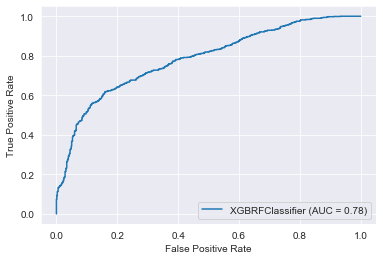

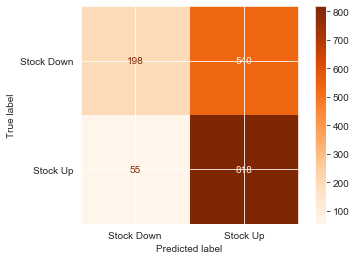

In [36]:
%%time

#### Train dataset metrics
Stock_Utils.custom_classification_metrics(estimator_list[3],x_train,y_train,y_train_preds[3],labels,'Train')   

Test  dataset has an accuracy of  52.0
              precision    recall  f1-score   support

  Stock Down       0.57      0.13      0.22       186
    Stock Up       0.52      0.90      0.66       192

    accuracy                           0.52       378
   macro avg       0.54      0.52      0.44       378
weighted avg       0.54      0.52      0.44       378

The ROC AUC Score on  Test  dataset :  0.5
Wall time: 432 ms


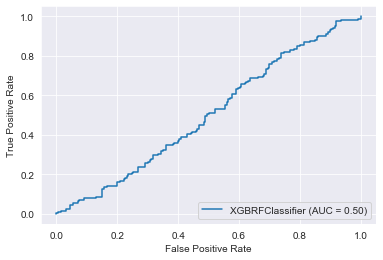

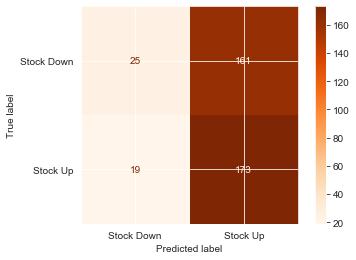

In [37]:
%%time

#### Test dataset metrics
Stock_Utils.custom_classification_metrics(estimator_list[3],x_test,y_test,y_test_preds[3],labels,'Test')

#### 6.3 Using TFIDF (TfidfVectorizer)

In [38]:
%%time
tfidf_vec,x_train1 = Text_Data_Preprocessing.TFIDF(list(train['preprocessed_headline']))

x_train1 = x_train1.toarray()
y_train1 = train['Label']

print("Shape of x_train1 : ",x_train1.shape)
print("Shape of y_train1 : ",y_train1.shape)

Shape of x_train1 :  (1611, 26776)
Shape of y_train1 :  (1611,)
Wall time: 536 ms


In [39]:
pd.DataFrame(x_train1).head(4)

,0,1,2,3,4,5,6,7,8,9,...,26766,26767,26768,26769,26770,26771,26772,26773,26774,26775
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
%%time
### transforming test dataset 
x_test1 = tfidf_vec.transform(list(test['preprocessed_headline']))

x_test1 = x_test1.toarray()
y_test1 = test['Label']

print("Shape of x_test1 : ",x_test1.shape)
print("Shape of y_test1 : ",y_test1.shape)

Shape of x_test1 :  (378, 26776)
Shape of y_test1 :  (378,)
Wall time: 98 ms


In [41]:
pd.DataFrame(x_test1).head(4)

,0,1,2,3,4,5,6,7,8,9,...,26766,26767,26768,26769,26770,26771,26772,26773,26774,26775
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
### init various models 

stock_svc = SVC(random_state=101)

stock_knn = KNeighborsClassifier()

stock_nb = MultinomialNB()

stock_rf = RandomForestClassifier(random_state=101)

stock_xgboost = XGBRFClassifier(random_state=101)

stock_catboost = CatBoostClassifier(random_state=101)

stock_lgbm = LGBMClassifier(random_state=101)

In [43]:
Models = {'KNN-tfidf': stock_knn,
         'NaiveBayes-tfidf': stock_nb,
         'RandomForest-tfidf':stock_rf,
         'XGB-tfidf':stock_xgboost,
         'CatBoost-tfidf':stock_catboost,
         'LGBM-tfidf':stock_lgbm}

y_train_preds = []
y_test_preds = []
estimator_list = []

In [44]:
%%time 

for algo,model in Models.items():
    estimator,y_train_pred,y_test_pred,Model_logging = Stock_Utils.model_building(model,x_train,y_train,x_test,y_test,algo,Model_logging)
    
    y_train_preds.append(y_train_pred)
    y_test_preds.append(y_test_pred)
    estimator_list.append(estimator)
    
    pickle.dump(estimator, open(model_data_path + algo + '.pkl','wb'))

Learning rate set to 0.012629
0:	learn: 0.6929286	total: 193ms	remaining: 3m 12s
1:	learn: 0.6926762	total: 336ms	remaining: 2m 47s
2:	learn: 0.6925142	total: 492ms	remaining: 2m 43s
3:	learn: 0.6922852	total: 617ms	remaining: 2m 33s
4:	learn: 0.6921371	total: 790ms	remaining: 2m 37s
5:	learn: 0.6918090	total: 925ms	remaining: 2m 33s
6:	learn: 0.6915689	total: 1.06s	remaining: 2m 30s
7:	learn: 0.6912106	total: 1.19s	remaining: 2m 27s
8:	learn: 0.6909904	total: 1.32s	remaining: 2m 25s
9:	learn: 0.6908048	total: 1.47s	remaining: 2m 25s
10:	learn: 0.6905360	total: 1.6s	remaining: 2m 24s
11:	learn: 0.6903377	total: 1.73s	remaining: 2m 22s
12:	learn: 0.6899380	total: 1.88s	remaining: 2m 23s
13:	learn: 0.6895167	total: 2.05s	remaining: 2m 24s
14:	learn: 0.6892811	total: 2.2s	remaining: 2m 24s
15:	learn: 0.6891098	total: 2.36s	remaining: 2m 24s
16:	learn: 0.6886069	total: 2.52s	remaining: 2m 25s
17:	learn: 0.6883698	total: 2.66s	remaining: 2m 25s
18:	learn: 0.6881785	total: 2.79s	remaining: 2

158:	learn: 0.6567315	total: 23.4s	remaining: 2m 3s
159:	learn: 0.6565730	total: 23.6s	remaining: 2m 3s
160:	learn: 0.6564097	total: 23.7s	remaining: 2m 3s
161:	learn: 0.6562693	total: 23.9s	remaining: 2m 3s
162:	learn: 0.6560756	total: 24s	remaining: 2m 3s
163:	learn: 0.6559308	total: 24.1s	remaining: 2m 3s
164:	learn: 0.6557907	total: 24.3s	remaining: 2m 3s
165:	learn: 0.6555580	total: 24.5s	remaining: 2m 2s
166:	learn: 0.6552572	total: 24.6s	remaining: 2m 2s
167:	learn: 0.6550866	total: 24.8s	remaining: 2m 2s
168:	learn: 0.6547865	total: 24.9s	remaining: 2m 2s
169:	learn: 0.6546593	total: 25.1s	remaining: 2m 2s
170:	learn: 0.6544335	total: 25.2s	remaining: 2m 2s
171:	learn: 0.6541271	total: 25.3s	remaining: 2m 1s
172:	learn: 0.6538889	total: 25.5s	remaining: 2m 1s
173:	learn: 0.6536828	total: 25.6s	remaining: 2m 1s
174:	learn: 0.6534981	total: 25.8s	remaining: 2m 1s
175:	learn: 0.6533248	total: 25.9s	remaining: 2m 1s
176:	learn: 0.6532065	total: 26s	remaining: 2m 1s
177:	learn: 0.65

314:	learn: 0.6265585	total: 45.4s	remaining: 1m 38s
315:	learn: 0.6264985	total: 45.5s	remaining: 1m 38s
316:	learn: 0.6262536	total: 45.6s	remaining: 1m 38s
317:	learn: 0.6261583	total: 45.8s	remaining: 1m 38s
318:	learn: 0.6259300	total: 45.9s	remaining: 1m 37s
319:	learn: 0.6256998	total: 46s	remaining: 1m 37s
320:	learn: 0.6254427	total: 46.1s	remaining: 1m 37s
321:	learn: 0.6252721	total: 46.3s	remaining: 1m 37s
322:	learn: 0.6250713	total: 46.5s	remaining: 1m 37s
323:	learn: 0.6249666	total: 46.6s	remaining: 1m 37s
324:	learn: 0.6248038	total: 46.8s	remaining: 1m 37s
325:	learn: 0.6246771	total: 46.9s	remaining: 1m 36s
326:	learn: 0.6244338	total: 47s	remaining: 1m 36s
327:	learn: 0.6242473	total: 47.2s	remaining: 1m 36s
328:	learn: 0.6240577	total: 47.3s	remaining: 1m 36s
329:	learn: 0.6238043	total: 47.4s	remaining: 1m 36s
330:	learn: 0.6236132	total: 47.6s	remaining: 1m 36s
331:	learn: 0.6232884	total: 47.7s	remaining: 1m 36s
332:	learn: 0.6231845	total: 47.9s	remaining: 1m 3

470:	learn: 0.5968488	total: 1m 7s	remaining: 1m 15s
471:	learn: 0.5966309	total: 1m 7s	remaining: 1m 15s
472:	learn: 0.5963199	total: 1m 7s	remaining: 1m 15s
473:	learn: 0.5961834	total: 1m 8s	remaining: 1m 15s
474:	learn: 0.5959809	total: 1m 8s	remaining: 1m 15s
475:	learn: 0.5956415	total: 1m 8s	remaining: 1m 15s
476:	learn: 0.5952826	total: 1m 8s	remaining: 1m 15s
477:	learn: 0.5951296	total: 1m 8s	remaining: 1m 14s
478:	learn: 0.5948977	total: 1m 8s	remaining: 1m 14s
479:	learn: 0.5946318	total: 1m 8s	remaining: 1m 14s
480:	learn: 0.5944999	total: 1m 9s	remaining: 1m 14s
481:	learn: 0.5942436	total: 1m 9s	remaining: 1m 14s
482:	learn: 0.5940783	total: 1m 9s	remaining: 1m 14s
483:	learn: 0.5937686	total: 1m 9s	remaining: 1m 14s
484:	learn: 0.5933822	total: 1m 9s	remaining: 1m 13s
485:	learn: 0.5931782	total: 1m 9s	remaining: 1m 13s
486:	learn: 0.5928988	total: 1m 9s	remaining: 1m 13s
487:	learn: 0.5927131	total: 1m 10s	remaining: 1m 13s
488:	learn: 0.5925619	total: 1m 10s	remaining

626:	learn: 0.5546645	total: 1m 29s	remaining: 53.4s
627:	learn: 0.5544189	total: 1m 29s	remaining: 53.3s
628:	learn: 0.5541404	total: 1m 30s	remaining: 53.2s
629:	learn: 0.5537662	total: 1m 30s	remaining: 53.1s
630:	learn: 0.5534436	total: 1m 30s	remaining: 52.9s
631:	learn: 0.5530801	total: 1m 30s	remaining: 52.8s
632:	learn: 0.5525487	total: 1m 30s	remaining: 52.7s
633:	learn: 0.5521783	total: 1m 31s	remaining: 52.5s
634:	learn: 0.5517502	total: 1m 31s	remaining: 52.4s
635:	learn: 0.5515051	total: 1m 31s	remaining: 52.2s
636:	learn: 0.5510305	total: 1m 31s	remaining: 52.1s
637:	learn: 0.5506814	total: 1m 31s	remaining: 51.9s
638:	learn: 0.5502803	total: 1m 31s	remaining: 51.8s
639:	learn: 0.5500113	total: 1m 31s	remaining: 51.6s
640:	learn: 0.5495654	total: 1m 31s	remaining: 51.5s
641:	learn: 0.5491046	total: 1m 31s	remaining: 51.3s
642:	learn: 0.5488190	total: 1m 32s	remaining: 51.2s
643:	learn: 0.5484306	total: 1m 32s	remaining: 51s
644:	learn: 0.5480664	total: 1m 32s	remaining: 5

782:	learn: 0.4977801	total: 1m 52s	remaining: 31.2s
783:	learn: 0.4973926	total: 1m 52s	remaining: 31s
784:	learn: 0.4970257	total: 1m 52s	remaining: 30.9s
785:	learn: 0.4967084	total: 1m 53s	remaining: 30.8s
786:	learn: 0.4963468	total: 1m 53s	remaining: 30.7s
787:	learn: 0.4959714	total: 1m 53s	remaining: 30.5s
788:	learn: 0.4954923	total: 1m 53s	remaining: 30.4s
789:	learn: 0.4951311	total: 1m 53s	remaining: 30.2s
790:	learn: 0.4947556	total: 1m 53s	remaining: 30.1s
791:	learn: 0.4942283	total: 1m 54s	remaining: 29.9s
792:	learn: 0.4937182	total: 1m 54s	remaining: 29.8s
793:	learn: 0.4932490	total: 1m 54s	remaining: 29.7s
794:	learn: 0.4928163	total: 1m 54s	remaining: 29.5s
795:	learn: 0.4923032	total: 1m 54s	remaining: 29.4s
796:	learn: 0.4918395	total: 1m 54s	remaining: 29.2s
797:	learn: 0.4915757	total: 1m 54s	remaining: 29.1s
798:	learn: 0.4913413	total: 1m 55s	remaining: 28.9s
799:	learn: 0.4909741	total: 1m 55s	remaining: 28.8s
800:	learn: 0.4905400	total: 1m 55s	remaining: 2

939:	learn: 0.4423763	total: 2m 15s	remaining: 8.65s
940:	learn: 0.4421381	total: 2m 15s	remaining: 8.5s
941:	learn: 0.4418730	total: 2m 15s	remaining: 8.36s
942:	learn: 0.4416047	total: 2m 15s	remaining: 8.21s
943:	learn: 0.4414058	total: 2m 16s	remaining: 8.07s
944:	learn: 0.4410654	total: 2m 16s	remaining: 7.92s
945:	learn: 0.4407512	total: 2m 16s	remaining: 7.78s
946:	learn: 0.4403383	total: 2m 16s	remaining: 7.63s
947:	learn: 0.4396296	total: 2m 16s	remaining: 7.49s
948:	learn: 0.4393581	total: 2m 16s	remaining: 7.35s
949:	learn: 0.4389347	total: 2m 16s	remaining: 7.2s
950:	learn: 0.4384395	total: 2m 17s	remaining: 7.06s
951:	learn: 0.4380616	total: 2m 17s	remaining: 6.91s
952:	learn: 0.4376458	total: 2m 17s	remaining: 6.77s
953:	learn: 0.4372778	total: 2m 17s	remaining: 6.62s
954:	learn: 0.4369451	total: 2m 17s	remaining: 6.48s
955:	learn: 0.4366956	total: 2m 17s	remaining: 6.33s
956:	learn: 0.4364972	total: 2m 17s	remaining: 6.19s
957:	learn: 0.4361792	total: 2m 17s	remaining: 6

96:	learn: 0.6673051	total: 11.4s	remaining: 1m 46s
97:	learn: 0.6670786	total: 11.5s	remaining: 1m 46s
98:	learn: 0.6669833	total: 11.6s	remaining: 1m 45s
99:	learn: 0.6667126	total: 11.8s	remaining: 1m 45s
100:	learn: 0.6663310	total: 11.9s	remaining: 1m 45s
101:	learn: 0.6661578	total: 12s	remaining: 1m 45s
102:	learn: 0.6660587	total: 12.2s	remaining: 1m 46s
103:	learn: 0.6656412	total: 12.4s	remaining: 1m 47s
104:	learn: 0.6654084	total: 12.6s	remaining: 1m 47s
105:	learn: 0.6652010	total: 12.8s	remaining: 1m 47s
106:	learn: 0.6649553	total: 12.9s	remaining: 1m 47s
107:	learn: 0.6647728	total: 13.1s	remaining: 1m 48s
108:	learn: 0.6645557	total: 13.3s	remaining: 1m 48s
109:	learn: 0.6642844	total: 13.4s	remaining: 1m 48s
110:	learn: 0.6638414	total: 13.5s	remaining: 1m 48s
111:	learn: 0.6633918	total: 13.6s	remaining: 1m 48s
112:	learn: 0.6632957	total: 13.8s	remaining: 1m 48s
113:	learn: 0.6629818	total: 13.9s	remaining: 1m 47s
114:	learn: 0.6627131	total: 14s	remaining: 1m 47s
1

252:	learn: 0.6308942	total: 30.7s	remaining: 1m 30s
253:	learn: 0.6307530	total: 30.8s	remaining: 1m 30s
254:	learn: 0.6305574	total: 30.9s	remaining: 1m 30s
255:	learn: 0.6303070	total: 31.1s	remaining: 1m 30s
256:	learn: 0.6299936	total: 31.2s	remaining: 1m 30s
257:	learn: 0.6297756	total: 31.3s	remaining: 1m 30s
258:	learn: 0.6296378	total: 31.4s	remaining: 1m 29s
259:	learn: 0.6293680	total: 31.5s	remaining: 1m 29s
260:	learn: 0.6291398	total: 31.7s	remaining: 1m 29s
261:	learn: 0.6289604	total: 31.8s	remaining: 1m 29s
262:	learn: 0.6286336	total: 31.9s	remaining: 1m 29s
263:	learn: 0.6285216	total: 32s	remaining: 1m 29s
264:	learn: 0.6284172	total: 32.2s	remaining: 1m 29s
265:	learn: 0.6282851	total: 32.3s	remaining: 1m 29s
266:	learn: 0.6281112	total: 32.4s	remaining: 1m 29s
267:	learn: 0.6279910	total: 32.5s	remaining: 1m 28s
268:	learn: 0.6278307	total: 32.7s	remaining: 1m 28s
269:	learn: 0.6277166	total: 32.8s	remaining: 1m 28s
270:	learn: 0.6275163	total: 32.9s	remaining: 1m

408:	learn: 0.5987775	total: 49.5s	remaining: 1m 11s
409:	learn: 0.5986623	total: 49.6s	remaining: 1m 11s
410:	learn: 0.5984811	total: 49.7s	remaining: 1m 11s
411:	learn: 0.5982173	total: 49.8s	remaining: 1m 11s
412:	learn: 0.5979367	total: 50s	remaining: 1m 11s
413:	learn: 0.5976187	total: 50.1s	remaining: 1m 10s
414:	learn: 0.5973919	total: 50.2s	remaining: 1m 10s
415:	learn: 0.5970558	total: 50.3s	remaining: 1m 10s
416:	learn: 0.5969602	total: 50.4s	remaining: 1m 10s
417:	learn: 0.5968121	total: 50.6s	remaining: 1m 10s
418:	learn: 0.5966575	total: 50.7s	remaining: 1m 10s
419:	learn: 0.5963176	total: 50.8s	remaining: 1m 10s
420:	learn: 0.5961434	total: 50.9s	remaining: 1m 10s
421:	learn: 0.5960046	total: 51s	remaining: 1m 9s
422:	learn: 0.5957931	total: 51.1s	remaining: 1m 9s
423:	learn: 0.5953986	total: 51.3s	remaining: 1m 9s
424:	learn: 0.5950676	total: 51.4s	remaining: 1m 9s
425:	learn: 0.5948153	total: 51.5s	remaining: 1m 9s
426:	learn: 0.5945555	total: 51.6s	remaining: 1m 9s
427

567:	learn: 0.5635267	total: 1m 11s	remaining: 54.6s
568:	learn: 0.5633270	total: 1m 11s	remaining: 54.5s
569:	learn: 0.5632112	total: 1m 12s	remaining: 54.4s
570:	learn: 0.5631071	total: 1m 12s	remaining: 54.4s
571:	learn: 0.5627229	total: 1m 12s	remaining: 54.3s
572:	learn: 0.5624306	total: 1m 12s	remaining: 54.2s
573:	learn: 0.5621217	total: 1m 12s	remaining: 54.1s
574:	learn: 0.5619788	total: 1m 13s	remaining: 54s
575:	learn: 0.5616030	total: 1m 13s	remaining: 53.9s
576:	learn: 0.5613456	total: 1m 13s	remaining: 53.8s
577:	learn: 0.5610267	total: 1m 13s	remaining: 53.6s
578:	learn: 0.5607423	total: 1m 13s	remaining: 53.6s
579:	learn: 0.5605574	total: 1m 13s	remaining: 53.5s
580:	learn: 0.5604559	total: 1m 13s	remaining: 53.4s
581:	learn: 0.5602621	total: 1m 14s	remaining: 53.3s
582:	learn: 0.5601423	total: 1m 14s	remaining: 53.2s
583:	learn: 0.5597343	total: 1m 14s	remaining: 53.1s
584:	learn: 0.5594306	total: 1m 14s	remaining: 53s
585:	learn: 0.5591118	total: 1m 14s	remaining: 52.

723:	learn: 0.5106561	total: 1m 36s	remaining: 36.8s
724:	learn: 0.5103805	total: 1m 36s	remaining: 36.6s
725:	learn: 0.5100932	total: 1m 36s	remaining: 36.5s
726:	learn: 0.5095500	total: 1m 36s	remaining: 36.4s
727:	learn: 0.5092578	total: 1m 36s	remaining: 36.2s
728:	learn: 0.5086818	total: 1m 37s	remaining: 36.1s
729:	learn: 0.5082285	total: 1m 37s	remaining: 36s
730:	learn: 0.5079501	total: 1m 37s	remaining: 35.8s
731:	learn: 0.5074909	total: 1m 37s	remaining: 35.7s
732:	learn: 0.5071058	total: 1m 37s	remaining: 35.6s
733:	learn: 0.5066399	total: 1m 37s	remaining: 35.4s
734:	learn: 0.5063528	total: 1m 37s	remaining: 35.3s
735:	learn: 0.5060417	total: 1m 38s	remaining: 35.2s
736:	learn: 0.5056453	total: 1m 38s	remaining: 35s
737:	learn: 0.5051472	total: 1m 38s	remaining: 34.9s
738:	learn: 0.5047804	total: 1m 38s	remaining: 34.8s
739:	learn: 0.5043586	total: 1m 38s	remaining: 34.7s
740:	learn: 0.5039934	total: 1m 38s	remaining: 34.5s
741:	learn: 0.5036736	total: 1m 38s	remaining: 34.

880:	learn: 0.4478612	total: 1m 57s	remaining: 15.9s
881:	learn: 0.4474602	total: 1m 57s	remaining: 15.8s
882:	learn: 0.4468659	total: 1m 57s	remaining: 15.6s
883:	learn: 0.4465030	total: 1m 57s	remaining: 15.5s
884:	learn: 0.4461363	total: 1m 58s	remaining: 15.3s
885:	learn: 0.4459230	total: 1m 58s	remaining: 15.2s
886:	learn: 0.4455025	total: 1m 58s	remaining: 15.1s
887:	learn: 0.4452577	total: 1m 58s	remaining: 14.9s
888:	learn: 0.4449561	total: 1m 58s	remaining: 14.8s
889:	learn: 0.4447432	total: 1m 58s	remaining: 14.7s
890:	learn: 0.4443695	total: 1m 58s	remaining: 14.5s
891:	learn: 0.4440613	total: 1m 58s	remaining: 14.4s
892:	learn: 0.4437823	total: 1m 59s	remaining: 14.3s
893:	learn: 0.4433815	total: 1m 59s	remaining: 14.1s
894:	learn: 0.4429675	total: 1m 59s	remaining: 14s
895:	learn: 0.4425690	total: 1m 59s	remaining: 13.9s
896:	learn: 0.4422190	total: 1m 59s	remaining: 13.7s
897:	learn: 0.4417947	total: 1m 59s	remaining: 13.6s
898:	learn: 0.4412558	total: 1m 59s	remaining: 1

38:	learn: 0.6826233	total: 4.66s	remaining: 1m 54s
39:	learn: 0.6823922	total: 4.78s	remaining: 1m 54s
40:	learn: 0.6820776	total: 4.9s	remaining: 1m 54s
41:	learn: 0.6819030	total: 5.01s	remaining: 1m 54s
42:	learn: 0.6816813	total: 5.14s	remaining: 1m 54s
43:	learn: 0.6815195	total: 5.25s	remaining: 1m 53s
44:	learn: 0.6813454	total: 5.35s	remaining: 1m 53s
45:	learn: 0.6810125	total: 5.45s	remaining: 1m 53s
46:	learn: 0.6808293	total: 5.59s	remaining: 1m 53s
47:	learn: 0.6806777	total: 5.71s	remaining: 1m 53s
48:	learn: 0.6805304	total: 5.83s	remaining: 1m 53s
49:	learn: 0.6803248	total: 5.95s	remaining: 1m 53s
50:	learn: 0.6799849	total: 6.08s	remaining: 1m 53s
51:	learn: 0.6796698	total: 6.19s	remaining: 1m 52s
52:	learn: 0.6793120	total: 6.3s	remaining: 1m 52s
53:	learn: 0.6791077	total: 6.42s	remaining: 1m 52s
54:	learn: 0.6788818	total: 6.53s	remaining: 1m 52s
55:	learn: 0.6787172	total: 6.63s	remaining: 1m 51s
56:	learn: 0.6785184	total: 6.74s	remaining: 1m 51s
57:	learn: 0.6

196:	learn: 0.6459458	total: 23.3s	remaining: 1m 35s
197:	learn: 0.6457975	total: 23.5s	remaining: 1m 35s
198:	learn: 0.6455163	total: 23.6s	remaining: 1m 34s
199:	learn: 0.6453592	total: 23.7s	remaining: 1m 34s
200:	learn: 0.6452648	total: 23.8s	remaining: 1m 34s
201:	learn: 0.6450618	total: 23.9s	remaining: 1m 34s
202:	learn: 0.6448648	total: 24s	remaining: 1m 34s
203:	learn: 0.6446202	total: 24.1s	remaining: 1m 34s
204:	learn: 0.6444149	total: 24.2s	remaining: 1m 34s
205:	learn: 0.6441708	total: 24.4s	remaining: 1m 33s
206:	learn: 0.6439598	total: 24.5s	remaining: 1m 33s
207:	learn: 0.6437845	total: 24.6s	remaining: 1m 33s
208:	learn: 0.6434780	total: 24.7s	remaining: 1m 33s
209:	learn: 0.6432300	total: 24.9s	remaining: 1m 33s
210:	learn: 0.6429936	total: 25s	remaining: 1m 33s
211:	learn: 0.6428516	total: 25.1s	remaining: 1m 33s
212:	learn: 0.6426790	total: 25.2s	remaining: 1m 33s
213:	learn: 0.6424551	total: 25.3s	remaining: 1m 33s
214:	learn: 0.6422228	total: 25.4s	remaining: 1m 3

353:	learn: 0.6128642	total: 41.8s	remaining: 1m 16s
354:	learn: 0.6125174	total: 41.9s	remaining: 1m 16s
355:	learn: 0.6122351	total: 42s	remaining: 1m 16s
356:	learn: 0.6119774	total: 42.2s	remaining: 1m 15s
357:	learn: 0.6117671	total: 42.3s	remaining: 1m 15s
358:	learn: 0.6115020	total: 42.4s	remaining: 1m 15s
359:	learn: 0.6113344	total: 42.6s	remaining: 1m 15s
360:	learn: 0.6112065	total: 42.7s	remaining: 1m 15s
361:	learn: 0.6110352	total: 42.9s	remaining: 1m 15s
362:	learn: 0.6108764	total: 43s	remaining: 1m 15s
363:	learn: 0.6107670	total: 43.1s	remaining: 1m 15s
364:	learn: 0.6104487	total: 43.2s	remaining: 1m 15s
365:	learn: 0.6101588	total: 43.4s	remaining: 1m 15s
366:	learn: 0.6100062	total: 43.5s	remaining: 1m 15s
367:	learn: 0.6097887	total: 43.6s	remaining: 1m 14s
368:	learn: 0.6095909	total: 43.7s	remaining: 1m 14s
369:	learn: 0.6093469	total: 43.8s	remaining: 1m 14s
370:	learn: 0.6092309	total: 43.9s	remaining: 1m 14s
371:	learn: 0.6090026	total: 44s	remaining: 1m 14s

512:	learn: 0.5800539	total: 1m 1s	remaining: 58s
513:	learn: 0.5798743	total: 1m 1s	remaining: 57.9s
514:	learn: 0.5797613	total: 1m 1s	remaining: 57.7s
515:	learn: 0.5795488	total: 1m 1s	remaining: 57.6s
516:	learn: 0.5792465	total: 1m 1s	remaining: 57.5s
517:	learn: 0.5789196	total: 1m 1s	remaining: 57.4s
518:	learn: 0.5786139	total: 1m 1s	remaining: 57.3s
519:	learn: 0.5783059	total: 1m 1s	remaining: 57.2s
520:	learn: 0.5781281	total: 1m 2s	remaining: 57s
521:	learn: 0.5779264	total: 1m 2s	remaining: 57s
522:	learn: 0.5778050	total: 1m 2s	remaining: 56.8s
523:	learn: 0.5775893	total: 1m 2s	remaining: 56.7s
524:	learn: 0.5773400	total: 1m 2s	remaining: 56.6s
525:	learn: 0.5770912	total: 1m 2s	remaining: 56.5s
526:	learn: 0.5769800	total: 1m 2s	remaining: 56.4s
527:	learn: 0.5767418	total: 1m 2s	remaining: 56.3s
528:	learn: 0.5765351	total: 1m 3s	remaining: 56.2s
529:	learn: 0.5763281	total: 1m 3s	remaining: 56.1s
530:	learn: 0.5761712	total: 1m 3s	remaining: 55.9s
531:	learn: 0.5758

669:	learn: 0.5374451	total: 1m 20s	remaining: 39.5s
670:	learn: 0.5371564	total: 1m 20s	remaining: 39.4s
671:	learn: 0.5368130	total: 1m 20s	remaining: 39.2s
672:	learn: 0.5365639	total: 1m 20s	remaining: 39.1s
673:	learn: 0.5360338	total: 1m 20s	remaining: 39s
674:	learn: 0.5357855	total: 1m 20s	remaining: 38.9s
675:	learn: 0.5353336	total: 1m 20s	remaining: 38.7s
676:	learn: 0.5350968	total: 1m 20s	remaining: 38.6s
677:	learn: 0.5347978	total: 1m 21s	remaining: 38.5s
678:	learn: 0.5345375	total: 1m 21s	remaining: 38.4s
679:	learn: 0.5342245	total: 1m 21s	remaining: 38.2s
680:	learn: 0.5339650	total: 1m 21s	remaining: 38.1s
681:	learn: 0.5337340	total: 1m 21s	remaining: 38s
682:	learn: 0.5335518	total: 1m 21s	remaining: 37.9s
683:	learn: 0.5332078	total: 1m 21s	remaining: 37.7s
684:	learn: 0.5328499	total: 1m 21s	remaining: 37.6s
685:	learn: 0.5324203	total: 1m 21s	remaining: 37.5s
686:	learn: 0.5321169	total: 1m 22s	remaining: 37.4s
687:	learn: 0.5318255	total: 1m 22s	remaining: 37.

827:	learn: 0.4761057	total: 1m 38s	remaining: 20.6s
828:	learn: 0.4757782	total: 1m 39s	remaining: 20.4s
829:	learn: 0.4753801	total: 1m 39s	remaining: 20.3s
830:	learn: 0.4749913	total: 1m 39s	remaining: 20.2s
831:	learn: 0.4747069	total: 1m 39s	remaining: 20.1s
832:	learn: 0.4742069	total: 1m 39s	remaining: 20s
833:	learn: 0.4738174	total: 1m 39s	remaining: 19.9s
834:	learn: 0.4734681	total: 1m 39s	remaining: 19.7s
835:	learn: 0.4731258	total: 1m 40s	remaining: 19.6s
836:	learn: 0.4724881	total: 1m 40s	remaining: 19.5s
837:	learn: 0.4721642	total: 1m 40s	remaining: 19.4s
838:	learn: 0.4719311	total: 1m 40s	remaining: 19.3s
839:	learn: 0.4714165	total: 1m 40s	remaining: 19.2s
840:	learn: 0.4708290	total: 1m 40s	remaining: 19s
841:	learn: 0.4704202	total: 1m 40s	remaining: 18.9s
842:	learn: 0.4700745	total: 1m 40s	remaining: 18.8s
843:	learn: 0.4698470	total: 1m 41s	remaining: 18.7s
844:	learn: 0.4693976	total: 1m 41s	remaining: 18.6s
845:	learn: 0.4690685	total: 1m 41s	remaining: 18.

984:	learn: 0.4188773	total: 1m 57s	remaining: 1.8s
985:	learn: 0.4186335	total: 1m 58s	remaining: 1.68s
986:	learn: 0.4184142	total: 1m 58s	remaining: 1.56s
987:	learn: 0.4180918	total: 1m 58s	remaining: 1.44s
988:	learn: 0.4175305	total: 1m 58s	remaining: 1.32s
989:	learn: 0.4172361	total: 1m 58s	remaining: 1.2s
990:	learn: 0.4168150	total: 1m 58s	remaining: 1.08s
991:	learn: 0.4164074	total: 1m 58s	remaining: 958ms
992:	learn: 0.4160428	total: 1m 58s	remaining: 838ms
993:	learn: 0.4157580	total: 1m 59s	remaining: 718ms
994:	learn: 0.4155339	total: 1m 59s	remaining: 599ms
995:	learn: 0.4151956	total: 1m 59s	remaining: 479ms
996:	learn: 0.4148805	total: 1m 59s	remaining: 359ms
997:	learn: 0.4145123	total: 1m 59s	remaining: 240ms
998:	learn: 0.4142129	total: 1m 59s	remaining: 120ms
999:	learn: 0.4138871	total: 1m 59s	remaining: 0us
Learning rate set to 0.011482
0:	learn: 0.6930047	total: 211ms	remaining: 3m 31s
1:	learn: 0.6926267	total: 363ms	remaining: 3m 1s
2:	learn: 0.6923134	total

143:	learn: 0.6575595	total: 20.2s	remaining: 1m 59s
144:	learn: 0.6573632	total: 20.3s	remaining: 1m 59s
145:	learn: 0.6570544	total: 20.4s	remaining: 1m 59s
146:	learn: 0.6569217	total: 20.5s	remaining: 1m 59s
147:	learn: 0.6567341	total: 20.6s	remaining: 1m 58s
148:	learn: 0.6565755	total: 20.7s	remaining: 1m 58s
149:	learn: 0.6563311	total: 20.9s	remaining: 1m 58s
150:	learn: 0.6561805	total: 21.1s	remaining: 1m 58s
151:	learn: 0.6559286	total: 21.2s	remaining: 1m 58s
152:	learn: 0.6555449	total: 21.3s	remaining: 1m 57s
153:	learn: 0.6553572	total: 21.4s	remaining: 1m 57s
154:	learn: 0.6552036	total: 21.5s	remaining: 1m 57s
155:	learn: 0.6550537	total: 21.6s	remaining: 1m 57s
156:	learn: 0.6548743	total: 21.8s	remaining: 1m 56s
157:	learn: 0.6547299	total: 21.9s	remaining: 1m 56s
158:	learn: 0.6546212	total: 22.1s	remaining: 1m 56s
159:	learn: 0.6544570	total: 22.2s	remaining: 1m 56s
160:	learn: 0.6541965	total: 22.3s	remaining: 1m 56s
161:	learn: 0.6540507	total: 22.5s	remaining: 

300:	learn: 0.6233328	total: 40.6s	remaining: 1m 34s
301:	learn: 0.6231598	total: 40.7s	remaining: 1m 34s
302:	learn: 0.6230359	total: 40.8s	remaining: 1m 33s
303:	learn: 0.6229864	total: 41s	remaining: 1m 33s
304:	learn: 0.6228883	total: 41.1s	remaining: 1m 33s
305:	learn: 0.6227506	total: 41.2s	remaining: 1m 33s
306:	learn: 0.6226867	total: 41.3s	remaining: 1m 33s
307:	learn: 0.6225268	total: 41.4s	remaining: 1m 33s
308:	learn: 0.6223616	total: 41.6s	remaining: 1m 32s
309:	learn: 0.6222492	total: 41.7s	remaining: 1m 32s
310:	learn: 0.6221256	total: 41.8s	remaining: 1m 32s
311:	learn: 0.6219736	total: 41.9s	remaining: 1m 32s
312:	learn: 0.6217872	total: 42.1s	remaining: 1m 32s
313:	learn: 0.6215098	total: 42.2s	remaining: 1m 32s
314:	learn: 0.6212150	total: 42.4s	remaining: 1m 32s
315:	learn: 0.6209614	total: 42.5s	remaining: 1m 32s
316:	learn: 0.6207821	total: 42.7s	remaining: 1m 32s
317:	learn: 0.6206333	total: 42.9s	remaining: 1m 32s
318:	learn: 0.6203297	total: 43.1s	remaining: 1m

456:	learn: 0.5912084	total: 1m 1s	remaining: 1m 13s
457:	learn: 0.5911156	total: 1m 1s	remaining: 1m 13s
458:	learn: 0.5908386	total: 1m 1s	remaining: 1m 13s
459:	learn: 0.5907555	total: 1m 2s	remaining: 1m 12s
460:	learn: 0.5904330	total: 1m 2s	remaining: 1m 12s
461:	learn: 0.5902536	total: 1m 2s	remaining: 1m 12s
462:	learn: 0.5900827	total: 1m 2s	remaining: 1m 12s
463:	learn: 0.5899403	total: 1m 2s	remaining: 1m 12s
464:	learn: 0.5897555	total: 1m 2s	remaining: 1m 12s
465:	learn: 0.5895574	total: 1m 2s	remaining: 1m 12s
466:	learn: 0.5893320	total: 1m 2s	remaining: 1m 11s
467:	learn: 0.5890964	total: 1m 3s	remaining: 1m 11s
468:	learn: 0.5888286	total: 1m 3s	remaining: 1m 11s
469:	learn: 0.5885118	total: 1m 3s	remaining: 1m 11s
470:	learn: 0.5883181	total: 1m 3s	remaining: 1m 11s
471:	learn: 0.5879954	total: 1m 3s	remaining: 1m 11s
472:	learn: 0.5876741	total: 1m 3s	remaining: 1m 11s
473:	learn: 0.5874404	total: 1m 4s	remaining: 1m 11s
474:	learn: 0.5873314	total: 1m 4s	remaining: 

612:	learn: 0.5517662	total: 1m 22s	remaining: 51.9s
613:	learn: 0.5514578	total: 1m 22s	remaining: 51.8s
614:	learn: 0.5512168	total: 1m 22s	remaining: 51.7s
615:	learn: 0.5510376	total: 1m 22s	remaining: 51.5s
616:	learn: 0.5506037	total: 1m 22s	remaining: 51.4s
617:	learn: 0.5500368	total: 1m 22s	remaining: 51.3s
618:	learn: 0.5497242	total: 1m 23s	remaining: 51.1s
619:	learn: 0.5494554	total: 1m 23s	remaining: 51s
620:	learn: 0.5491722	total: 1m 23s	remaining: 50.8s
621:	learn: 0.5488800	total: 1m 23s	remaining: 50.7s
622:	learn: 0.5487016	total: 1m 23s	remaining: 50.6s
623:	learn: 0.5483668	total: 1m 23s	remaining: 50.4s
624:	learn: 0.5478990	total: 1m 23s	remaining: 50.3s
625:	learn: 0.5476344	total: 1m 23s	remaining: 50.1s
626:	learn: 0.5471434	total: 1m 24s	remaining: 50s
627:	learn: 0.5468677	total: 1m 24s	remaining: 49.9s
628:	learn: 0.5462679	total: 1m 24s	remaining: 49.8s
629:	learn: 0.5460317	total: 1m 24s	remaining: 49.7s
630:	learn: 0.5457973	total: 1m 24s	remaining: 49.

768:	learn: 0.4957707	total: 1m 43s	remaining: 31s
769:	learn: 0.4953169	total: 1m 43s	remaining: 30.9s
770:	learn: 0.4949220	total: 1m 43s	remaining: 30.7s
771:	learn: 0.4946072	total: 1m 43s	remaining: 30.6s
772:	learn: 0.4942141	total: 1m 43s	remaining: 30.4s
773:	learn: 0.4938874	total: 1m 43s	remaining: 30.3s
774:	learn: 0.4934680	total: 1m 43s	remaining: 30.2s
775:	learn: 0.4929960	total: 1m 44s	remaining: 30s
776:	learn: 0.4925624	total: 1m 44s	remaining: 29.9s
777:	learn: 0.4923608	total: 1m 44s	remaining: 29.8s
778:	learn: 0.4920812	total: 1m 44s	remaining: 29.6s
779:	learn: 0.4916338	total: 1m 44s	remaining: 29.5s
780:	learn: 0.4914030	total: 1m 44s	remaining: 29.4s
781:	learn: 0.4911797	total: 1m 44s	remaining: 29.2s
782:	learn: 0.4907185	total: 1m 45s	remaining: 29.1s
783:	learn: 0.4904817	total: 1m 45s	remaining: 29s
784:	learn: 0.4901448	total: 1m 45s	remaining: 28.8s
785:	learn: 0.4896823	total: 1m 45s	remaining: 28.7s
786:	learn: 0.4892426	total: 1m 45s	remaining: 28.6s

926:	learn: 0.4354318	total: 2m 3s	remaining: 9.75s
927:	learn: 0.4351264	total: 2m 3s	remaining: 9.62s
928:	learn: 0.4348634	total: 2m 4s	remaining: 9.48s
929:	learn: 0.4345661	total: 2m 4s	remaining: 9.35s
930:	learn: 0.4340116	total: 2m 4s	remaining: 9.21s
931:	learn: 0.4336090	total: 2m 4s	remaining: 9.08s
932:	learn: 0.4332489	total: 2m 4s	remaining: 8.94s
933:	learn: 0.4328906	total: 2m 4s	remaining: 8.81s
934:	learn: 0.4323869	total: 2m 4s	remaining: 8.67s
935:	learn: 0.4320252	total: 2m 4s	remaining: 8.54s
936:	learn: 0.4315805	total: 2m 5s	remaining: 8.4s
937:	learn: 0.4313455	total: 2m 5s	remaining: 8.27s
938:	learn: 0.4308835	total: 2m 5s	remaining: 8.14s
939:	learn: 0.4304933	total: 2m 5s	remaining: 8s
940:	learn: 0.4300142	total: 2m 5s	remaining: 7.87s
941:	learn: 0.4297838	total: 2m 5s	remaining: 7.74s
942:	learn: 0.4294028	total: 2m 5s	remaining: 7.6s
943:	learn: 0.4291117	total: 2m 5s	remaining: 7.47s
944:	learn: 0.4286667	total: 2m 6s	remaining: 7.33s
945:	learn: 0.428

85:	learn: 0.6708019	total: 10.6s	remaining: 1m 53s
86:	learn: 0.6705628	total: 10.8s	remaining: 1m 52s
87:	learn: 0.6704296	total: 10.9s	remaining: 1m 53s
88:	learn: 0.6700663	total: 11.1s	remaining: 1m 53s
89:	learn: 0.6699007	total: 11.2s	remaining: 1m 52s
90:	learn: 0.6696888	total: 11.3s	remaining: 1m 52s
91:	learn: 0.6694794	total: 11.5s	remaining: 1m 53s
92:	learn: 0.6693407	total: 11.6s	remaining: 1m 52s
93:	learn: 0.6690654	total: 11.7s	remaining: 1m 52s
94:	learn: 0.6688659	total: 11.8s	remaining: 1m 52s
95:	learn: 0.6684872	total: 11.9s	remaining: 1m 51s
96:	learn: 0.6683470	total: 12s	remaining: 1m 51s
97:	learn: 0.6681821	total: 12.1s	remaining: 1m 51s
98:	learn: 0.6678784	total: 12.2s	remaining: 1m 51s
99:	learn: 0.6677171	total: 12.3s	remaining: 1m 51s
100:	learn: 0.6674097	total: 12.5s	remaining: 1m 50s
101:	learn: 0.6672403	total: 12.6s	remaining: 1m 50s
102:	learn: 0.6670192	total: 12.7s	remaining: 1m 50s
103:	learn: 0.6668014	total: 12.8s	remaining: 1m 50s
104:	learn

242:	learn: 0.6369127	total: 28.7s	remaining: 1m 29s
243:	learn: 0.6367633	total: 28.8s	remaining: 1m 29s
244:	learn: 0.6365588	total: 28.9s	remaining: 1m 29s
245:	learn: 0.6364726	total: 29s	remaining: 1m 28s
246:	learn: 0.6363118	total: 29.1s	remaining: 1m 28s
247:	learn: 0.6362424	total: 29.3s	remaining: 1m 28s
248:	learn: 0.6360996	total: 29.4s	remaining: 1m 28s
249:	learn: 0.6358430	total: 29.5s	remaining: 1m 28s
250:	learn: 0.6357133	total: 29.6s	remaining: 1m 28s
251:	learn: 0.6356036	total: 29.7s	remaining: 1m 28s
252:	learn: 0.6352686	total: 29.8s	remaining: 1m 28s
253:	learn: 0.6349200	total: 29.9s	remaining: 1m 27s
254:	learn: 0.6346221	total: 30s	remaining: 1m 27s
255:	learn: 0.6344368	total: 30.2s	remaining: 1m 27s
256:	learn: 0.6340516	total: 30.3s	remaining: 1m 27s
257:	learn: 0.6338754	total: 30.5s	remaining: 1m 27s
258:	learn: 0.6337951	total: 30.6s	remaining: 1m 27s
259:	learn: 0.6335817	total: 30.8s	remaining: 1m 27s
260:	learn: 0.6332875	total: 30.9s	remaining: 1m 2

399:	learn: 0.6047511	total: 47.5s	remaining: 1m 11s
400:	learn: 0.6045994	total: 47.6s	remaining: 1m 11s
401:	learn: 0.6044428	total: 47.8s	remaining: 1m 11s
402:	learn: 0.6040809	total: 47.9s	remaining: 1m 10s
403:	learn: 0.6038525	total: 48s	remaining: 1m 10s
404:	learn: 0.6036878	total: 48.1s	remaining: 1m 10s
405:	learn: 0.6035243	total: 48.2s	remaining: 1m 10s
406:	learn: 0.6032687	total: 48.3s	remaining: 1m 10s
407:	learn: 0.6031021	total: 48.5s	remaining: 1m 10s
408:	learn: 0.6029642	total: 48.6s	remaining: 1m 10s
409:	learn: 0.6028395	total: 48.7s	remaining: 1m 10s
410:	learn: 0.6027235	total: 48.8s	remaining: 1m 9s
411:	learn: 0.6025919	total: 48.9s	remaining: 1m 9s
412:	learn: 0.6023968	total: 49s	remaining: 1m 9s
413:	learn: 0.6022603	total: 49.1s	remaining: 1m 9s
414:	learn: 0.6021212	total: 49.2s	remaining: 1m 9s
415:	learn: 0.6018144	total: 49.3s	remaining: 1m 9s
416:	learn: 0.6014551	total: 49.4s	remaining: 1m 9s
417:	learn: 0.6013235	total: 49.6s	remaining: 1m 9s
418:	

559:	learn: 0.5697799	total: 1m 6s	remaining: 52.4s
560:	learn: 0.5695791	total: 1m 6s	remaining: 52.3s
561:	learn: 0.5693972	total: 1m 6s	remaining: 52.1s
562:	learn: 0.5690791	total: 1m 6s	remaining: 52s
563:	learn: 0.5688795	total: 1m 7s	remaining: 51.9s
564:	learn: 0.5687243	total: 1m 7s	remaining: 51.7s
565:	learn: 0.5684765	total: 1m 7s	remaining: 51.6s
566:	learn: 0.5682008	total: 1m 7s	remaining: 51.5s
567:	learn: 0.5680463	total: 1m 7s	remaining: 51.4s
568:	learn: 0.5675699	total: 1m 7s	remaining: 51.2s
569:	learn: 0.5671416	total: 1m 7s	remaining: 51.1s
570:	learn: 0.5670193	total: 1m 7s	remaining: 51s
571:	learn: 0.5666302	total: 1m 8s	remaining: 50.9s
572:	learn: 0.5665186	total: 1m 8s	remaining: 50.8s
573:	learn: 0.5662811	total: 1m 8s	remaining: 50.7s
574:	learn: 0.5660448	total: 1m 8s	remaining: 50.6s
575:	learn: 0.5658731	total: 1m 8s	remaining: 50.4s
576:	learn: 0.5655879	total: 1m 8s	remaining: 50.3s
577:	learn: 0.5651719	total: 1m 8s	remaining: 50.2s
578:	learn: 0.56

716:	learn: 0.5171460	total: 1m 25s	remaining: 33.6s
717:	learn: 0.5167825	total: 1m 25s	remaining: 33.4s
718:	learn: 0.5164243	total: 1m 25s	remaining: 33.3s
719:	learn: 0.5160284	total: 1m 25s	remaining: 33.2s
720:	learn: 0.5158256	total: 1m 25s	remaining: 33.1s
721:	learn: 0.5153331	total: 1m 25s	remaining: 33s
722:	learn: 0.5150409	total: 1m 25s	remaining: 32.9s
723:	learn: 0.5147366	total: 1m 25s	remaining: 32.7s
724:	learn: 0.5143941	total: 1m 25s	remaining: 32.6s
725:	learn: 0.5140846	total: 1m 26s	remaining: 32.5s
726:	learn: 0.5135695	total: 1m 26s	remaining: 32.4s
727:	learn: 0.5132183	total: 1m 26s	remaining: 32.2s
728:	learn: 0.5128342	total: 1m 26s	remaining: 32.1s
729:	learn: 0.5123939	total: 1m 26s	remaining: 32s
730:	learn: 0.5119450	total: 1m 26s	remaining: 31.9s
731:	learn: 0.5114944	total: 1m 26s	remaining: 31.8s
732:	learn: 0.5111020	total: 1m 26s	remaining: 31.7s
733:	learn: 0.5108822	total: 1m 27s	remaining: 31.5s
734:	learn: 0.5104324	total: 1m 27s	remaining: 31.

873:	learn: 0.4526876	total: 1m 43s	remaining: 14.9s
874:	learn: 0.4521772	total: 1m 43s	remaining: 14.8s
875:	learn: 0.4517710	total: 1m 43s	remaining: 14.7s
876:	learn: 0.4514863	total: 1m 43s	remaining: 14.5s
877:	learn: 0.4511967	total: 1m 43s	remaining: 14.4s
878:	learn: 0.4508726	total: 1m 43s	remaining: 14.3s
879:	learn: 0.4504331	total: 1m 44s	remaining: 14.2s
880:	learn: 0.4502066	total: 1m 44s	remaining: 14.1s
881:	learn: 0.4499492	total: 1m 44s	remaining: 14s
882:	learn: 0.4495453	total: 1m 44s	remaining: 13.8s
883:	learn: 0.4490314	total: 1m 44s	remaining: 13.7s
884:	learn: 0.4488329	total: 1m 44s	remaining: 13.6s
885:	learn: 0.4484573	total: 1m 44s	remaining: 13.5s
886:	learn: 0.4481577	total: 1m 44s	remaining: 13.4s
887:	learn: 0.4480073	total: 1m 44s	remaining: 13.2s
888:	learn: 0.4476483	total: 1m 45s	remaining: 13.1s
889:	learn: 0.4472215	total: 1m 45s	remaining: 13s
890:	learn: 0.4467259	total: 1m 45s	remaining: 12.9s
891:	learn: 0.4464406	total: 1m 45s	remaining: 12.

29:	learn: 0.6845675	total: 3.55s	remaining: 1m 54s
30:	learn: 0.6843736	total: 3.65s	remaining: 1m 54s
31:	learn: 0.6841176	total: 3.77s	remaining: 1m 54s
32:	learn: 0.6837792	total: 3.92s	remaining: 1m 54s
33:	learn: 0.6835223	total: 4.05s	remaining: 1m 55s
34:	learn: 0.6833004	total: 4.16s	remaining: 1m 54s
35:	learn: 0.6829274	total: 4.27s	remaining: 1m 54s
36:	learn: 0.6827020	total: 4.38s	remaining: 1m 53s
37:	learn: 0.6824558	total: 4.49s	remaining: 1m 53s
38:	learn: 0.6822443	total: 4.64s	remaining: 1m 54s
39:	learn: 0.6819813	total: 4.76s	remaining: 1m 54s
40:	learn: 0.6816786	total: 4.88s	remaining: 1m 54s
41:	learn: 0.6815480	total: 4.99s	remaining: 1m 53s
42:	learn: 0.6813396	total: 5.1s	remaining: 1m 53s
43:	learn: 0.6809508	total: 5.22s	remaining: 1m 53s
44:	learn: 0.6807803	total: 5.33s	remaining: 1m 53s
45:	learn: 0.6805798	total: 5.43s	remaining: 1m 52s
46:	learn: 0.6804474	total: 5.54s	remaining: 1m 52s
47:	learn: 0.6802803	total: 5.67s	remaining: 1m 52s
48:	learn: 0.

186:	learn: 0.6456737	total: 22.8s	remaining: 1m 39s
187:	learn: 0.6454051	total: 23s	remaining: 1m 39s
188:	learn: 0.6451294	total: 23.2s	remaining: 1m 39s
189:	learn: 0.6449431	total: 23.3s	remaining: 1m 39s
190:	learn: 0.6447178	total: 23.5s	remaining: 1m 39s
191:	learn: 0.6445364	total: 23.6s	remaining: 1m 39s
192:	learn: 0.6444492	total: 23.7s	remaining: 1m 39s
193:	learn: 0.6442076	total: 23.8s	remaining: 1m 39s
194:	learn: 0.6439663	total: 23.9s	remaining: 1m 38s
195:	learn: 0.6437670	total: 24.1s	remaining: 1m 38s
196:	learn: 0.6434767	total: 24.2s	remaining: 1m 38s
197:	learn: 0.6432669	total: 24.3s	remaining: 1m 38s
198:	learn: 0.6431156	total: 24.4s	remaining: 1m 38s
199:	learn: 0.6429808	total: 24.6s	remaining: 1m 38s
200:	learn: 0.6427509	total: 24.7s	remaining: 1m 38s
201:	learn: 0.6425158	total: 24.8s	remaining: 1m 38s
202:	learn: 0.6422615	total: 24.9s	remaining: 1m 37s
203:	learn: 0.6421738	total: 25.1s	remaining: 1m 37s
204:	learn: 0.6419245	total: 25.2s	remaining: 1m

342:	learn: 0.6150320	total: 41.8s	remaining: 1m 20s
343:	learn: 0.6148999	total: 41.9s	remaining: 1m 19s
344:	learn: 0.6147594	total: 42.1s	remaining: 1m 19s
345:	learn: 0.6145717	total: 42.2s	remaining: 1m 19s
346:	learn: 0.6144943	total: 42.3s	remaining: 1m 19s
347:	learn: 0.6143522	total: 42.4s	remaining: 1m 19s
348:	learn: 0.6142022	total: 42.5s	remaining: 1m 19s
349:	learn: 0.6139737	total: 42.7s	remaining: 1m 19s
350:	learn: 0.6138193	total: 42.8s	remaining: 1m 19s
351:	learn: 0.6135604	total: 42.9s	remaining: 1m 18s
352:	learn: 0.6134697	total: 43s	remaining: 1m 18s
353:	learn: 0.6132557	total: 43.1s	remaining: 1m 18s
354:	learn: 0.6130680	total: 43.2s	remaining: 1m 18s
355:	learn: 0.6129495	total: 43.3s	remaining: 1m 18s
356:	learn: 0.6127763	total: 43.4s	remaining: 1m 18s
357:	learn: 0.6125544	total: 43.6s	remaining: 1m 18s
358:	learn: 0.6123368	total: 43.7s	remaining: 1m 17s
359:	learn: 0.6121349	total: 43.8s	remaining: 1m 17s
360:	learn: 0.6118720	total: 43.9s	remaining: 1m

499:	learn: 0.5829200	total: 1m	remaining: 1m
500:	learn: 0.5827517	total: 1m	remaining: 1m
501:	learn: 0.5824751	total: 1m	remaining: 1m
502:	learn: 0.5822247	total: 1m	remaining: 1m
503:	learn: 0.5819826	total: 1m	remaining: 59.9s
504:	learn: 0.5817944	total: 1m 1s	remaining: 59.8s
505:	learn: 0.5815856	total: 1m 1s	remaining: 59.7s
506:	learn: 0.5814853	total: 1m 1s	remaining: 59.6s
507:	learn: 0.5811721	total: 1m 1s	remaining: 59.5s
508:	learn: 0.5807937	total: 1m 1s	remaining: 59.4s
509:	learn: 0.5804685	total: 1m 1s	remaining: 59.3s
510:	learn: 0.5803254	total: 1m 1s	remaining: 59.2s
511:	learn: 0.5801977	total: 1m 2s	remaining: 59.1s
512:	learn: 0.5800480	total: 1m 2s	remaining: 59.1s
513:	learn: 0.5799888	total: 1m 2s	remaining: 59s
514:	learn: 0.5797713	total: 1m 2s	remaining: 58.9s
515:	learn: 0.5795506	total: 1m 2s	remaining: 58.8s
516:	learn: 0.5793822	total: 1m 2s	remaining: 58.7s
517:	learn: 0.5791705	total: 1m 3s	remaining: 58.6s
518:	learn: 0.5789527	total: 1m 3s	remain

657:	learn: 0.5410161	total: 1m 20s	remaining: 41.9s
658:	learn: 0.5405380	total: 1m 20s	remaining: 41.8s
659:	learn: 0.5400834	total: 1m 20s	remaining: 41.7s
660:	learn: 0.5397832	total: 1m 21s	remaining: 41.6s
661:	learn: 0.5394889	total: 1m 21s	remaining: 41.4s
662:	learn: 0.5391914	total: 1m 21s	remaining: 41.3s
663:	learn: 0.5387274	total: 1m 21s	remaining: 41.2s
664:	learn: 0.5384259	total: 1m 21s	remaining: 41.1s
665:	learn: 0.5379802	total: 1m 21s	remaining: 41s
666:	learn: 0.5377445	total: 1m 21s	remaining: 40.8s
667:	learn: 0.5375222	total: 1m 21s	remaining: 40.7s
668:	learn: 0.5370078	total: 1m 22s	remaining: 40.6s
669:	learn: 0.5366896	total: 1m 22s	remaining: 40.5s
670:	learn: 0.5363515	total: 1m 22s	remaining: 40.3s
671:	learn: 0.5358420	total: 1m 22s	remaining: 40.2s
672:	learn: 0.5354621	total: 1m 22s	remaining: 40.1s
673:	learn: 0.5349539	total: 1m 22s	remaining: 39.9s
674:	learn: 0.5344805	total: 1m 22s	remaining: 39.8s
675:	learn: 0.5339233	total: 1m 22s	remaining: 3

813:	learn: 0.4815292	total: 1m 40s	remaining: 22.9s
814:	learn: 0.4812346	total: 1m 40s	remaining: 22.8s
815:	learn: 0.4808404	total: 1m 40s	remaining: 22.6s
816:	learn: 0.4804577	total: 1m 40s	remaining: 22.5s
817:	learn: 0.4802028	total: 1m 40s	remaining: 22.4s
818:	learn: 0.4798988	total: 1m 40s	remaining: 22.3s
819:	learn: 0.4796993	total: 1m 40s	remaining: 22.2s
820:	learn: 0.4793624	total: 1m 41s	remaining: 22s
821:	learn: 0.4789588	total: 1m 41s	remaining: 21.9s
822:	learn: 0.4784765	total: 1m 41s	remaining: 21.8s
823:	learn: 0.4780978	total: 1m 41s	remaining: 21.7s
824:	learn: 0.4777089	total: 1m 41s	remaining: 21.6s
825:	learn: 0.4770899	total: 1m 41s	remaining: 21.5s
826:	learn: 0.4765420	total: 1m 42s	remaining: 21.3s
827:	learn: 0.4762005	total: 1m 42s	remaining: 21.2s
828:	learn: 0.4757235	total: 1m 42s	remaining: 21.1s
829:	learn: 0.4751691	total: 1m 42s	remaining: 21s
830:	learn: 0.4747456	total: 1m 42s	remaining: 20.8s
831:	learn: 0.4744594	total: 1m 42s	remaining: 20.

969:	learn: 0.4221496	total: 2m	remaining: 3.72s
970:	learn: 0.4216321	total: 2m	remaining: 3.59s
971:	learn: 0.4210227	total: 2m	remaining: 3.47s
972:	learn: 0.4207412	total: 2m	remaining: 3.34s
973:	learn: 0.4204525	total: 2m	remaining: 3.22s
974:	learn: 0.4199414	total: 2m	remaining: 3.1s
975:	learn: 0.4196568	total: 2m	remaining: 2.97s
976:	learn: 0.4193157	total: 2m	remaining: 2.85s
977:	learn: 0.4189643	total: 2m 1s	remaining: 2.72s
978:	learn: 0.4185786	total: 2m 1s	remaining: 2.6s
979:	learn: 0.4183832	total: 2m 1s	remaining: 2.48s
980:	learn: 0.4179697	total: 2m 1s	remaining: 2.35s
981:	learn: 0.4174668	total: 2m 1s	remaining: 2.23s
982:	learn: 0.4171171	total: 2m 1s	remaining: 2.11s
983:	learn: 0.4169391	total: 2m 1s	remaining: 1.98s
984:	learn: 0.4164497	total: 2m 2s	remaining: 1.86s
985:	learn: 0.4160122	total: 2m 2s	remaining: 1.73s
986:	learn: 0.4157076	total: 2m 2s	remaining: 1.61s
987:	learn: 0.4153102	total: 2m 2s	remaining: 1.49s
988:	learn: 0.4148854	total: 2m 2s	rem

130:	learn: 0.6275401	total: 6.33s	remaining: 42s
131:	learn: 0.6271737	total: 6.38s	remaining: 41.9s
132:	learn: 0.6268449	total: 6.42s	remaining: 41.9s
133:	learn: 0.6266257	total: 6.47s	remaining: 41.8s
134:	learn: 0.6258745	total: 6.51s	remaining: 41.7s
135:	learn: 0.6255223	total: 6.56s	remaining: 41.7s
136:	learn: 0.6252113	total: 6.61s	remaining: 41.6s
137:	learn: 0.6248859	total: 6.65s	remaining: 41.5s
138:	learn: 0.6246717	total: 6.7s	remaining: 41.5s
139:	learn: 0.6242087	total: 6.74s	remaining: 41.4s
140:	learn: 0.6239890	total: 6.79s	remaining: 41.3s
141:	learn: 0.6236182	total: 6.83s	remaining: 41.3s
142:	learn: 0.6227627	total: 6.88s	remaining: 41.2s
143:	learn: 0.6224401	total: 6.92s	remaining: 41.2s
144:	learn: 0.6221375	total: 6.97s	remaining: 41.1s
145:	learn: 0.6217714	total: 7.01s	remaining: 41s
146:	learn: 0.6215090	total: 7.06s	remaining: 41s
147:	learn: 0.6211267	total: 7.11s	remaining: 40.9s
148:	learn: 0.6203623	total: 7.16s	remaining: 40.9s
149:	learn: 0.61994

292:	learn: 0.5605142	total: 14.4s	remaining: 34.7s
293:	learn: 0.5601049	total: 14.4s	remaining: 34.7s
294:	learn: 0.5598460	total: 14.5s	remaining: 34.6s
295:	learn: 0.5595188	total: 14.5s	remaining: 34.5s
296:	learn: 0.5591869	total: 14.6s	remaining: 34.5s
297:	learn: 0.5587454	total: 14.6s	remaining: 34.4s
298:	learn: 0.5583198	total: 14.7s	remaining: 34.4s
299:	learn: 0.5580076	total: 14.7s	remaining: 34.3s
300:	learn: 0.5571908	total: 14.7s	remaining: 34.2s
301:	learn: 0.5566752	total: 14.8s	remaining: 34.2s
302:	learn: 0.5560678	total: 14.8s	remaining: 34.1s
303:	learn: 0.5557117	total: 14.9s	remaining: 34.1s
304:	learn: 0.5552730	total: 14.9s	remaining: 34s
305:	learn: 0.5549594	total: 15s	remaining: 34s
306:	learn: 0.5546240	total: 15s	remaining: 33.9s
307:	learn: 0.5544236	total: 15.1s	remaining: 33.9s
308:	learn: 0.5542555	total: 15.1s	remaining: 33.8s
309:	learn: 0.5537721	total: 15.2s	remaining: 33.8s
310:	learn: 0.5535666	total: 15.2s	remaining: 33.7s
311:	learn: 0.553271

453:	learn: 0.5047162	total: 22s	remaining: 26.4s
454:	learn: 0.5044134	total: 22s	remaining: 26.4s
455:	learn: 0.5041460	total: 22.1s	remaining: 26.4s
456:	learn: 0.5038981	total: 22.1s	remaining: 26.3s
457:	learn: 0.5033224	total: 22.2s	remaining: 26.3s
458:	learn: 0.5031158	total: 22.2s	remaining: 26.2s
459:	learn: 0.5029423	total: 22.3s	remaining: 26.2s
460:	learn: 0.5025890	total: 22.3s	remaining: 26.1s
461:	learn: 0.5023073	total: 22.4s	remaining: 26s
462:	learn: 0.5020930	total: 22.4s	remaining: 26s
463:	learn: 0.5019096	total: 22.5s	remaining: 25.9s
464:	learn: 0.5014190	total: 22.5s	remaining: 25.9s
465:	learn: 0.5011603	total: 22.6s	remaining: 25.8s
466:	learn: 0.5009246	total: 22.6s	remaining: 25.8s
467:	learn: 0.5005972	total: 22.6s	remaining: 25.7s
468:	learn: 0.5004138	total: 22.7s	remaining: 25.7s
469:	learn: 0.5000966	total: 22.8s	remaining: 25.7s
470:	learn: 0.4999145	total: 22.8s	remaining: 25.6s
471:	learn: 0.4996838	total: 22.8s	remaining: 25.6s
472:	learn: 0.499463

612:	learn: 0.4556505	total: 29.6s	remaining: 18.7s
613:	learn: 0.4553717	total: 29.6s	remaining: 18.6s
614:	learn: 0.4551397	total: 29.7s	remaining: 18.6s
615:	learn: 0.4548414	total: 29.7s	remaining: 18.5s
616:	learn: 0.4544919	total: 29.7s	remaining: 18.5s
617:	learn: 0.4542484	total: 29.8s	remaining: 18.4s
618:	learn: 0.4537859	total: 29.8s	remaining: 18.4s
619:	learn: 0.4533630	total: 29.9s	remaining: 18.3s
620:	learn: 0.4530964	total: 29.9s	remaining: 18.3s
621:	learn: 0.4526553	total: 30s	remaining: 18.2s
622:	learn: 0.4521512	total: 30s	remaining: 18.2s
623:	learn: 0.4518226	total: 30.1s	remaining: 18.1s
624:	learn: 0.4515616	total: 30.1s	remaining: 18.1s
625:	learn: 0.4513914	total: 30.2s	remaining: 18s
626:	learn: 0.4509604	total: 30.2s	remaining: 18s
627:	learn: 0.4506437	total: 30.2s	remaining: 17.9s
628:	learn: 0.4503557	total: 30.3s	remaining: 17.9s
629:	learn: 0.4497978	total: 30.3s	remaining: 17.8s
630:	learn: 0.4495356	total: 30.4s	remaining: 17.8s
631:	learn: 0.449226

774:	learn: 0.4066843	total: 37.1s	remaining: 10.8s
775:	learn: 0.4064341	total: 37.1s	remaining: 10.7s
776:	learn: 0.4062407	total: 37.2s	remaining: 10.7s
777:	learn: 0.4060889	total: 37.2s	remaining: 10.6s
778:	learn: 0.4056929	total: 37.3s	remaining: 10.6s
779:	learn: 0.4054910	total: 37.3s	remaining: 10.5s
780:	learn: 0.4052013	total: 37.4s	remaining: 10.5s
781:	learn: 0.4049517	total: 37.4s	remaining: 10.4s
782:	learn: 0.4048174	total: 37.5s	remaining: 10.4s
783:	learn: 0.4046614	total: 37.5s	remaining: 10.3s
784:	learn: 0.4042451	total: 37.6s	remaining: 10.3s
785:	learn: 0.4040256	total: 37.6s	remaining: 10.2s
786:	learn: 0.4035782	total: 37.7s	remaining: 10.2s
787:	learn: 0.4032466	total: 37.7s	remaining: 10.2s
788:	learn: 0.4026590	total: 37.8s	remaining: 10.1s
789:	learn: 0.4024790	total: 37.8s	remaining: 10.1s
790:	learn: 0.4022777	total: 37.9s	remaining: 10s
791:	learn: 0.4019547	total: 37.9s	remaining: 9.96s
792:	learn: 0.4017711	total: 38s	remaining: 9.92s
793:	learn: 0.40

933:	learn: 0.3530477	total: 44.7s	remaining: 3.16s
934:	learn: 0.3526883	total: 44.7s	remaining: 3.11s
935:	learn: 0.3519717	total: 44.8s	remaining: 3.06s
936:	learn: 0.3517277	total: 44.8s	remaining: 3.01s
937:	learn: 0.3515669	total: 44.9s	remaining: 2.96s
938:	learn: 0.3512603	total: 44.9s	remaining: 2.92s
939:	learn: 0.3508915	total: 45s	remaining: 2.87s
940:	learn: 0.3504553	total: 45s	remaining: 2.82s
941:	learn: 0.3501906	total: 45s	remaining: 2.77s
942:	learn: 0.3497769	total: 45.1s	remaining: 2.73s
943:	learn: 0.3493432	total: 45.1s	remaining: 2.68s
944:	learn: 0.3489776	total: 45.2s	remaining: 2.63s
945:	learn: 0.3486955	total: 45.2s	remaining: 2.58s
946:	learn: 0.3481646	total: 45.3s	remaining: 2.53s
947:	learn: 0.3475775	total: 45.3s	remaining: 2.48s
948:	learn: 0.3471169	total: 45.4s	remaining: 2.44s
949:	learn: 0.3467404	total: 45.4s	remaining: 2.39s
950:	learn: 0.3465020	total: 45.4s	remaining: 2.34s
951:	learn: 0.3459598	total: 45.5s	remaining: 2.29s
952:	learn: 0.3455

95:	learn: 0.6459399	total: 4.63s	remaining: 43.6s
96:	learn: 0.6450900	total: 4.67s	remaining: 43.5s
97:	learn: 0.6447533	total: 4.72s	remaining: 43.4s
98:	learn: 0.6443318	total: 4.76s	remaining: 43.3s
99:	learn: 0.6439577	total: 4.8s	remaining: 43.2s
100:	learn: 0.6436215	total: 4.85s	remaining: 43.1s
101:	learn: 0.6426139	total: 4.89s	remaining: 43.1s
102:	learn: 0.6420803	total: 4.93s	remaining: 43s
103:	learn: 0.6418118	total: 4.98s	remaining: 42.9s
104:	learn: 0.6415468	total: 5.02s	remaining: 42.8s
105:	learn: 0.6413459	total: 5.07s	remaining: 42.7s
106:	learn: 0.6407995	total: 5.11s	remaining: 42.6s
107:	learn: 0.6404599	total: 5.15s	remaining: 42.6s
108:	learn: 0.6400385	total: 5.2s	remaining: 42.5s
109:	learn: 0.6396630	total: 5.24s	remaining: 42.4s
110:	learn: 0.6393969	total: 5.3s	remaining: 42.4s
111:	learn: 0.6389275	total: 5.36s	remaining: 42.5s
112:	learn: 0.6385282	total: 5.4s	remaining: 42.4s
113:	learn: 0.6379581	total: 5.44s	remaining: 42.3s
114:	learn: 0.6377450	t

255:	learn: 0.5777058	total: 12.2s	remaining: 35.3s
256:	learn: 0.5773760	total: 12.2s	remaining: 35.3s
257:	learn: 0.5770973	total: 12.2s	remaining: 35.2s
258:	learn: 0.5768868	total: 12.3s	remaining: 35.1s
259:	learn: 0.5765004	total: 12.3s	remaining: 35.1s
260:	learn: 0.5761592	total: 12.4s	remaining: 35s
261:	learn: 0.5758273	total: 12.4s	remaining: 35s
262:	learn: 0.5755301	total: 12.5s	remaining: 34.9s
263:	learn: 0.5751995	total: 12.5s	remaining: 34.9s
264:	learn: 0.5748614	total: 12.5s	remaining: 34.8s
265:	learn: 0.5744057	total: 12.6s	remaining: 34.8s
266:	learn: 0.5740669	total: 12.6s	remaining: 34.7s
267:	learn: 0.5735107	total: 12.7s	remaining: 34.7s
268:	learn: 0.5732296	total: 12.7s	remaining: 34.6s
269:	learn: 0.5728224	total: 12.8s	remaining: 34.5s
270:	learn: 0.5725247	total: 12.8s	remaining: 34.5s
271:	learn: 0.5723104	total: 12.9s	remaining: 34.4s
272:	learn: 0.5715387	total: 12.9s	remaining: 34.4s
273:	learn: 0.5710708	total: 12.9s	remaining: 34.3s
274:	learn: 0.57

415:	learn: 0.5198310	total: 19.8s	remaining: 27.7s
416:	learn: 0.5195485	total: 19.8s	remaining: 27.7s
417:	learn: 0.5193413	total: 19.8s	remaining: 27.6s
418:	learn: 0.5190957	total: 19.9s	remaining: 27.6s
419:	learn: 0.5187625	total: 19.9s	remaining: 27.5s
420:	learn: 0.5182263	total: 20s	remaining: 27.5s
421:	learn: 0.5178586	total: 20.1s	remaining: 27.5s
422:	learn: 0.5177197	total: 20.2s	remaining: 27.5s
423:	learn: 0.5174743	total: 20.2s	remaining: 27.4s
424:	learn: 0.5172104	total: 20.2s	remaining: 27.4s
425:	learn: 0.5167821	total: 20.3s	remaining: 27.3s
426:	learn: 0.5165736	total: 20.3s	remaining: 27.3s
427:	learn: 0.5164085	total: 20.4s	remaining: 27.2s
428:	learn: 0.5162093	total: 20.4s	remaining: 27.2s
429:	learn: 0.5160483	total: 20.5s	remaining: 27.1s
430:	learn: 0.5155386	total: 20.5s	remaining: 27.1s
431:	learn: 0.5153799	total: 20.6s	remaining: 27s
432:	learn: 0.5150772	total: 20.6s	remaining: 27s
433:	learn: 0.5148617	total: 20.7s	remaining: 26.9s
434:	learn: 0.5146

574:	learn: 0.4701727	total: 27.2s	remaining: 20.1s
575:	learn: 0.4696452	total: 27.3s	remaining: 20.1s
576:	learn: 0.4693867	total: 27.3s	remaining: 20s
577:	learn: 0.4691381	total: 27.3s	remaining: 20s
578:	learn: 0.4687092	total: 27.4s	remaining: 19.9s
579:	learn: 0.4685508	total: 27.4s	remaining: 19.9s
580:	learn: 0.4682132	total: 27.5s	remaining: 19.8s
581:	learn: 0.4679835	total: 27.5s	remaining: 19.8s
582:	learn: 0.4676765	total: 27.6s	remaining: 19.7s
583:	learn: 0.4676007	total: 27.6s	remaining: 19.7s
584:	learn: 0.4673300	total: 27.7s	remaining: 19.6s
585:	learn: 0.4671473	total: 27.7s	remaining: 19.6s
586:	learn: 0.4669004	total: 27.7s	remaining: 19.5s
587:	learn: 0.4666907	total: 27.8s	remaining: 19.5s
588:	learn: 0.4663792	total: 27.8s	remaining: 19.4s
589:	learn: 0.4658437	total: 27.9s	remaining: 19.4s
590:	learn: 0.4654253	total: 27.9s	remaining: 19.3s
591:	learn: 0.4651494	total: 28s	remaining: 19.3s
592:	learn: 0.4650459	total: 28s	remaining: 19.2s
593:	learn: 0.464404

736:	learn: 0.4196037	total: 34.8s	remaining: 12.4s
737:	learn: 0.4192535	total: 34.8s	remaining: 12.4s
738:	learn: 0.4187868	total: 34.8s	remaining: 12.3s
739:	learn: 0.4185163	total: 34.9s	remaining: 12.3s
740:	learn: 0.4182410	total: 34.9s	remaining: 12.2s
741:	learn: 0.4179724	total: 35s	remaining: 12.2s
742:	learn: 0.4178224	total: 35s	remaining: 12.1s
743:	learn: 0.4174903	total: 35.1s	remaining: 12.1s
744:	learn: 0.4172481	total: 35.1s	remaining: 12s
745:	learn: 0.4169297	total: 35.2s	remaining: 12s
746:	learn: 0.4166401	total: 35.2s	remaining: 11.9s
747:	learn: 0.4165310	total: 35.3s	remaining: 11.9s
748:	learn: 0.4163422	total: 35.3s	remaining: 11.8s
749:	learn: 0.4159903	total: 35.3s	remaining: 11.8s
750:	learn: 0.4157853	total: 35.4s	remaining: 11.7s
751:	learn: 0.4152818	total: 35.4s	remaining: 11.7s
752:	learn: 0.4151644	total: 35.5s	remaining: 11.6s
753:	learn: 0.4148728	total: 35.5s	remaining: 11.6s
754:	learn: 0.4145752	total: 35.6s	remaining: 11.5s
755:	learn: 0.414317

897:	learn: 0.3681783	total: 42.3s	remaining: 4.81s
898:	learn: 0.3678262	total: 42.4s	remaining: 4.76s
899:	learn: 0.3673533	total: 42.4s	remaining: 4.71s
900:	learn: 0.3666194	total: 42.5s	remaining: 4.67s
901:	learn: 0.3660890	total: 42.5s	remaining: 4.62s
902:	learn: 0.3658591	total: 42.6s	remaining: 4.57s
903:	learn: 0.3655094	total: 42.6s	remaining: 4.52s
904:	learn: 0.3652244	total: 42.6s	remaining: 4.48s
905:	learn: 0.3649378	total: 42.7s	remaining: 4.43s
906:	learn: 0.3645549	total: 42.8s	remaining: 4.38s
907:	learn: 0.3641559	total: 42.8s	remaining: 4.34s
908:	learn: 0.3636110	total: 42.9s	remaining: 4.29s
909:	learn: 0.3630875	total: 43s	remaining: 4.25s
910:	learn: 0.3627343	total: 43s	remaining: 4.2s
911:	learn: 0.3624836	total: 43s	remaining: 4.15s
912:	learn: 0.3621575	total: 43.1s	remaining: 4.11s
913:	learn: 0.3618977	total: 43.1s	remaining: 4.06s
914:	learn: 0.3616388	total: 43.2s	remaining: 4.01s
915:	learn: 0.3613391	total: 43.2s	remaining: 3.96s
916:	learn: 0.36091

58:	learn: 0.6636331	total: 2.83s	remaining: 45.2s
59:	learn: 0.6630694	total: 2.88s	remaining: 45.2s
60:	learn: 0.6628345	total: 2.93s	remaining: 45.2s
61:	learn: 0.6622516	total: 2.98s	remaining: 45.1s
62:	learn: 0.6618951	total: 3.02s	remaining: 45s
63:	learn: 0.6615916	total: 3.07s	remaining: 44.8s
64:	learn: 0.6613399	total: 3.11s	remaining: 44.7s
65:	learn: 0.6609905	total: 3.15s	remaining: 44.6s
66:	learn: 0.6603671	total: 3.2s	remaining: 44.5s
67:	learn: 0.6598661	total: 3.24s	remaining: 44.4s
68:	learn: 0.6595835	total: 3.28s	remaining: 44.3s
69:	learn: 0.6590277	total: 3.33s	remaining: 44.2s
70:	learn: 0.6583632	total: 3.37s	remaining: 44.1s
71:	learn: 0.6578347	total: 3.42s	remaining: 44s
72:	learn: 0.6572814	total: 3.46s	remaining: 43.9s
73:	learn: 0.6569939	total: 3.5s	remaining: 43.9s
74:	learn: 0.6564958	total: 3.55s	remaining: 43.8s
75:	learn: 0.6561386	total: 3.6s	remaining: 43.8s
76:	learn: 0.6557438	total: 3.67s	remaining: 43.9s
77:	learn: 0.6549585	total: 3.71s	rema

221:	learn: 0.5906010	total: 10.8s	remaining: 37.7s
222:	learn: 0.5903370	total: 10.8s	remaining: 37.6s
223:	learn: 0.5899538	total: 10.8s	remaining: 37.6s
224:	learn: 0.5895528	total: 10.9s	remaining: 37.5s
225:	learn: 0.5892311	total: 10.9s	remaining: 37.5s
226:	learn: 0.5887278	total: 11s	remaining: 37.4s
227:	learn: 0.5886214	total: 11s	remaining: 37.3s
228:	learn: 0.5882732	total: 11.1s	remaining: 37.3s
229:	learn: 0.5880545	total: 11.1s	remaining: 37.2s
230:	learn: 0.5876646	total: 11.2s	remaining: 37.2s
231:	learn: 0.5871584	total: 11.2s	remaining: 37.1s
232:	learn: 0.5866603	total: 11.3s	remaining: 37.1s
233:	learn: 0.5862186	total: 11.3s	remaining: 37s
234:	learn: 0.5856407	total: 11.3s	remaining: 36.9s
235:	learn: 0.5853229	total: 11.4s	remaining: 36.9s
236:	learn: 0.5849258	total: 11.4s	remaining: 36.8s
237:	learn: 0.5841590	total: 11.5s	remaining: 36.7s
238:	learn: 0.5836974	total: 11.5s	remaining: 36.7s
239:	learn: 0.5830733	total: 11.6s	remaining: 36.6s
240:	learn: 0.5826

383:	learn: 0.5272039	total: 18.4s	remaining: 29.5s
384:	learn: 0.5268987	total: 18.4s	remaining: 29.4s
385:	learn: 0.5266143	total: 18.5s	remaining: 29.4s
386:	learn: 0.5264990	total: 18.6s	remaining: 29.4s
387:	learn: 0.5262752	total: 18.6s	remaining: 29.4s
388:	learn: 0.5259708	total: 18.7s	remaining: 29.3s
389:	learn: 0.5258164	total: 18.7s	remaining: 29.3s
390:	learn: 0.5256561	total: 18.8s	remaining: 29.3s
391:	learn: 0.5251971	total: 18.9s	remaining: 29.3s
392:	learn: 0.5246728	total: 18.9s	remaining: 29.3s
393:	learn: 0.5243695	total: 19s	remaining: 29.2s
394:	learn: 0.5239804	total: 19s	remaining: 29.2s
395:	learn: 0.5235309	total: 19.1s	remaining: 29.1s
396:	learn: 0.5232681	total: 19.1s	remaining: 29.1s
397:	learn: 0.5229059	total: 19.2s	remaining: 29s
398:	learn: 0.5226676	total: 19.3s	remaining: 29s
399:	learn: 0.5224166	total: 19.3s	remaining: 29s
400:	learn: 0.5222770	total: 19.4s	remaining: 28.9s
401:	learn: 0.5220581	total: 19.4s	remaining: 28.9s
402:	learn: 0.5216000	

542:	learn: 0.4729597	total: 26s	remaining: 21.9s
543:	learn: 0.4726490	total: 26.1s	remaining: 21.9s
544:	learn: 0.4724396	total: 26.1s	remaining: 21.8s
545:	learn: 0.4721971	total: 26.2s	remaining: 21.8s
546:	learn: 0.4718654	total: 26.2s	remaining: 21.7s
547:	learn: 0.4715659	total: 26.3s	remaining: 21.7s
548:	learn: 0.4711908	total: 26.4s	remaining: 21.6s
549:	learn: 0.4709042	total: 26.4s	remaining: 21.6s
550:	learn: 0.4705618	total: 26.4s	remaining: 21.6s
551:	learn: 0.4702097	total: 26.5s	remaining: 21.5s
552:	learn: 0.4698267	total: 26.5s	remaining: 21.5s
553:	learn: 0.4694003	total: 26.6s	remaining: 21.4s
554:	learn: 0.4691772	total: 26.6s	remaining: 21.4s
555:	learn: 0.4687166	total: 26.7s	remaining: 21.3s
556:	learn: 0.4685742	total: 26.7s	remaining: 21.3s
557:	learn: 0.4681165	total: 26.8s	remaining: 21.2s
558:	learn: 0.4678100	total: 26.8s	remaining: 21.1s
559:	learn: 0.4676984	total: 26.9s	remaining: 21.1s
560:	learn: 0.4673960	total: 26.9s	remaining: 21s
561:	learn: 0.46

702:	learn: 0.4247970	total: 33.7s	remaining: 14.2s
703:	learn: 0.4246391	total: 33.7s	remaining: 14.2s
704:	learn: 0.4243076	total: 33.8s	remaining: 14.1s
705:	learn: 0.4239218	total: 33.8s	remaining: 14.1s
706:	learn: 0.4236802	total: 33.9s	remaining: 14s
707:	learn: 0.4232895	total: 33.9s	remaining: 14s
708:	learn: 0.4230298	total: 34s	remaining: 13.9s
709:	learn: 0.4228752	total: 34.1s	remaining: 13.9s
710:	learn: 0.4224795	total: 34.1s	remaining: 13.9s
711:	learn: 0.4222916	total: 34.1s	remaining: 13.8s
712:	learn: 0.4220985	total: 34.2s	remaining: 13.8s
713:	learn: 0.4218688	total: 34.2s	remaining: 13.7s
714:	learn: 0.4216316	total: 34.3s	remaining: 13.7s
715:	learn: 0.4213472	total: 34.3s	remaining: 13.6s
716:	learn: 0.4211314	total: 34.4s	remaining: 13.6s
717:	learn: 0.4208435	total: 34.4s	remaining: 13.5s
718:	learn: 0.4206492	total: 34.5s	remaining: 13.5s
719:	learn: 0.4203356	total: 34.5s	remaining: 13.4s
720:	learn: 0.4199263	total: 34.5s	remaining: 13.4s
721:	learn: 0.4195

862:	learn: 0.3751802	total: 41.1s	remaining: 6.53s
863:	learn: 0.3747373	total: 41.2s	remaining: 6.48s
864:	learn: 0.3744503	total: 41.2s	remaining: 6.44s
865:	learn: 0.3741408	total: 41.3s	remaining: 6.39s
866:	learn: 0.3739552	total: 41.3s	remaining: 6.34s
867:	learn: 0.3734664	total: 41.4s	remaining: 6.29s
868:	learn: 0.3732837	total: 41.4s	remaining: 6.24s
869:	learn: 0.3730343	total: 41.5s	remaining: 6.2s
870:	learn: 0.3726602	total: 41.5s	remaining: 6.15s
871:	learn: 0.3723673	total: 41.6s	remaining: 6.1s
872:	learn: 0.3722182	total: 41.6s	remaining: 6.05s
873:	learn: 0.3714662	total: 41.6s	remaining: 6s
874:	learn: 0.3712274	total: 41.7s	remaining: 5.96s
875:	learn: 0.3708704	total: 41.7s	remaining: 5.91s
876:	learn: 0.3703287	total: 41.8s	remaining: 5.86s
877:	learn: 0.3700987	total: 41.8s	remaining: 5.81s
878:	learn: 0.3693764	total: 41.9s	remaining: 5.76s
879:	learn: 0.3690301	total: 41.9s	remaining: 5.72s
880:	learn: 0.3687482	total: 42s	remaining: 5.67s
881:	learn: 0.36811

24:	learn: 0.6766796	total: 1.39s	remaining: 54.3s
25:	learn: 0.6760688	total: 1.44s	remaining: 53.9s
26:	learn: 0.6752231	total: 1.49s	remaining: 53.7s
27:	learn: 0.6747806	total: 1.54s	remaining: 53.4s
28:	learn: 0.6741973	total: 1.58s	remaining: 53.1s
29:	learn: 0.6739504	total: 1.63s	remaining: 52.7s
30:	learn: 0.6734874	total: 1.68s	remaining: 52.4s
31:	learn: 0.6728277	total: 1.72s	remaining: 52.1s
32:	learn: 0.6722098	total: 1.77s	remaining: 51.8s
33:	learn: 0.6711234	total: 1.81s	remaining: 51.4s
34:	learn: 0.6705695	total: 1.85s	remaining: 51.2s
35:	learn: 0.6701059	total: 1.9s	remaining: 50.9s
36:	learn: 0.6695290	total: 1.94s	remaining: 50.6s
37:	learn: 0.6692530	total: 1.99s	remaining: 50.3s
38:	learn: 0.6687412	total: 2.03s	remaining: 50.1s
39:	learn: 0.6678388	total: 2.08s	remaining: 49.9s
40:	learn: 0.6672223	total: 2.12s	remaining: 49.6s
41:	learn: 0.6664573	total: 2.17s	remaining: 49.4s
42:	learn: 0.6656007	total: 2.21s	remaining: 49.2s
43:	learn: 0.6649760	total: 2.25

187:	learn: 0.5980813	total: 10.2s	remaining: 44.1s
188:	learn: 0.5977183	total: 10.3s	remaining: 44.3s
189:	learn: 0.5972365	total: 10.4s	remaining: 44.5s
190:	learn: 0.5968638	total: 10.5s	remaining: 44.6s
191:	learn: 0.5966526	total: 10.6s	remaining: 44.6s
192:	learn: 0.5962541	total: 10.7s	remaining: 44.7s
193:	learn: 0.5960301	total: 10.7s	remaining: 44.6s
194:	learn: 0.5958160	total: 10.8s	remaining: 44.6s
195:	learn: 0.5953614	total: 10.9s	remaining: 44.7s
196:	learn: 0.5949325	total: 10.9s	remaining: 44.6s
197:	learn: 0.5945477	total: 11s	remaining: 44.6s
198:	learn: 0.5942265	total: 11.1s	remaining: 44.6s
199:	learn: 0.5938716	total: 11.1s	remaining: 44.5s
200:	learn: 0.5934378	total: 11.2s	remaining: 44.5s
201:	learn: 0.5928441	total: 11.3s	remaining: 44.5s
202:	learn: 0.5924624	total: 11.3s	remaining: 44.4s
203:	learn: 0.5921482	total: 11.4s	remaining: 44.3s
204:	learn: 0.5914433	total: 11.4s	remaining: 44.2s
205:	learn: 0.5912111	total: 11.5s	remaining: 44.2s
206:	learn: 0.

350:	learn: 0.5335380	total: 18.2s	remaining: 33.6s
351:	learn: 0.5330589	total: 18.2s	remaining: 33.5s
352:	learn: 0.5327549	total: 18.2s	remaining: 33.4s
353:	learn: 0.5323468	total: 18.3s	remaining: 33.4s
354:	learn: 0.5321475	total: 18.3s	remaining: 33.3s
355:	learn: 0.5316557	total: 18.4s	remaining: 33.3s
356:	learn: 0.5313551	total: 18.4s	remaining: 33.2s
357:	learn: 0.5311861	total: 18.5s	remaining: 33.1s
358:	learn: 0.5309665	total: 18.5s	remaining: 33.1s
359:	learn: 0.5307909	total: 18.6s	remaining: 33s
360:	learn: 0.5305266	total: 18.6s	remaining: 32.9s
361:	learn: 0.5302063	total: 18.7s	remaining: 32.9s
362:	learn: 0.5296263	total: 18.7s	remaining: 32.8s
363:	learn: 0.5293654	total: 18.8s	remaining: 32.8s
364:	learn: 0.5290116	total: 18.8s	remaining: 32.7s
365:	learn: 0.5285958	total: 18.9s	remaining: 32.7s
366:	learn: 0.5282309	total: 18.9s	remaining: 32.7s
367:	learn: 0.5279973	total: 19s	remaining: 32.6s
368:	learn: 0.5277381	total: 19s	remaining: 32.6s
369:	learn: 0.5273

510:	learn: 0.4794705	total: 25.6s	remaining: 24.5s
511:	learn: 0.4793511	total: 25.7s	remaining: 24.5s
512:	learn: 0.4791450	total: 25.7s	remaining: 24.4s
513:	learn: 0.4790086	total: 25.8s	remaining: 24.4s
514:	learn: 0.4788452	total: 25.8s	remaining: 24.3s
515:	learn: 0.4784103	total: 25.8s	remaining: 24.2s
516:	learn: 0.4782221	total: 25.9s	remaining: 24.2s
517:	learn: 0.4776236	total: 25.9s	remaining: 24.1s
518:	learn: 0.4772223	total: 26s	remaining: 24.1s
519:	learn: 0.4765952	total: 26s	remaining: 24s
520:	learn: 0.4763888	total: 26.1s	remaining: 24s
521:	learn: 0.4761888	total: 26.1s	remaining: 23.9s
522:	learn: 0.4758376	total: 26.2s	remaining: 23.9s
523:	learn: 0.4753606	total: 26.2s	remaining: 23.8s
524:	learn: 0.4751131	total: 26.2s	remaining: 23.7s
525:	learn: 0.4750057	total: 26.3s	remaining: 23.7s
526:	learn: 0.4745199	total: 26.3s	remaining: 23.6s
527:	learn: 0.4741239	total: 26.4s	remaining: 23.6s
528:	learn: 0.4740326	total: 26.4s	remaining: 23.5s
529:	learn: 0.473782

669:	learn: 0.4328092	total: 34.6s	remaining: 17s
670:	learn: 0.4325524	total: 34.6s	remaining: 17s
671:	learn: 0.4322648	total: 34.7s	remaining: 16.9s
672:	learn: 0.4319290	total: 34.8s	remaining: 16.9s
673:	learn: 0.4317849	total: 34.9s	remaining: 16.9s
674:	learn: 0.4315799	total: 35s	remaining: 16.8s
675:	learn: 0.4313401	total: 35s	remaining: 16.8s
676:	learn: 0.4311143	total: 35.1s	remaining: 16.7s
677:	learn: 0.4308399	total: 35.2s	remaining: 16.7s
678:	learn: 0.4306268	total: 35.2s	remaining: 16.7s
679:	learn: 0.4304407	total: 35.3s	remaining: 16.6s
680:	learn: 0.4302480	total: 35.4s	remaining: 16.6s
681:	learn: 0.4299495	total: 35.5s	remaining: 16.5s
682:	learn: 0.4294514	total: 35.6s	remaining: 16.5s
683:	learn: 0.4291958	total: 35.6s	remaining: 16.5s
684:	learn: 0.4289479	total: 35.7s	remaining: 16.4s
685:	learn: 0.4285065	total: 35.8s	remaining: 16.4s
686:	learn: 0.4283094	total: 35.9s	remaining: 16.3s
687:	learn: 0.4280089	total: 36s	remaining: 16.3s
688:	learn: 0.4276865	

831:	learn: 0.3806042	total: 45.4s	remaining: 9.16s
832:	learn: 0.3800793	total: 45.4s	remaining: 9.1s
833:	learn: 0.3798124	total: 45.4s	remaining: 9.05s
834:	learn: 0.3795651	total: 45.5s	remaining: 8.99s
835:	learn: 0.3793049	total: 45.5s	remaining: 8.93s
836:	learn: 0.3790832	total: 45.6s	remaining: 8.88s
837:	learn: 0.3785332	total: 45.6s	remaining: 8.82s
838:	learn: 0.3781768	total: 45.7s	remaining: 8.77s
839:	learn: 0.3777138	total: 45.7s	remaining: 8.71s
840:	learn: 0.3775564	total: 45.8s	remaining: 8.65s
841:	learn: 0.3773000	total: 45.8s	remaining: 8.6s
842:	learn: 0.3769774	total: 45.9s	remaining: 8.54s
843:	learn: 0.3767578	total: 45.9s	remaining: 8.49s
844:	learn: 0.3763612	total: 46s	remaining: 8.43s
845:	learn: 0.3759716	total: 46s	remaining: 8.38s
846:	learn: 0.3756675	total: 46.1s	remaining: 8.32s
847:	learn: 0.3754713	total: 46.1s	remaining: 8.26s
848:	learn: 0.3752699	total: 46.2s	remaining: 8.21s
849:	learn: 0.3750128	total: 46.2s	remaining: 8.15s
850:	learn: 0.3748

992:	learn: 0.3258830	total: 53.2s	remaining: 375ms
993:	learn: 0.3254790	total: 53.3s	remaining: 322ms
994:	learn: 0.3250142	total: 53.3s	remaining: 268ms
995:	learn: 0.3246303	total: 53.4s	remaining: 214ms
996:	learn: 0.3241570	total: 53.4s	remaining: 161ms
997:	learn: 0.3238320	total: 53.5s	remaining: 107ms
998:	learn: 0.3233726	total: 53.5s	remaining: 53.6ms
999:	learn: 0.3230114	total: 53.6s	remaining: 0us
Learning rate set to 0.006187
0:	learn: 0.6927404	total: 89.3ms	remaining: 1m 29s
1:	learn: 0.6923959	total: 174ms	remaining: 1m 27s
2:	learn: 0.6917059	total: 256ms	remaining: 1m 25s
3:	learn: 0.6909786	total: 302ms	remaining: 1m 15s
4:	learn: 0.6906466	total: 346ms	remaining: 1m 8s
5:	learn: 0.6903083	total: 390ms	remaining: 1m 4s
6:	learn: 0.6896864	total: 435ms	remaining: 1m 1s
7:	learn: 0.6895373	total: 480ms	remaining: 59.5s
8:	learn: 0.6889888	total: 524ms	remaining: 57.6s
9:	learn: 0.6884718	total: 567ms	remaining: 56.2s
10:	learn: 0.6879629	total: 613ms	remaining: 55.1s

154:	learn: 0.6188970	total: 7.14s	remaining: 38.9s
155:	learn: 0.6186221	total: 7.18s	remaining: 38.9s
156:	learn: 0.6181626	total: 7.23s	remaining: 38.8s
157:	learn: 0.6177929	total: 7.29s	remaining: 38.9s
158:	learn: 0.6172788	total: 7.34s	remaining: 38.8s
159:	learn: 0.6170278	total: 7.38s	remaining: 38.8s
160:	learn: 0.6167522	total: 7.43s	remaining: 38.7s
161:	learn: 0.6160899	total: 7.47s	remaining: 38.7s
162:	learn: 0.6155401	total: 7.52s	remaining: 38.6s
163:	learn: 0.6150228	total: 7.56s	remaining: 38.5s
164:	learn: 0.6146658	total: 7.61s	remaining: 38.5s
165:	learn: 0.6145072	total: 7.65s	remaining: 38.4s
166:	learn: 0.6142234	total: 7.71s	remaining: 38.5s
167:	learn: 0.6138625	total: 7.76s	remaining: 38.4s
168:	learn: 0.6129396	total: 7.8s	remaining: 38.4s
169:	learn: 0.6126203	total: 7.85s	remaining: 38.3s
170:	learn: 0.6120969	total: 7.89s	remaining: 38.3s
171:	learn: 0.6116851	total: 7.94s	remaining: 38.2s
172:	learn: 0.6112201	total: 7.98s	remaining: 38.2s
173:	learn: 0

313:	learn: 0.5536304	total: 14.7s	remaining: 32.2s
314:	learn: 0.5534356	total: 14.8s	remaining: 32.2s
315:	learn: 0.5530825	total: 14.9s	remaining: 32.2s
316:	learn: 0.5526163	total: 14.9s	remaining: 32.1s
317:	learn: 0.5524074	total: 15s	remaining: 32.1s
318:	learn: 0.5520547	total: 15s	remaining: 32s
319:	learn: 0.5517262	total: 15s	remaining: 32s
320:	learn: 0.5513835	total: 15.1s	remaining: 31.9s
321:	learn: 0.5506767	total: 15.1s	remaining: 31.9s
322:	learn: 0.5502200	total: 15.2s	remaining: 31.8s
323:	learn: 0.5499075	total: 15.2s	remaining: 31.8s
324:	learn: 0.5495445	total: 15.3s	remaining: 31.7s
325:	learn: 0.5492985	total: 15.3s	remaining: 31.7s
326:	learn: 0.5491420	total: 15.4s	remaining: 31.6s
327:	learn: 0.5486856	total: 15.4s	remaining: 31.6s
328:	learn: 0.5484268	total: 15.4s	remaining: 31.5s
329:	learn: 0.5479863	total: 15.5s	remaining: 31.4s
330:	learn: 0.5476127	total: 15.5s	remaining: 31.4s
331:	learn: 0.5472027	total: 15.6s	remaining: 31.3s
332:	learn: 0.5468482	

476:	learn: 0.4972256	total: 22.5s	remaining: 24.7s
477:	learn: 0.4968044	total: 22.6s	remaining: 24.6s
478:	learn: 0.4966139	total: 22.6s	remaining: 24.6s
479:	learn: 0.4963146	total: 22.7s	remaining: 24.5s
480:	learn: 0.4960776	total: 22.7s	remaining: 24.5s
481:	learn: 0.4957980	total: 22.8s	remaining: 24.5s
482:	learn: 0.4954622	total: 22.8s	remaining: 24.4s
483:	learn: 0.4953219	total: 22.8s	remaining: 24.4s
484:	learn: 0.4951479	total: 22.9s	remaining: 24.3s
485:	learn: 0.4949944	total: 23s	remaining: 24.3s
486:	learn: 0.4946090	total: 23s	remaining: 24.3s
487:	learn: 0.4939696	total: 23.1s	remaining: 24.2s
488:	learn: 0.4937303	total: 23.1s	remaining: 24.2s
489:	learn: 0.4935436	total: 23.2s	remaining: 24.1s
490:	learn: 0.4933027	total: 23.2s	remaining: 24.1s
491:	learn: 0.4931518	total: 23.3s	remaining: 24s
492:	learn: 0.4930472	total: 23.3s	remaining: 24s
493:	learn: 0.4925043	total: 23.4s	remaining: 23.9s
494:	learn: 0.4923550	total: 23.4s	remaining: 23.9s
495:	learn: 0.491966

635:	learn: 0.4497856	total: 30s	remaining: 17.2s
636:	learn: 0.4494287	total: 30.1s	remaining: 17.1s
637:	learn: 0.4491678	total: 30.1s	remaining: 17.1s
638:	learn: 0.4489675	total: 30.1s	remaining: 17s
639:	learn: 0.4486050	total: 30.2s	remaining: 17s
640:	learn: 0.4483249	total: 30.2s	remaining: 16.9s
641:	learn: 0.4481238	total: 30.3s	remaining: 16.9s
642:	learn: 0.4479382	total: 30.3s	remaining: 16.8s
643:	learn: 0.4478023	total: 30.4s	remaining: 16.8s
644:	learn: 0.4476267	total: 30.4s	remaining: 16.8s
645:	learn: 0.4472229	total: 30.5s	remaining: 16.7s
646:	learn: 0.4467650	total: 30.5s	remaining: 16.7s
647:	learn: 0.4457651	total: 30.6s	remaining: 16.6s
648:	learn: 0.4455196	total: 30.6s	remaining: 16.6s
649:	learn: 0.4453196	total: 30.7s	remaining: 16.5s
650:	learn: 0.4450073	total: 30.7s	remaining: 16.5s
651:	learn: 0.4445213	total: 30.8s	remaining: 16.4s
652:	learn: 0.4442924	total: 30.8s	remaining: 16.4s
653:	learn: 0.4440834	total: 30.8s	remaining: 16.3s
654:	learn: 0.4437

798:	learn: 0.3993669	total: 37.6s	remaining: 9.47s
799:	learn: 0.3991170	total: 37.7s	remaining: 9.42s
800:	learn: 0.3987840	total: 37.7s	remaining: 9.37s
801:	learn: 0.3983805	total: 37.8s	remaining: 9.32s
802:	learn: 0.3980946	total: 37.8s	remaining: 9.28s
803:	learn: 0.3977502	total: 37.9s	remaining: 9.23s
804:	learn: 0.3973599	total: 37.9s	remaining: 9.18s
805:	learn: 0.3969692	total: 38s	remaining: 9.13s
806:	learn: 0.3966707	total: 38s	remaining: 9.09s
807:	learn: 0.3961852	total: 38s	remaining: 9.04s
808:	learn: 0.3959150	total: 38.1s	remaining: 8.99s
809:	learn: 0.3955611	total: 38.1s	remaining: 8.94s
810:	learn: 0.3953511	total: 38.2s	remaining: 8.9s
811:	learn: 0.3952285	total: 38.2s	remaining: 8.85s
812:	learn: 0.3949292	total: 38.3s	remaining: 8.8s
813:	learn: 0.3945530	total: 38.3s	remaining: 8.75s
814:	learn: 0.3943449	total: 38.4s	remaining: 8.71s
815:	learn: 0.3941272	total: 38.4s	remaining: 8.66s
816:	learn: 0.3936766	total: 38.4s	remaining: 8.61s
817:	learn: 0.393370

960:	learn: 0.3440441	total: 45.7s	remaining: 1.85s
961:	learn: 0.3436913	total: 45.7s	remaining: 1.8s
962:	learn: 0.3434980	total: 45.8s	remaining: 1.76s
963:	learn: 0.3430859	total: 45.8s	remaining: 1.71s
964:	learn: 0.3428465	total: 45.9s	remaining: 1.66s
965:	learn: 0.3425085	total: 45.9s	remaining: 1.61s
966:	learn: 0.3419475	total: 45.9s	remaining: 1.57s
967:	learn: 0.3414627	total: 46s	remaining: 1.52s
968:	learn: 0.3409231	total: 46s	remaining: 1.47s
969:	learn: 0.3403293	total: 46.1s	remaining: 1.43s
970:	learn: 0.3401257	total: 46.1s	remaining: 1.38s
971:	learn: 0.3397479	total: 46.2s	remaining: 1.33s
972:	learn: 0.3393613	total: 46.3s	remaining: 1.28s
973:	learn: 0.3389738	total: 46.3s	remaining: 1.24s
974:	learn: 0.3386021	total: 46.4s	remaining: 1.19s
975:	learn: 0.3381637	total: 46.4s	remaining: 1.14s
976:	learn: 0.3377919	total: 46.5s	remaining: 1.09s
977:	learn: 0.3372075	total: 46.5s	remaining: 1.05s
978:	learn: 0.3369367	total: 46.6s	remaining: 1000ms
979:	learn: 0.33

In [45]:
Model_logging

,Model,Train_Score,Test_Score,ROC_AUC_Score,Precision_at_Recall
0,KNN,0.526385,0.462982,0.51,0.514825
0,NaiveBayes,0.500929,0.433860,0.48,0.491018
0,RandomForest,0.515828,0.526316,0.52,0.524540
0,XGB,0.532598,0.481579,0.52,0.523962
0,CatBoost,0.516457,0.520982,0.51,0.520635
0,LGBM,0.507136,0.553158,0.47,0.520635
0,KNN-tfidf,0.526385,0.462982,0.51,0.514825
0,NaiveBayes-tfidf,0.500929,0.433860,0.48,0.491018
0,RandomForest-tfidf,0.515828,0.526316,0.52,0.524540
0,XGB-tfidf,0.532598,0.481579,0.52,0.523962


We can see that both TFIDF and Bag of words vector representation has given same results for all algorithms

### 7. Other Models

In [64]:
%%time
tfidf_vec = TfidfVectorizer(min_df=0.03, max_df=0.97,max_features=200000, ngram_range=(2,2))
x_train = tfidf_vec.fit_transform(train['preprocessed_headline'])
x_train = x_train.toarray()

x_test = tfidf_vec.transform(test['preprocessed_headline'])
x_test = x_test.toarray()

print("x_train shape : ",x_train.shape)
print("x_test shape : ",x_test.shape)

x_train shape :  (1611, 114)
x_test shape :  (378, 114)
Wall time: 2.15 s


#### 7.1 Logistic Regression using bigram modeling

In [65]:
stock_log = LogisticRegression(solver='liblinear')
estimator,y_train_pred,y_test_pred,Model_logging = Stock_Utils.model_building(stock_log,x_train,y_train,x_test,y_test,'Logistic-bigram',Model_logging)

Model_logging

,Model,Train_Score,Test_Score,ROC_AUC_Score,Precision_at_Recall
0,KNN,0.526385,0.462982,0.51,0.514825
0,NaiveBayes,0.500929,0.433860,0.48,0.491018
0,RandomForest,0.515828,0.526316,0.52,0.524540
0,XGB,0.532598,0.481579,0.52,0.523962
0,CatBoost,0.516457,0.520982,0.51,0.520635
0,LGBM,0.507136,0.553158,0.47,0.520635
0,KNN-tfidf,0.526385,0.462982,0.51,0.514825
0,NaiveBayes-tfidf,0.500929,0.433860,0.48,0.491018
0,RandomForest-tfidf,0.515828,0.526316,0.52,0.524540
0,XGB-tfidf,0.532598,0.481579,0.52,0.523962


#### 7.2 Naive Bayes using bigram modeling

In [66]:
stock_nbbigram = MultinomialNB(alpha=0.01)
estimator,y_train_pred,y_test_pred,Model_logging = Stock_Utils.model_building(stock_nbbigram,x_train,y_train,x_test,y_test,'NB-bigram',Model_logging)

Model_logging

,Model,Train_Score,Test_Score,ROC_AUC_Score,Precision_at_Recall
0,KNN,0.526385,0.462982,0.51,0.514825
0,NaiveBayes,0.500929,0.433860,0.48,0.491018
0,RandomForest,0.515828,0.526316,0.52,0.524540
0,XGB,0.532598,0.481579,0.52,0.523962
0,CatBoost,0.516457,0.520982,0.51,0.520635
0,LGBM,0.507136,0.553158,0.47,0.520635
0,KNN-tfidf,0.526385,0.462982,0.51,0.514825
0,NaiveBayes-tfidf,0.500929,0.433860,0.48,0.491018
0,RandomForest-tfidf,0.515828,0.526316,0.52,0.524540
0,XGB-tfidf,0.532598,0.481579,0.52,0.523962


In [80]:
Model_logging.sort_values(by=['ROC_AUC_Score'],ascending=[False])

,Model,Train_Score,Test_Score,ROC_AUC_Score,Precision_at_Recall
0,RandomForest,0.515828,0.526316,0.52,0.524540
0,XGB,0.532598,0.481579,0.52,0.523962
0,RandomForest-tfidf,0.515828,0.526316,0.52,0.524540
0,XGB-tfidf,0.532598,0.481579,0.52,0.523962
0,KNN,0.526385,0.462982,0.51,0.514825
0,CatBoost,0.516457,0.520982,0.51,0.520635
0,KNN-tfidf,0.526385,0.462982,0.51,0.514825
0,CatBoost-tfidf,0.516457,0.520982,0.51,0.520635
0,Logistic-bigram,0.507144,0.505158,0.51,0.517350
0,NB-bigram,0.523893,0.481368,0.51,0.514107


Here we can see that ROC_AUC_Score is not that good . But it can get better by using advanced modeling techniques